# Análisis exploratorio Covid INS Colombia 

Datos: ins Colombia

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
from urllib.request import urlopen
import json
from sodapy import Socrata
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from country_list import countries_for_language
import unidecode

plt.style.use('ggplot')
plt.style.use('https://raw.githubusercontent.com/datatrooper/instatrooper/master/styles/whitetrooper.mplstyle')

sns.set_palette(palette=enmax_palette)

In [38]:
def load_colombia_df():
    client = Socrata("www.datos.gov.co", None)  # https://www.datos.gov.co/es/profile/edit/developer_settings   por si no funciona
    results = client.get("gt2j-8ykr", limit=100000)
    results_df = pd.DataFrame.from_records(results)
    return results_df

In [39]:
df_col = load_colombia_df()
df_col.to_csv("ins_covid.csv", index=False)

In [40]:
deptos = df_col["departamento"].unique()
deptos

array(['Bogotá D.C.', 'Valle del Cauca', 'Antioquia',
       'Cartagena D.T. y C.', 'Huila', 'Meta', 'Risaralda',
       'Norte de Santander', 'Caldas', 'Cundinamarca',
       'Barranquilla D.E.', 'Santander', 'Quindío', 'Tolima', 'Cauca',
       'Santa Marta D.T. y C.', 'Cesar',
       'Archipiélago de San Andrés Providencia y Santa Catalina',
       'Casanare', 'Nariño', 'Atlántico', 'Boyacá', 'Córdoba', 'Bolívar',
       'Sucre', 'Magdalena', 'La Guajira', 'Buenaventura D.E.', 'Chocó',
       'Amazonas', 'Caquetá', 'Putumayo', 'Arauca', 'Vaupés', 'Guainía',
       'Vichada'], dtype=object)

In [45]:
def plot_depto(df_days, title):
    plt.figure(figsize=(10,10))
    ax = sns.lineplot(x="norm_date", y="cuenta", data=df_days, linewidth=5, color="#1c1c3c")
    ax.figure.canvas.draw()
    labels = list(ax.get_xticklabels())
    ll = int(len(labels) / 6)
    print(ll)
    new_labels = [None if i % ll else x for i, x in enumerate(labels)]
    
#     for i, l in enumerate(labels):
#         if i % 10 == 0:
#             new_labels.append(l)
#         else:
#             new_labels.append("")
        
        
    ax.set_xticklabels(new_labels)
    ax.tick_params(axis='both', which='major', labelsize=45)
    plt.xticks(rotation=90)
    ax.set_xlabel("", fontsize=50)
    ax.set_ylabel("Infectados", fontsize=50)
    ax.grid(False)
#     plt.title(title)
    plt.savefig(f'deptos/{title}.png',bbox_inches='tight', transparent="True", pad_inches = 0)
#     plt.show()

14
13
12
12
8
9
8
6
7
12
11
5
6
8
6
9
6
1
3
8
9
6
5
7
1
7
3
8
5
6
2
1
0
0
0
0


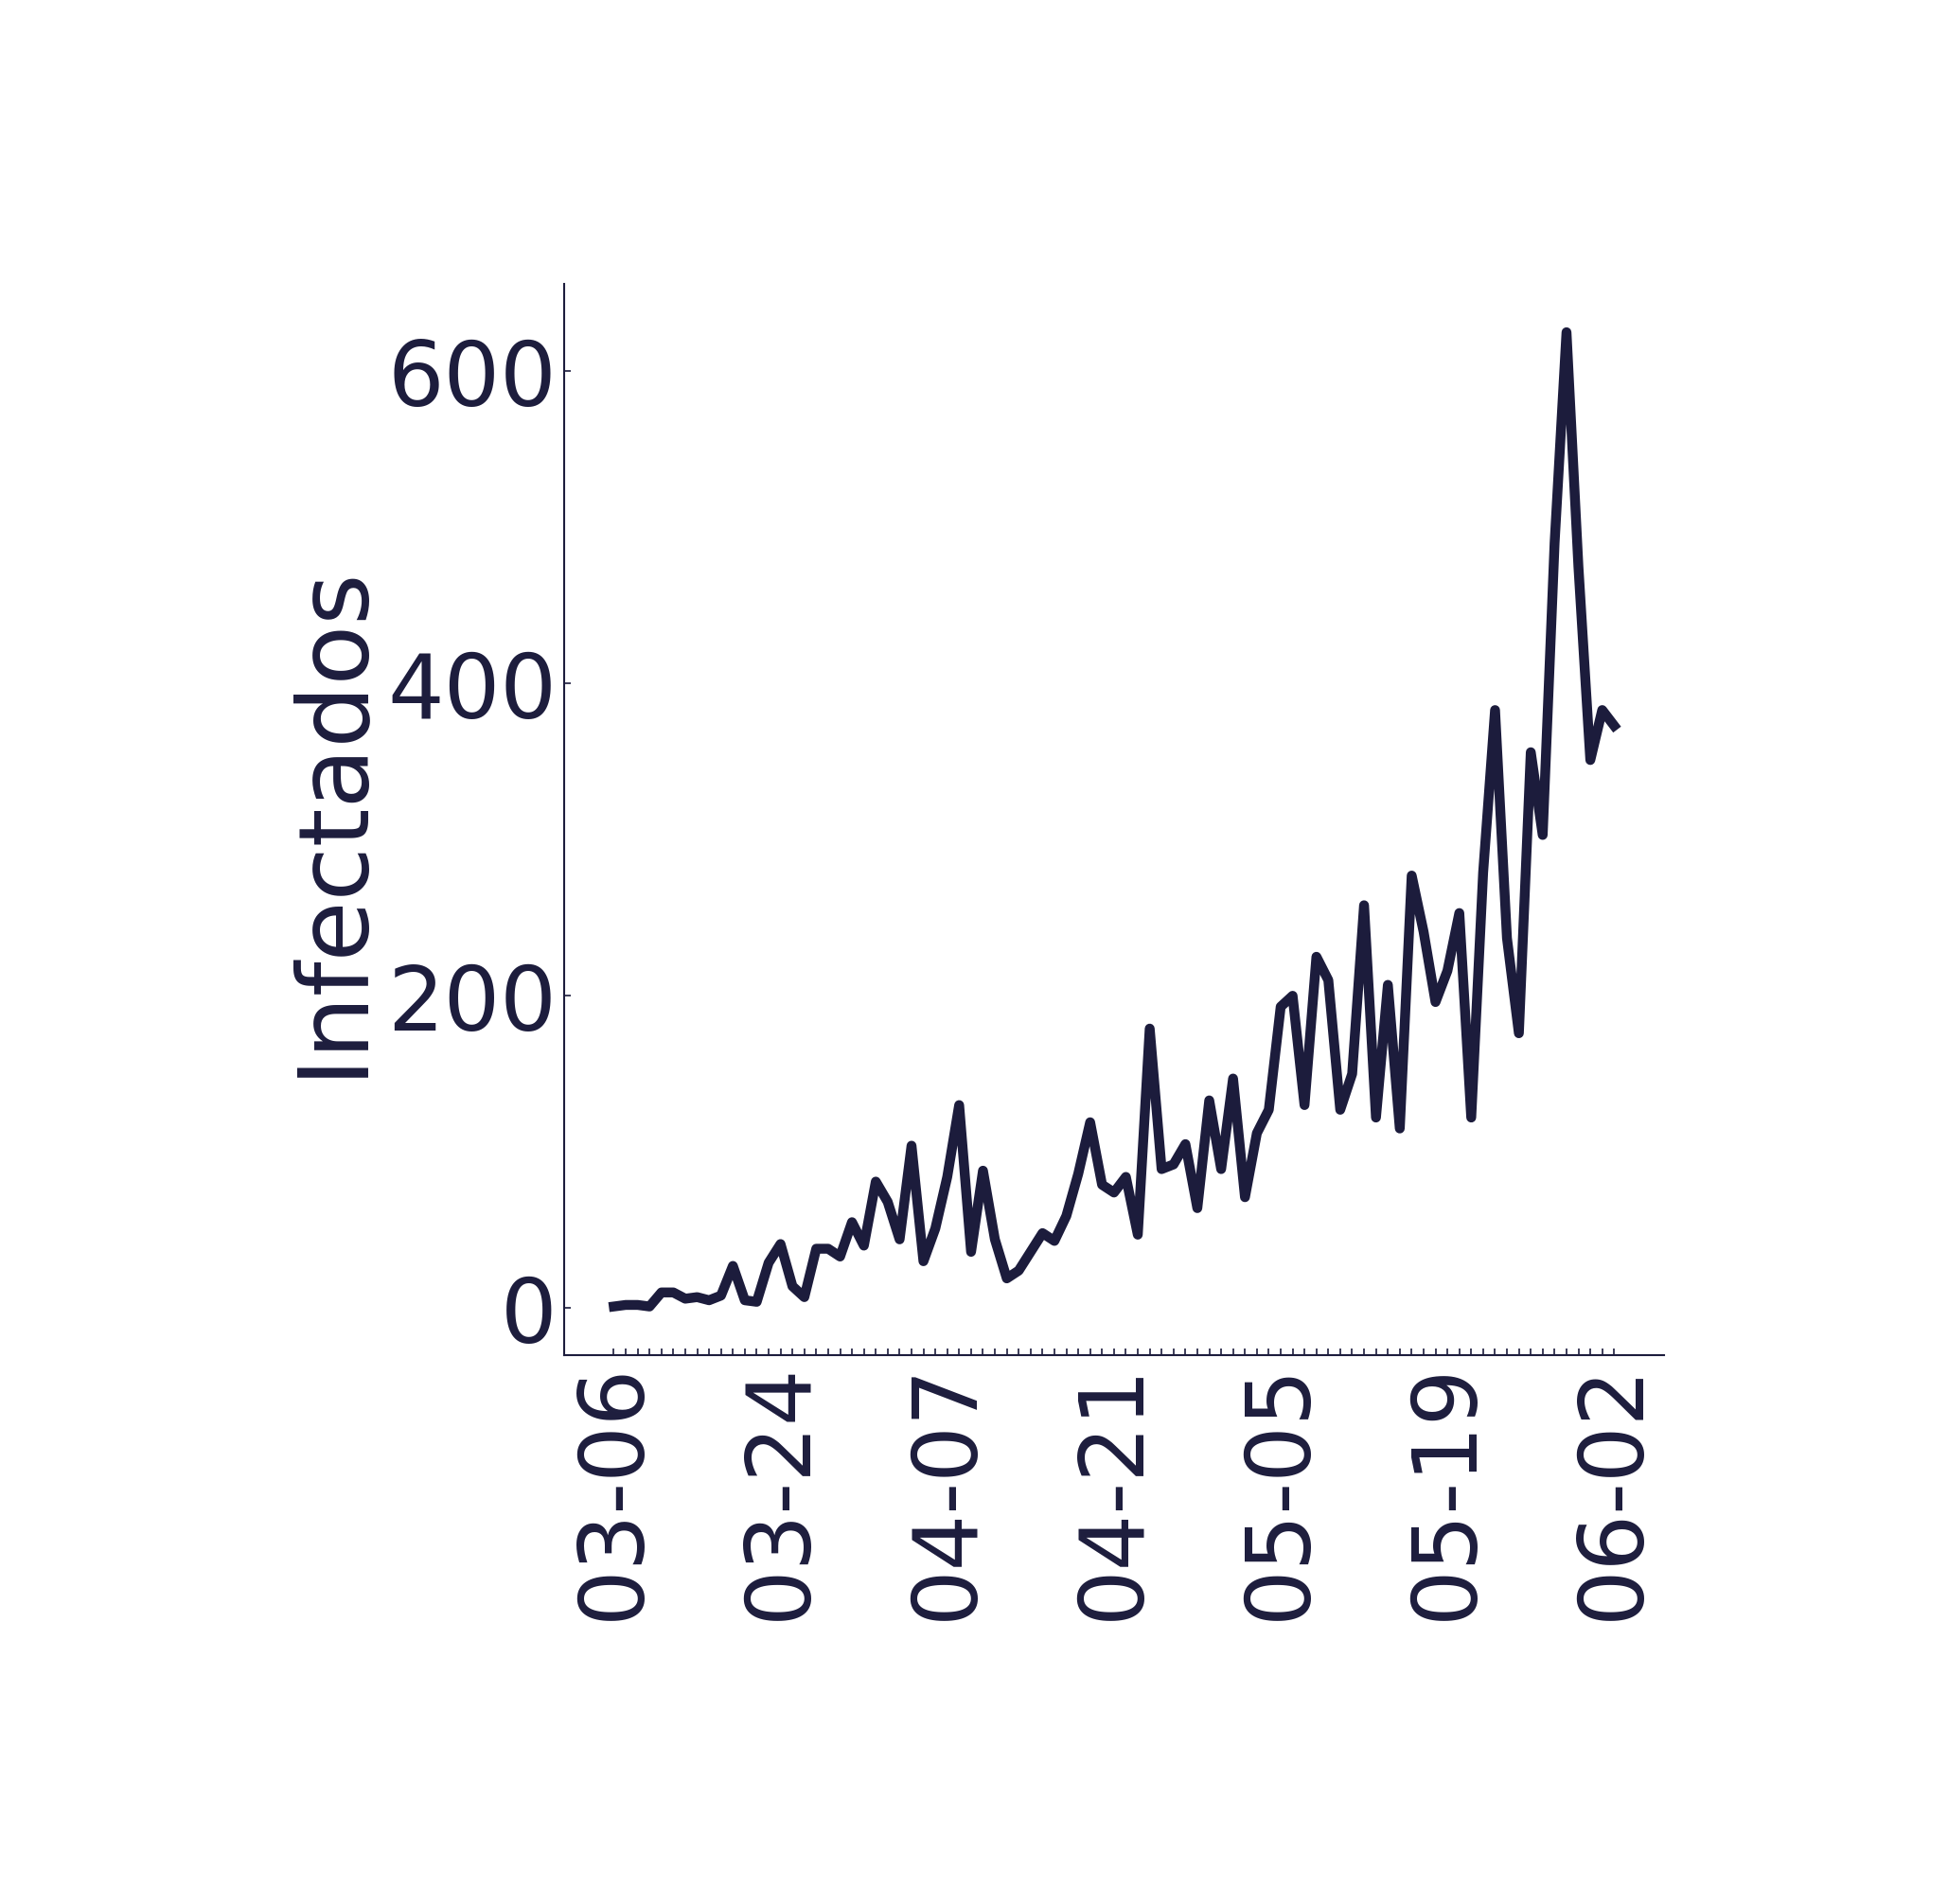

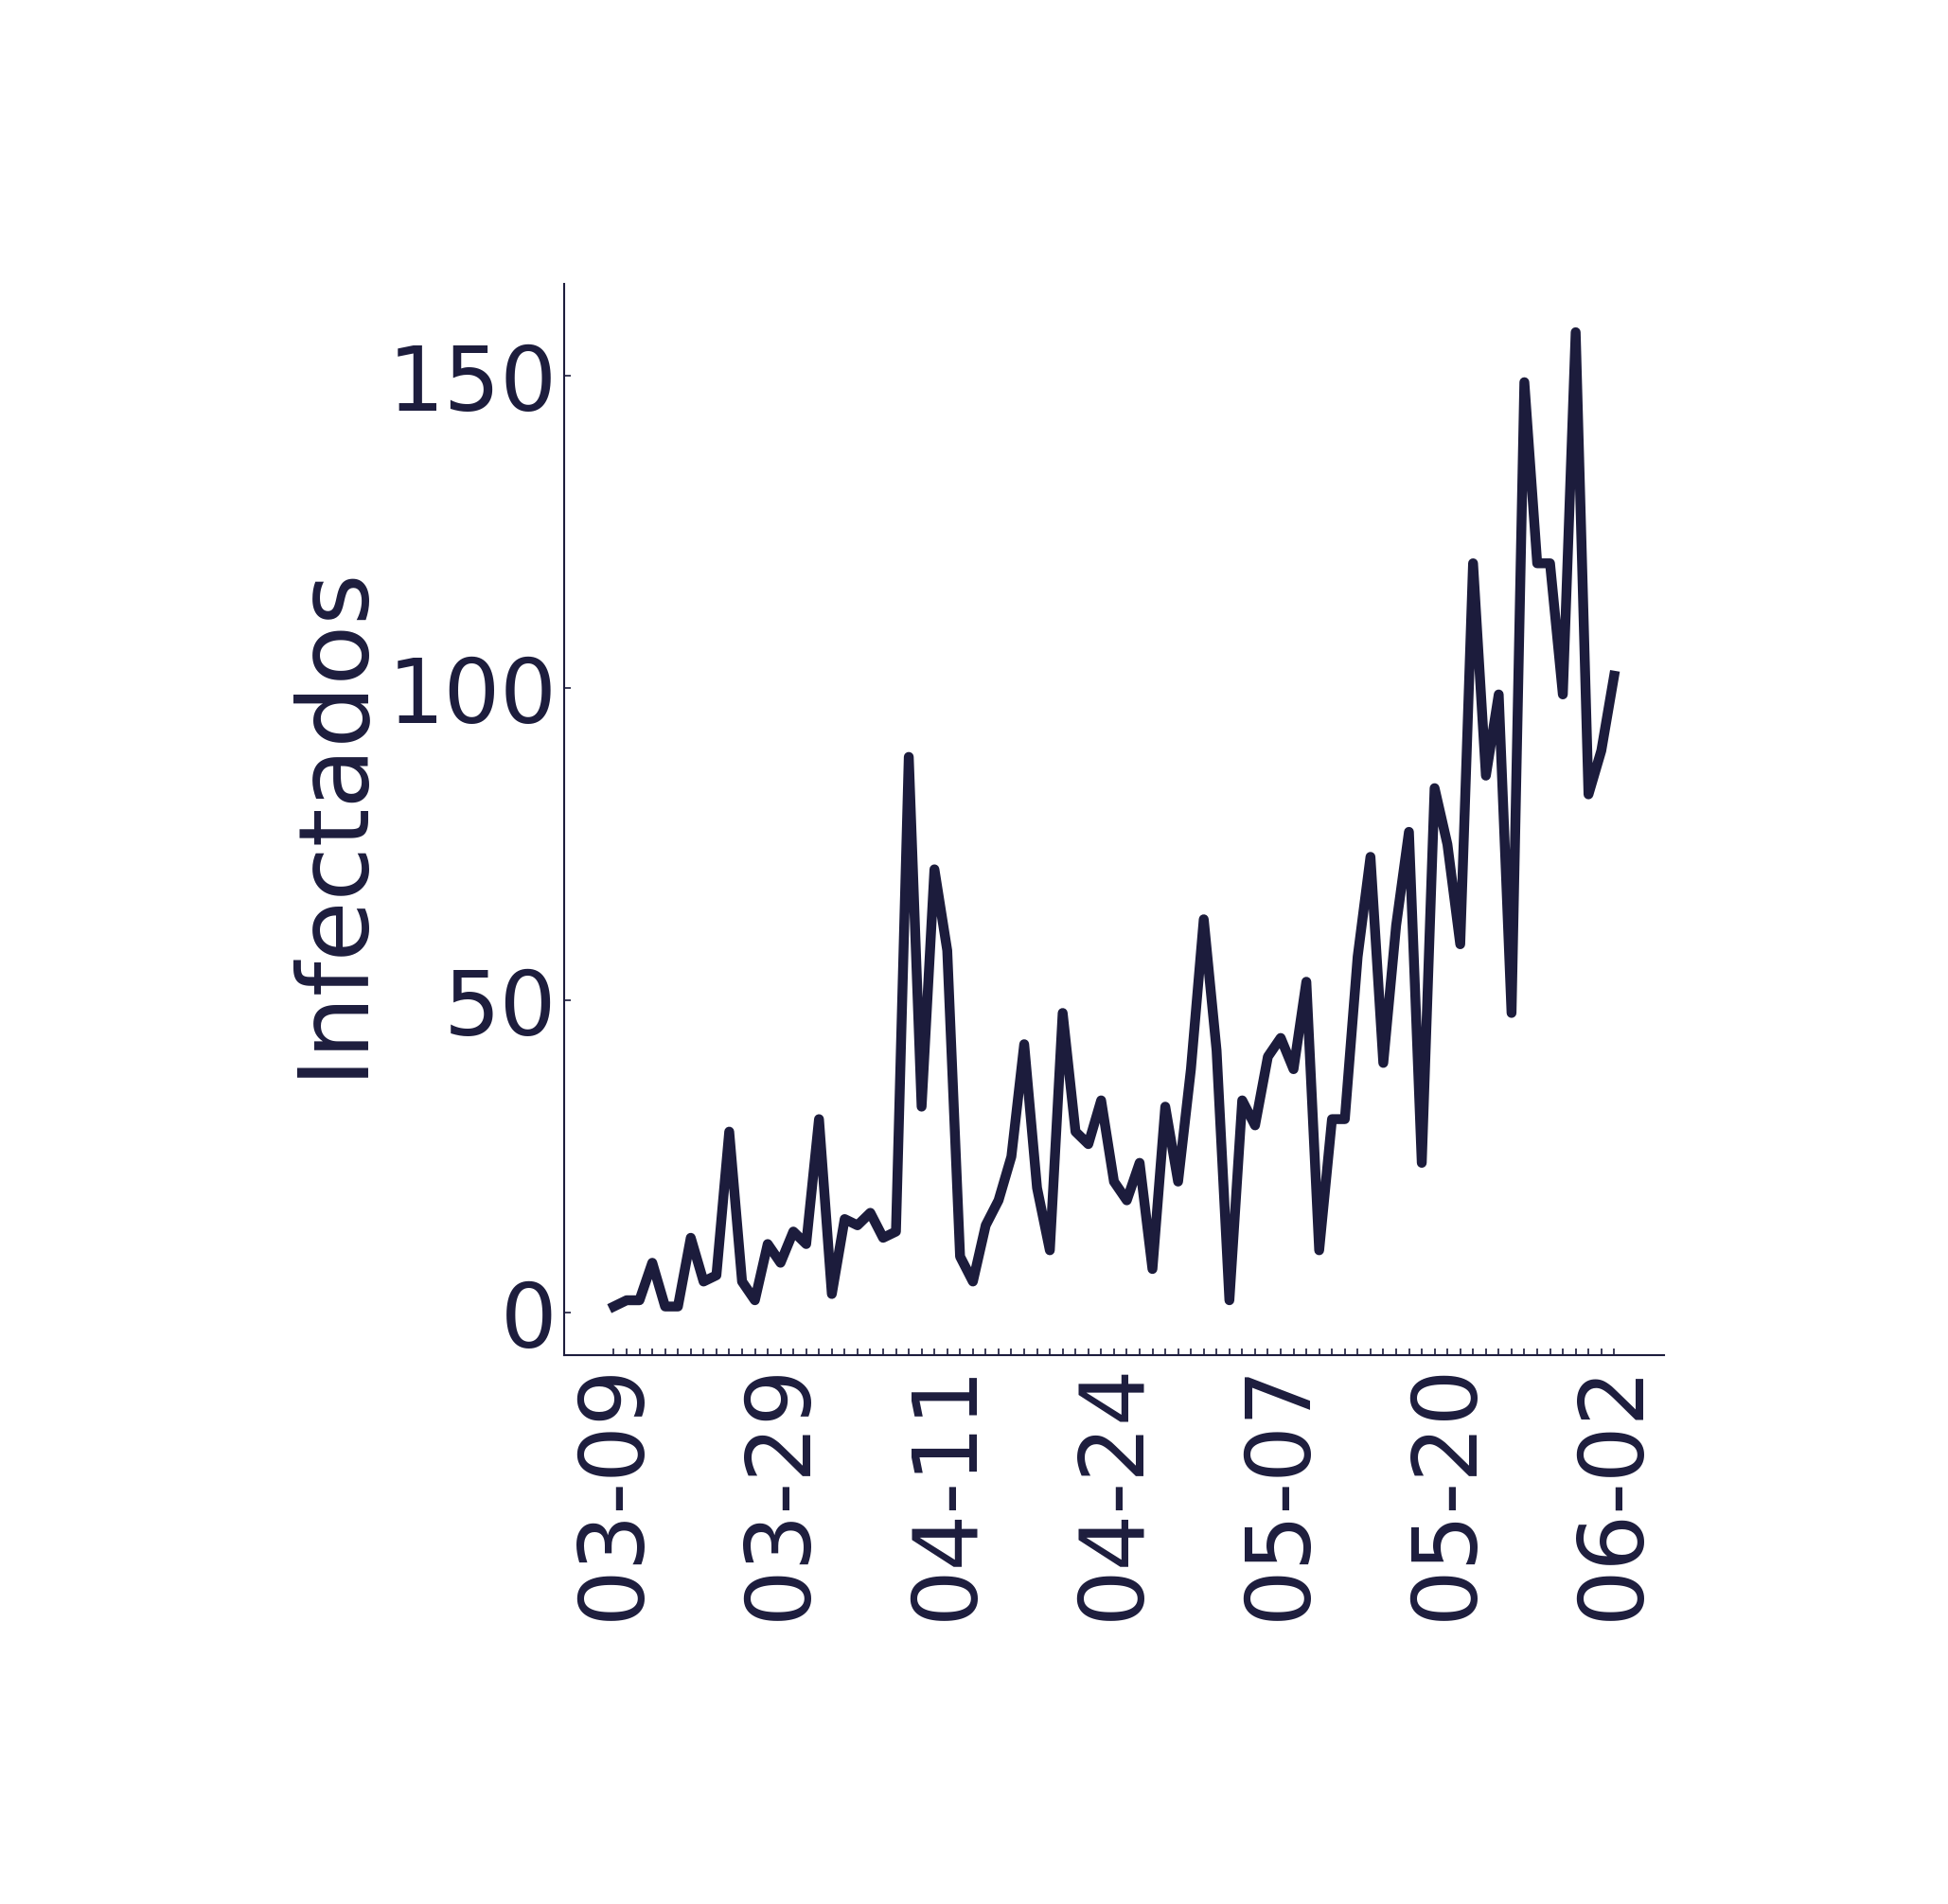

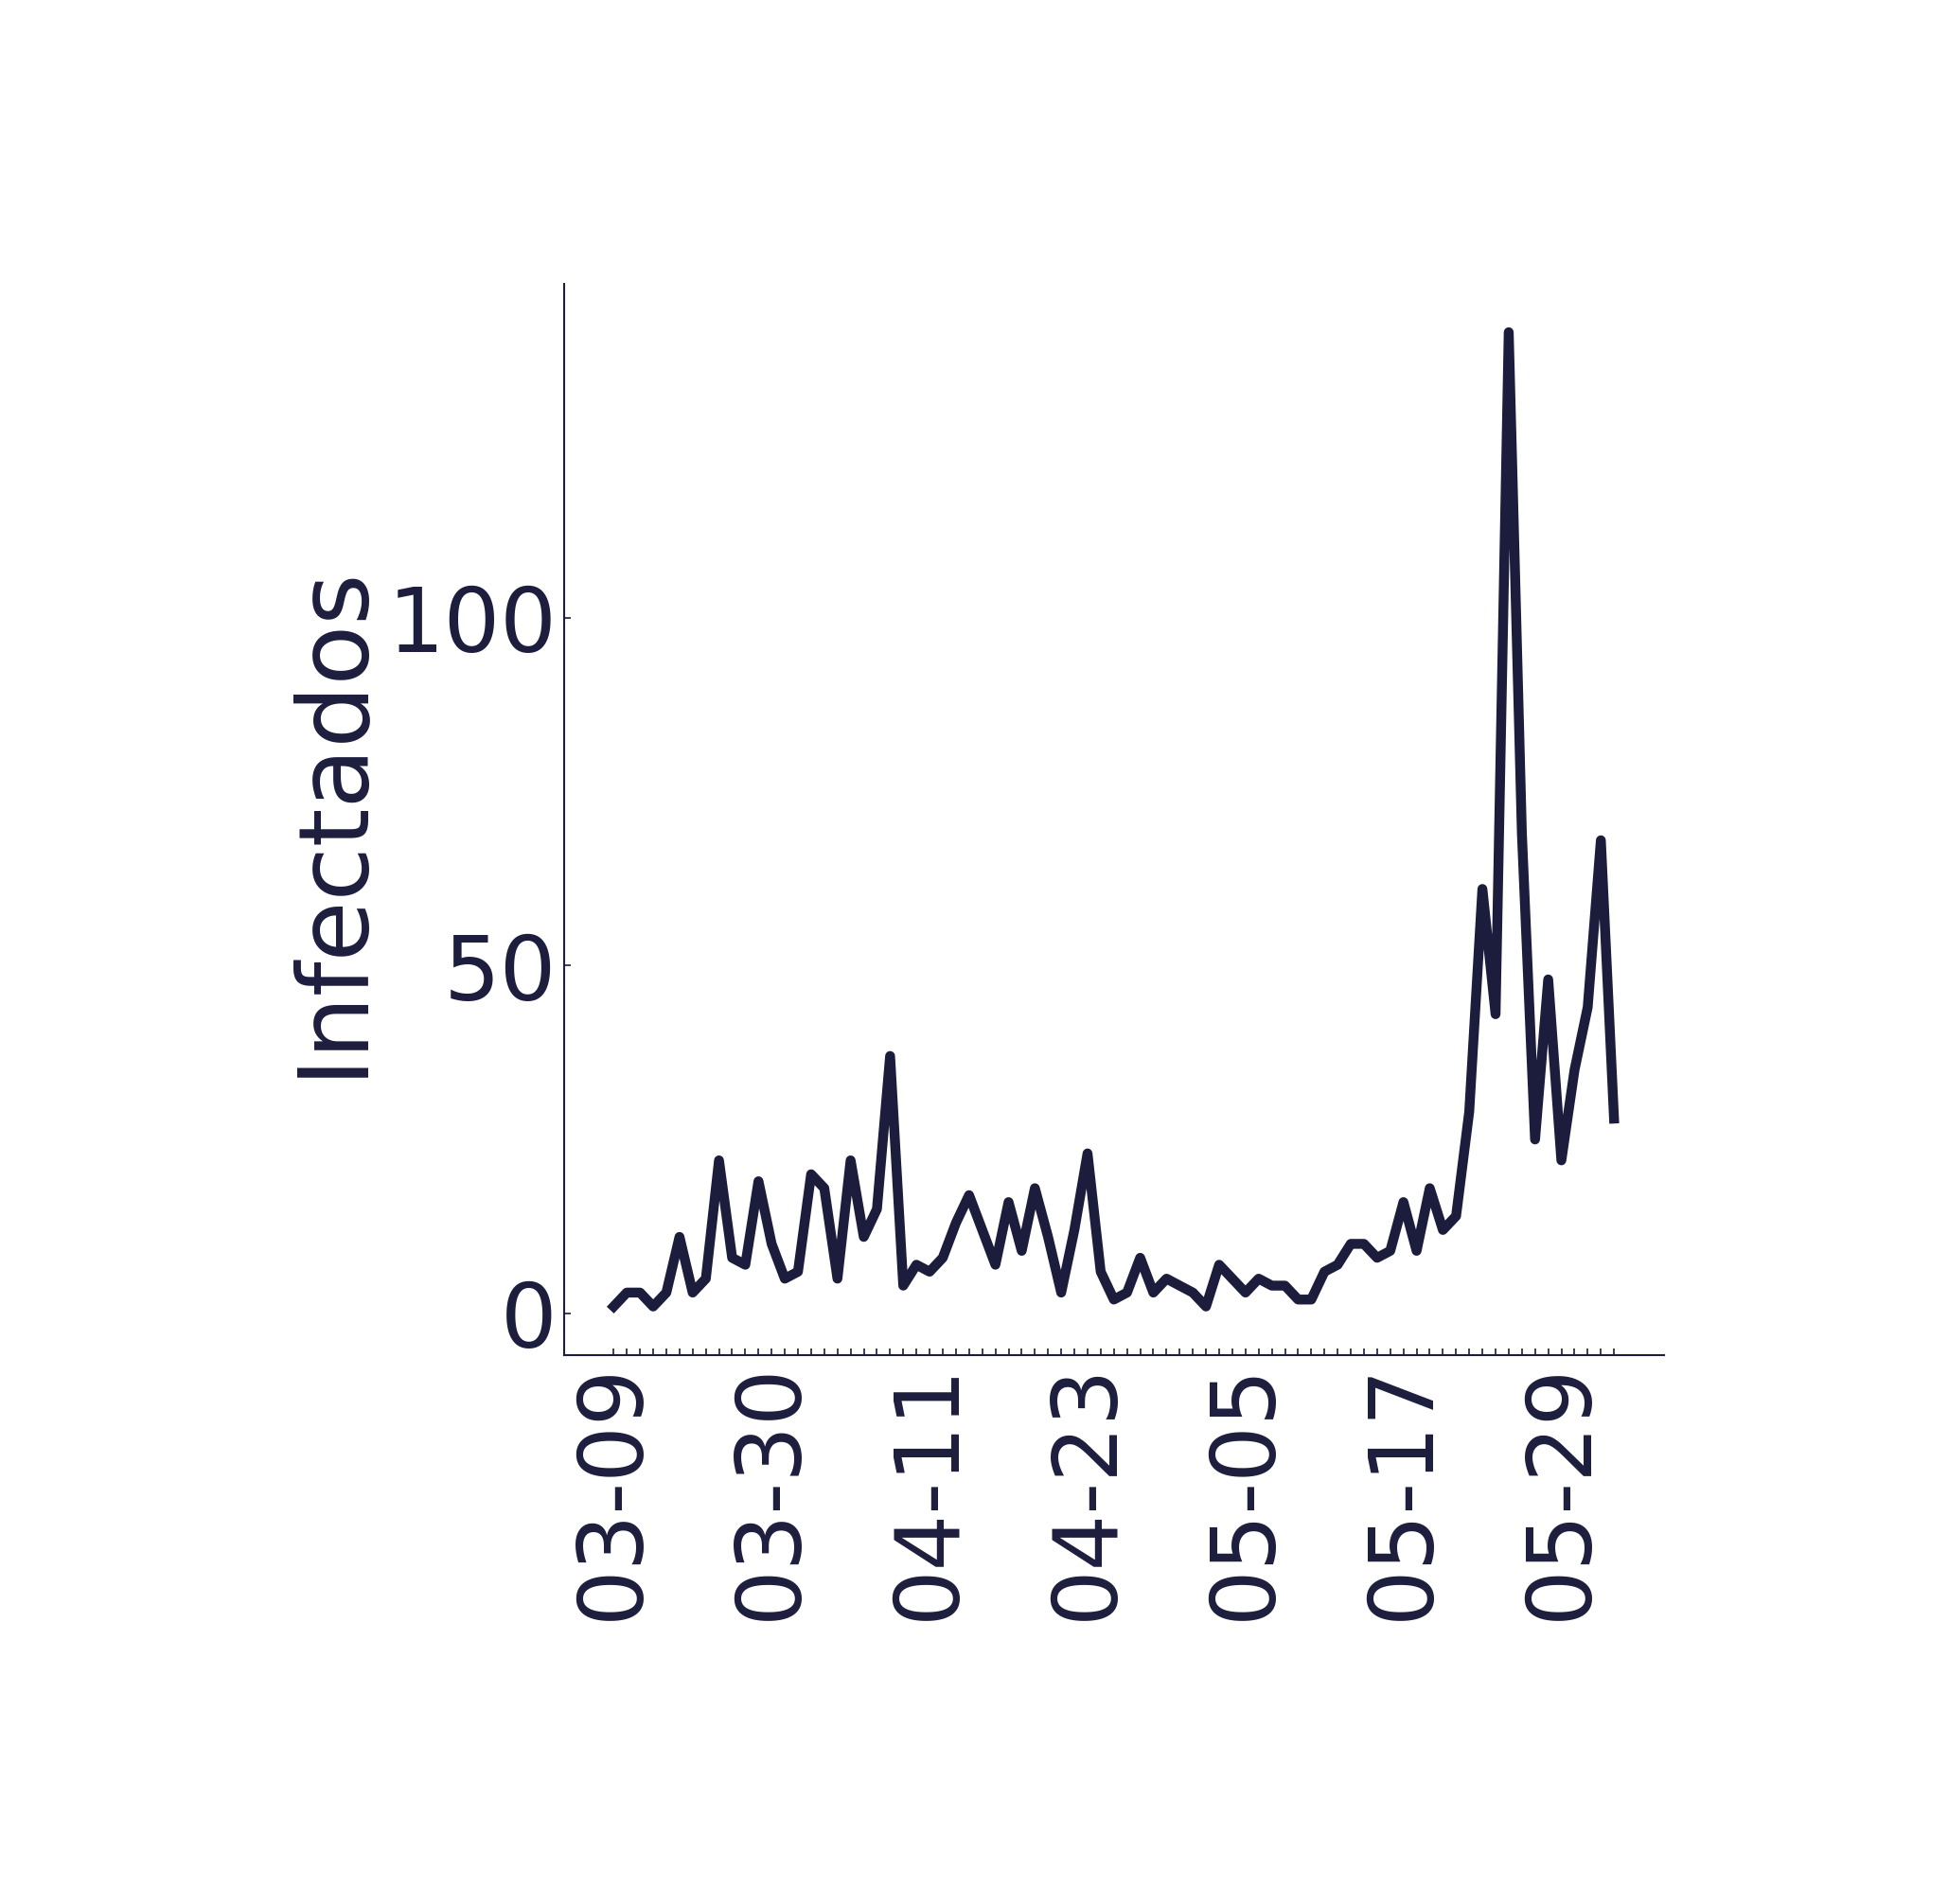

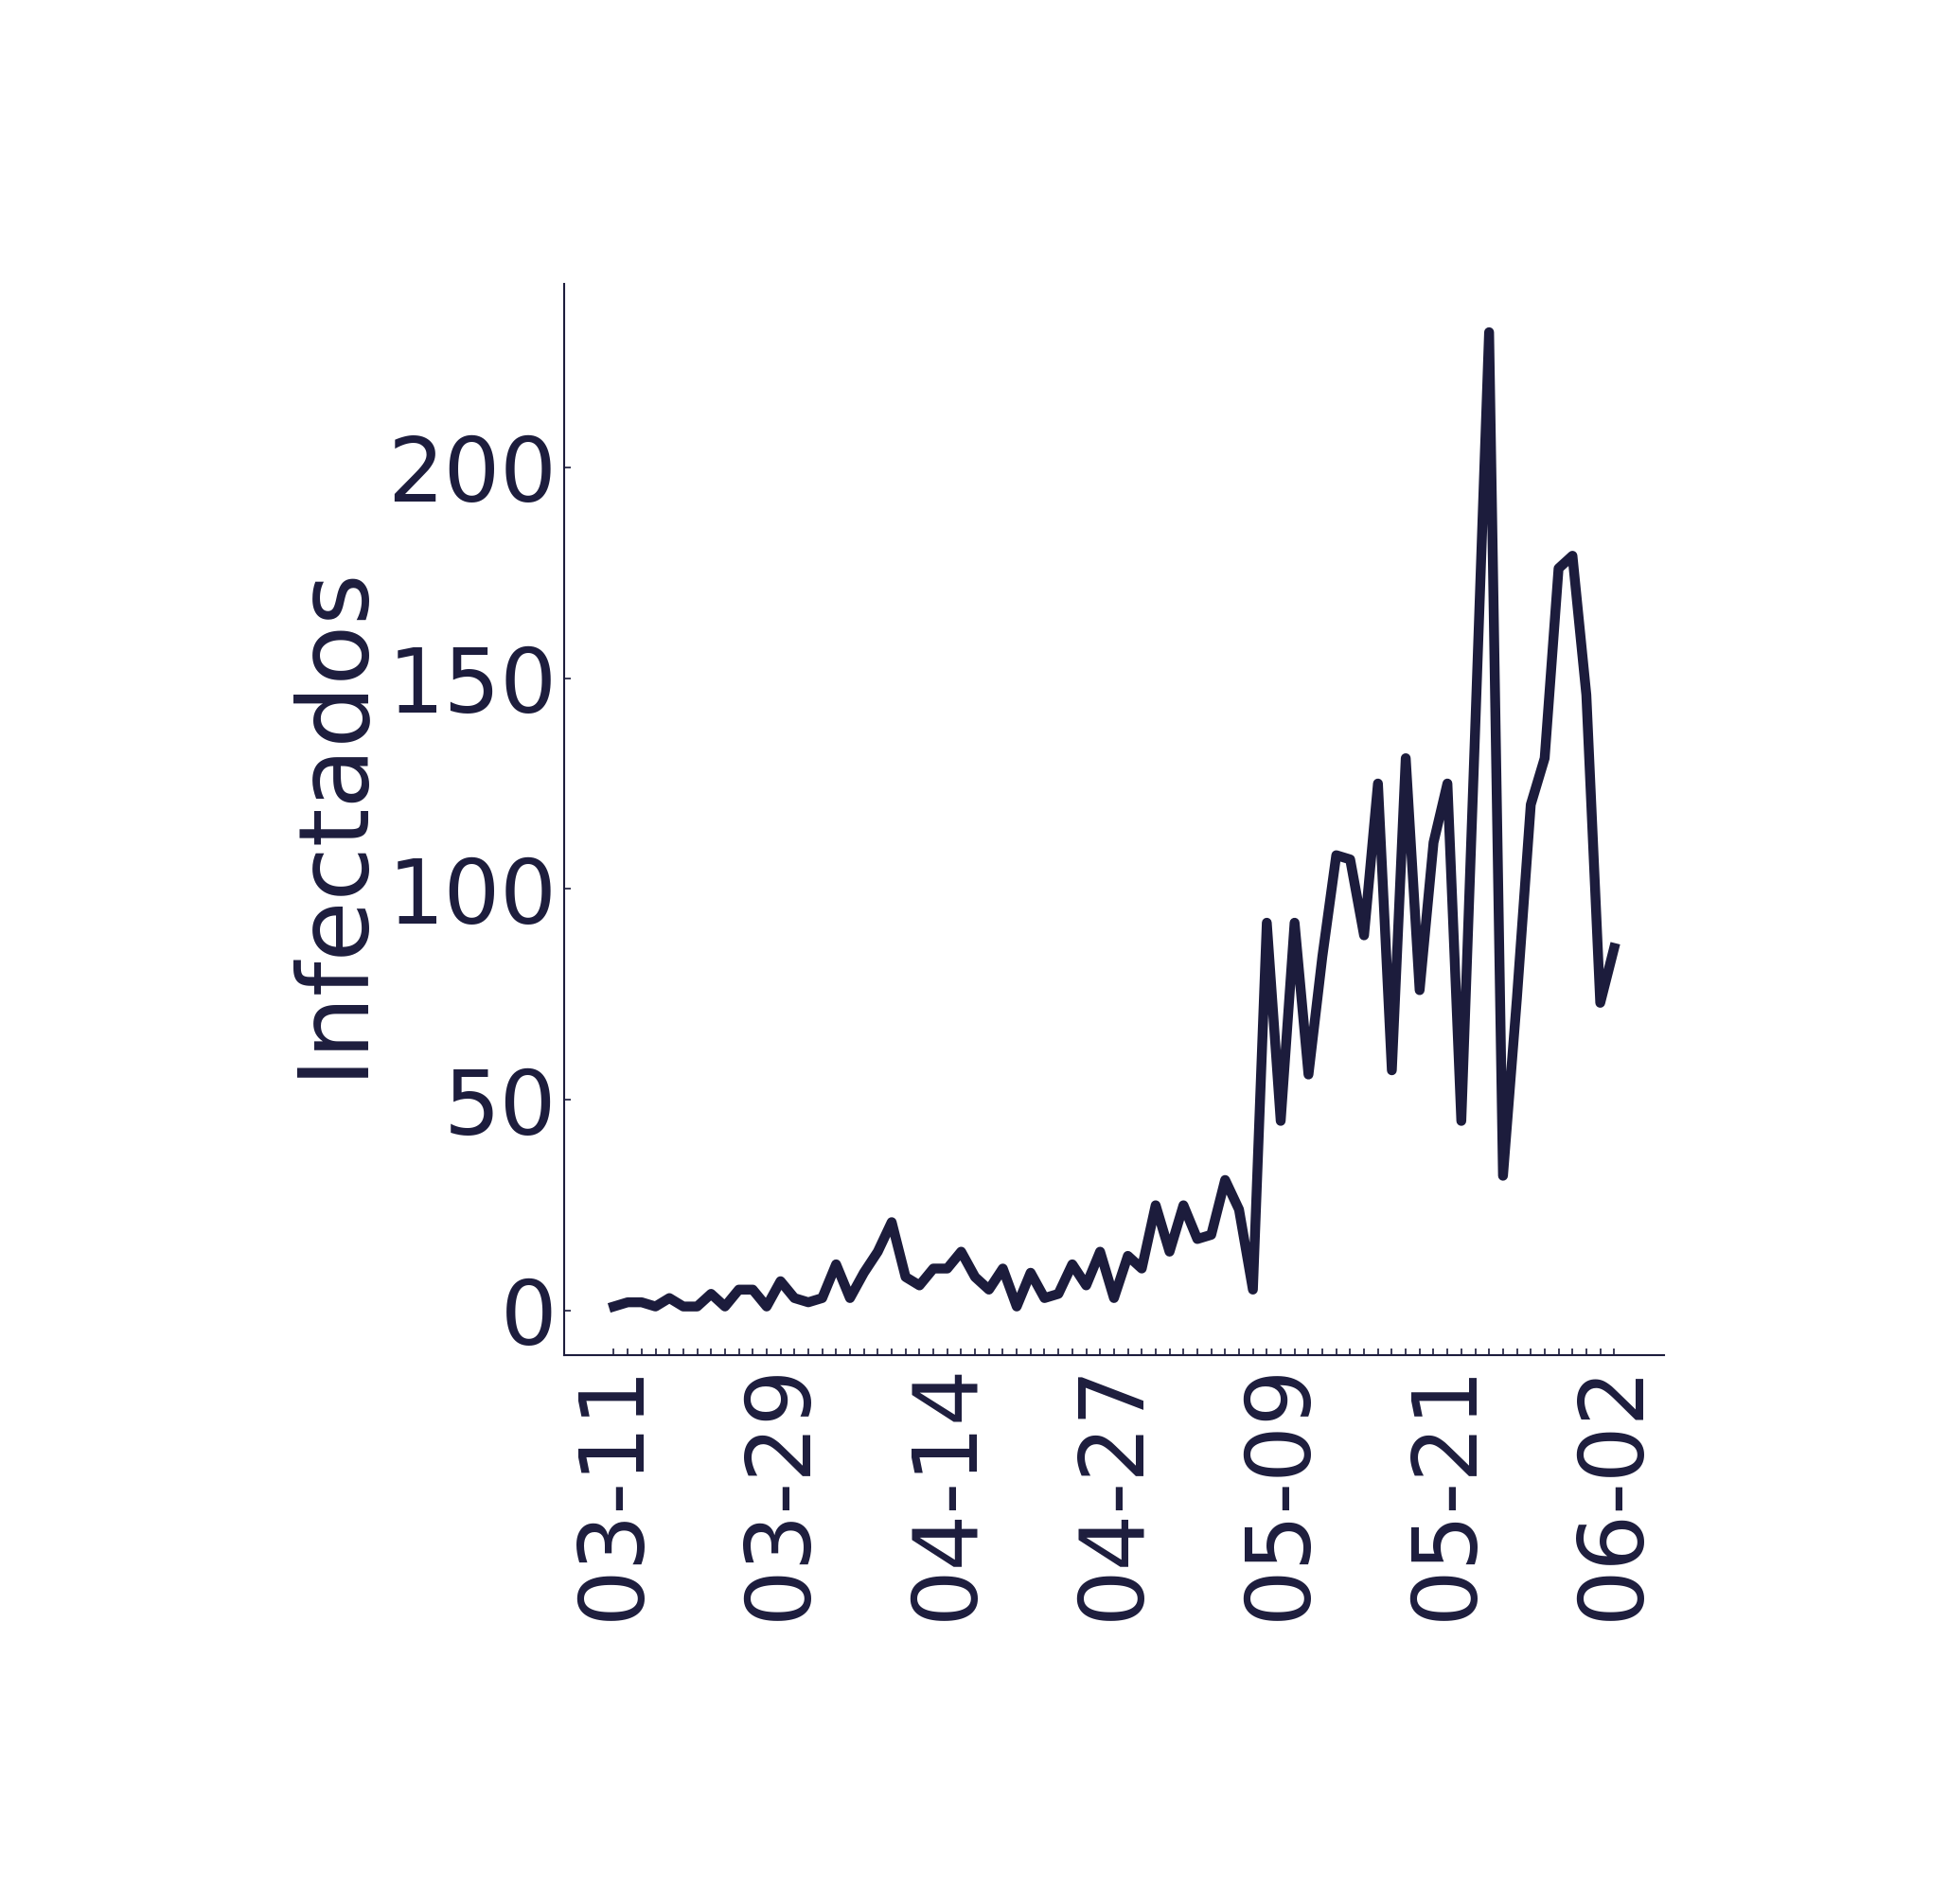

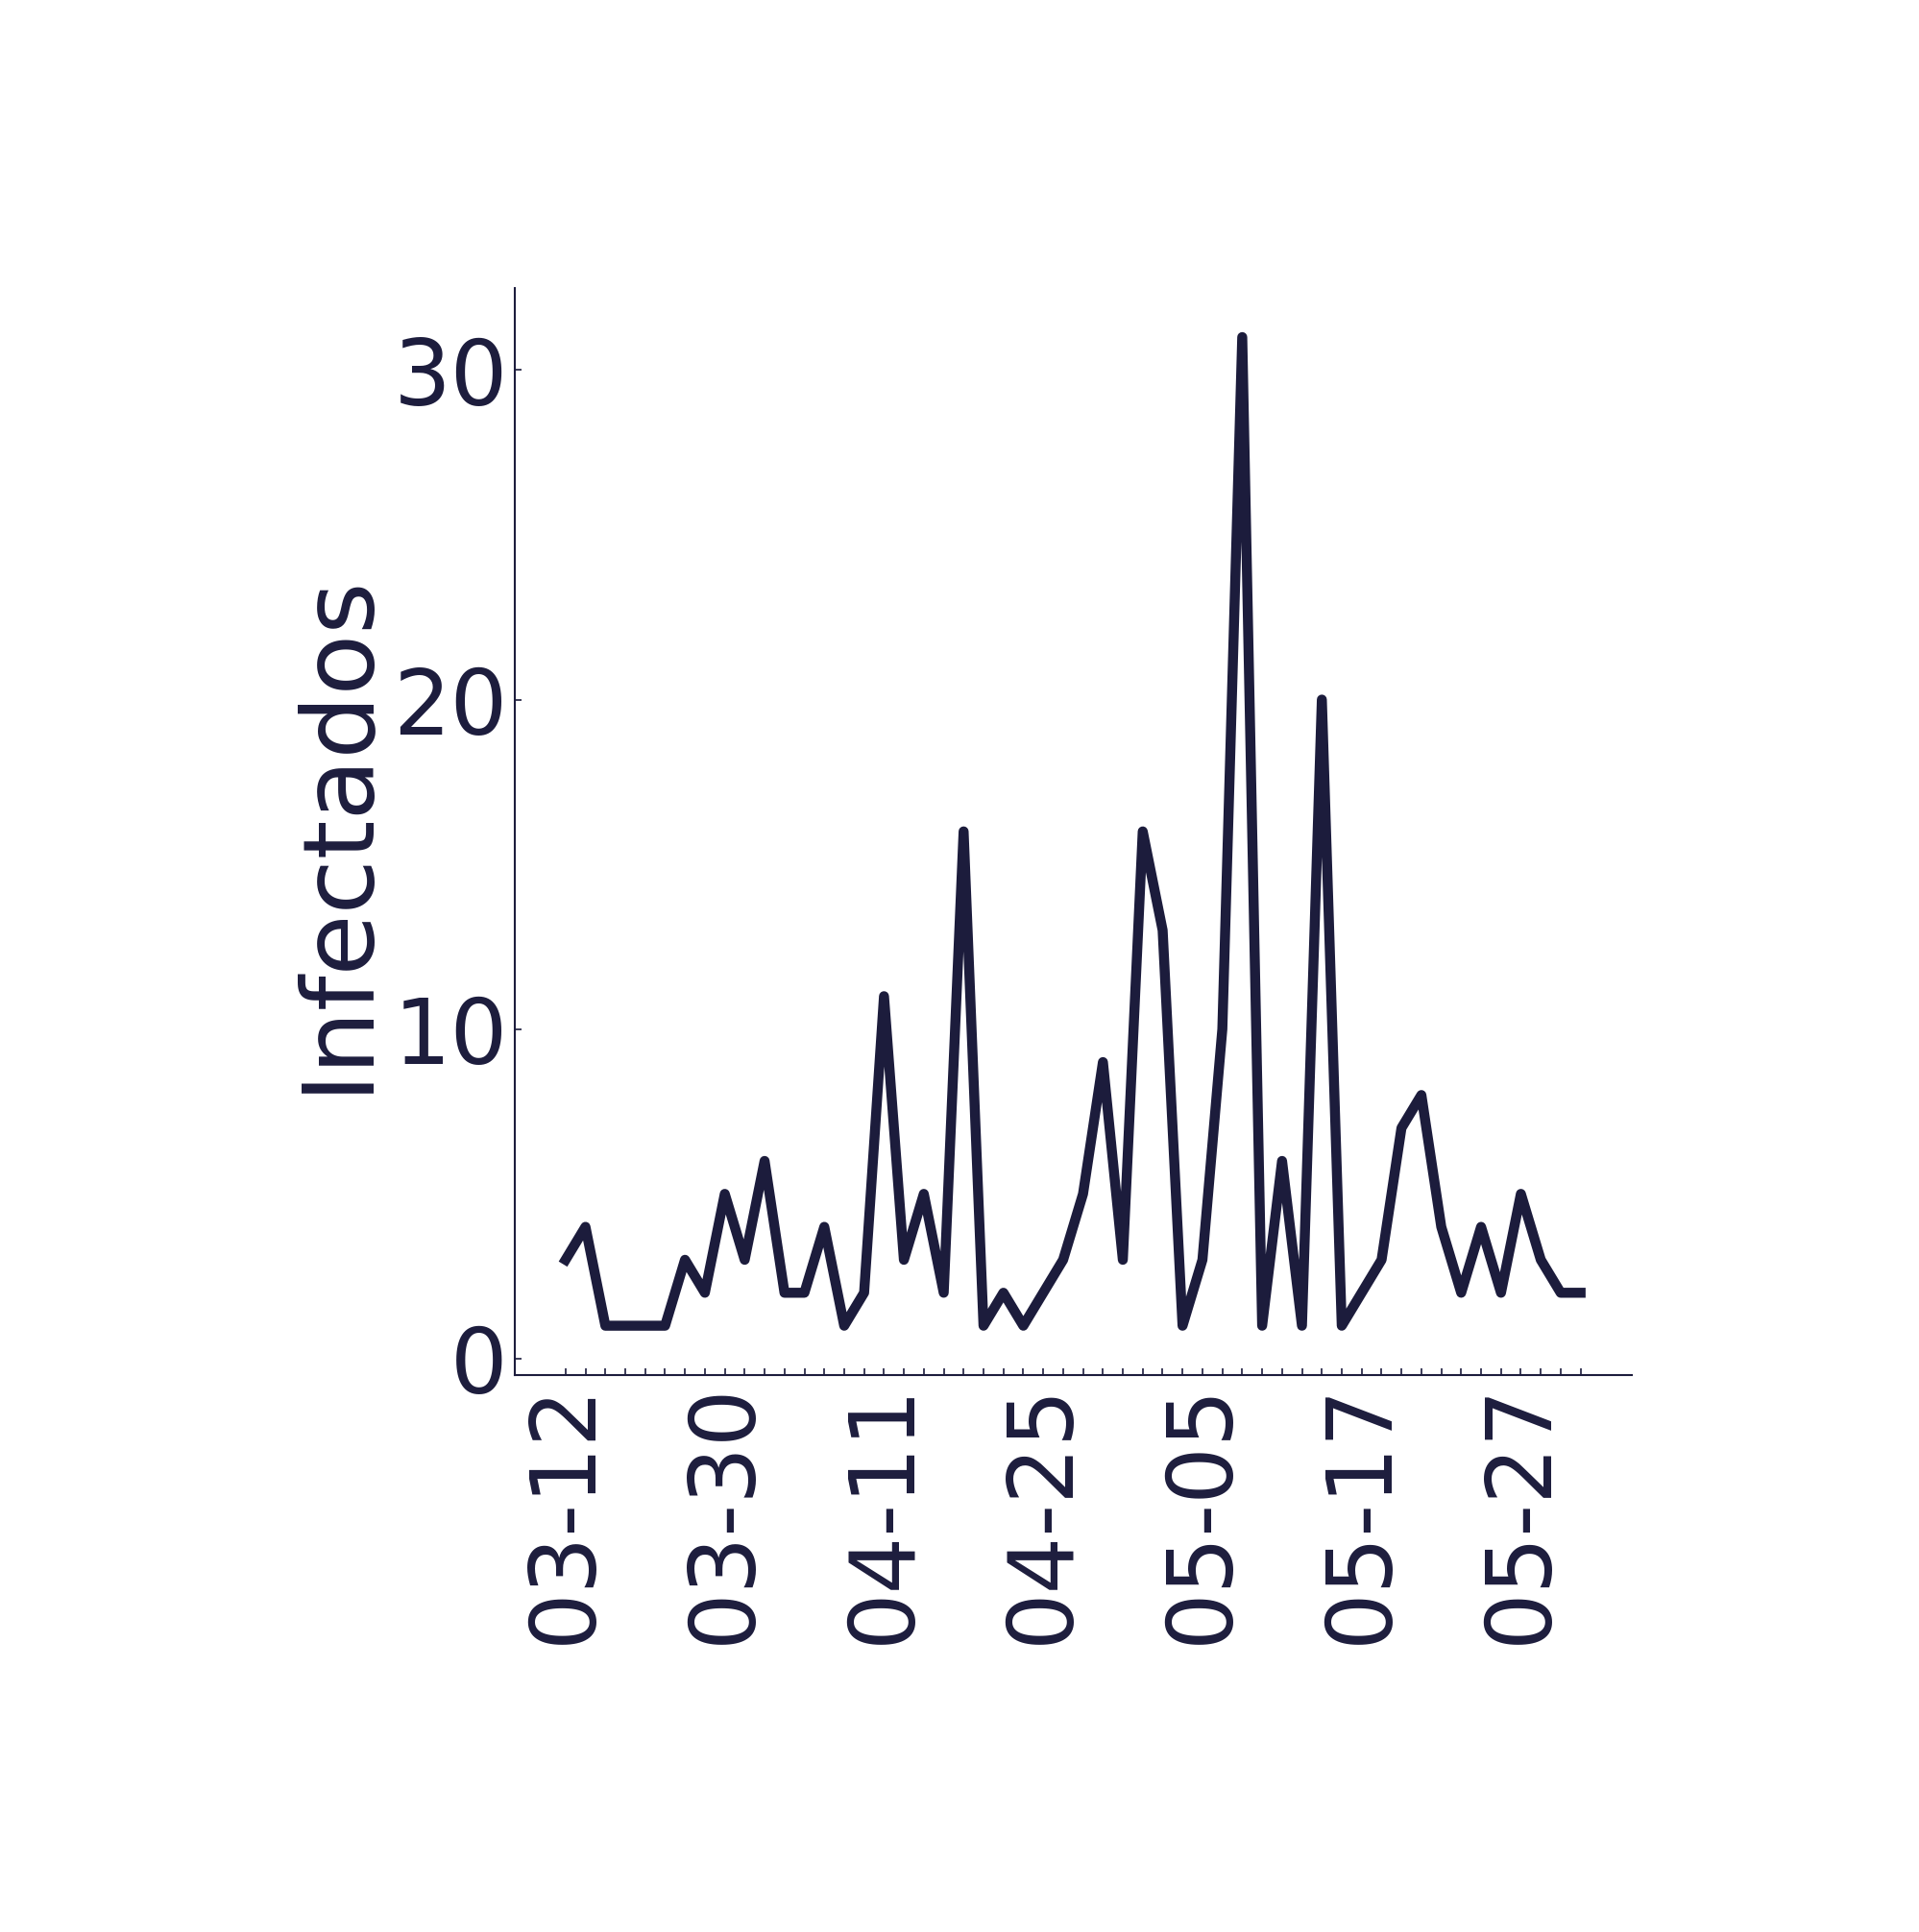

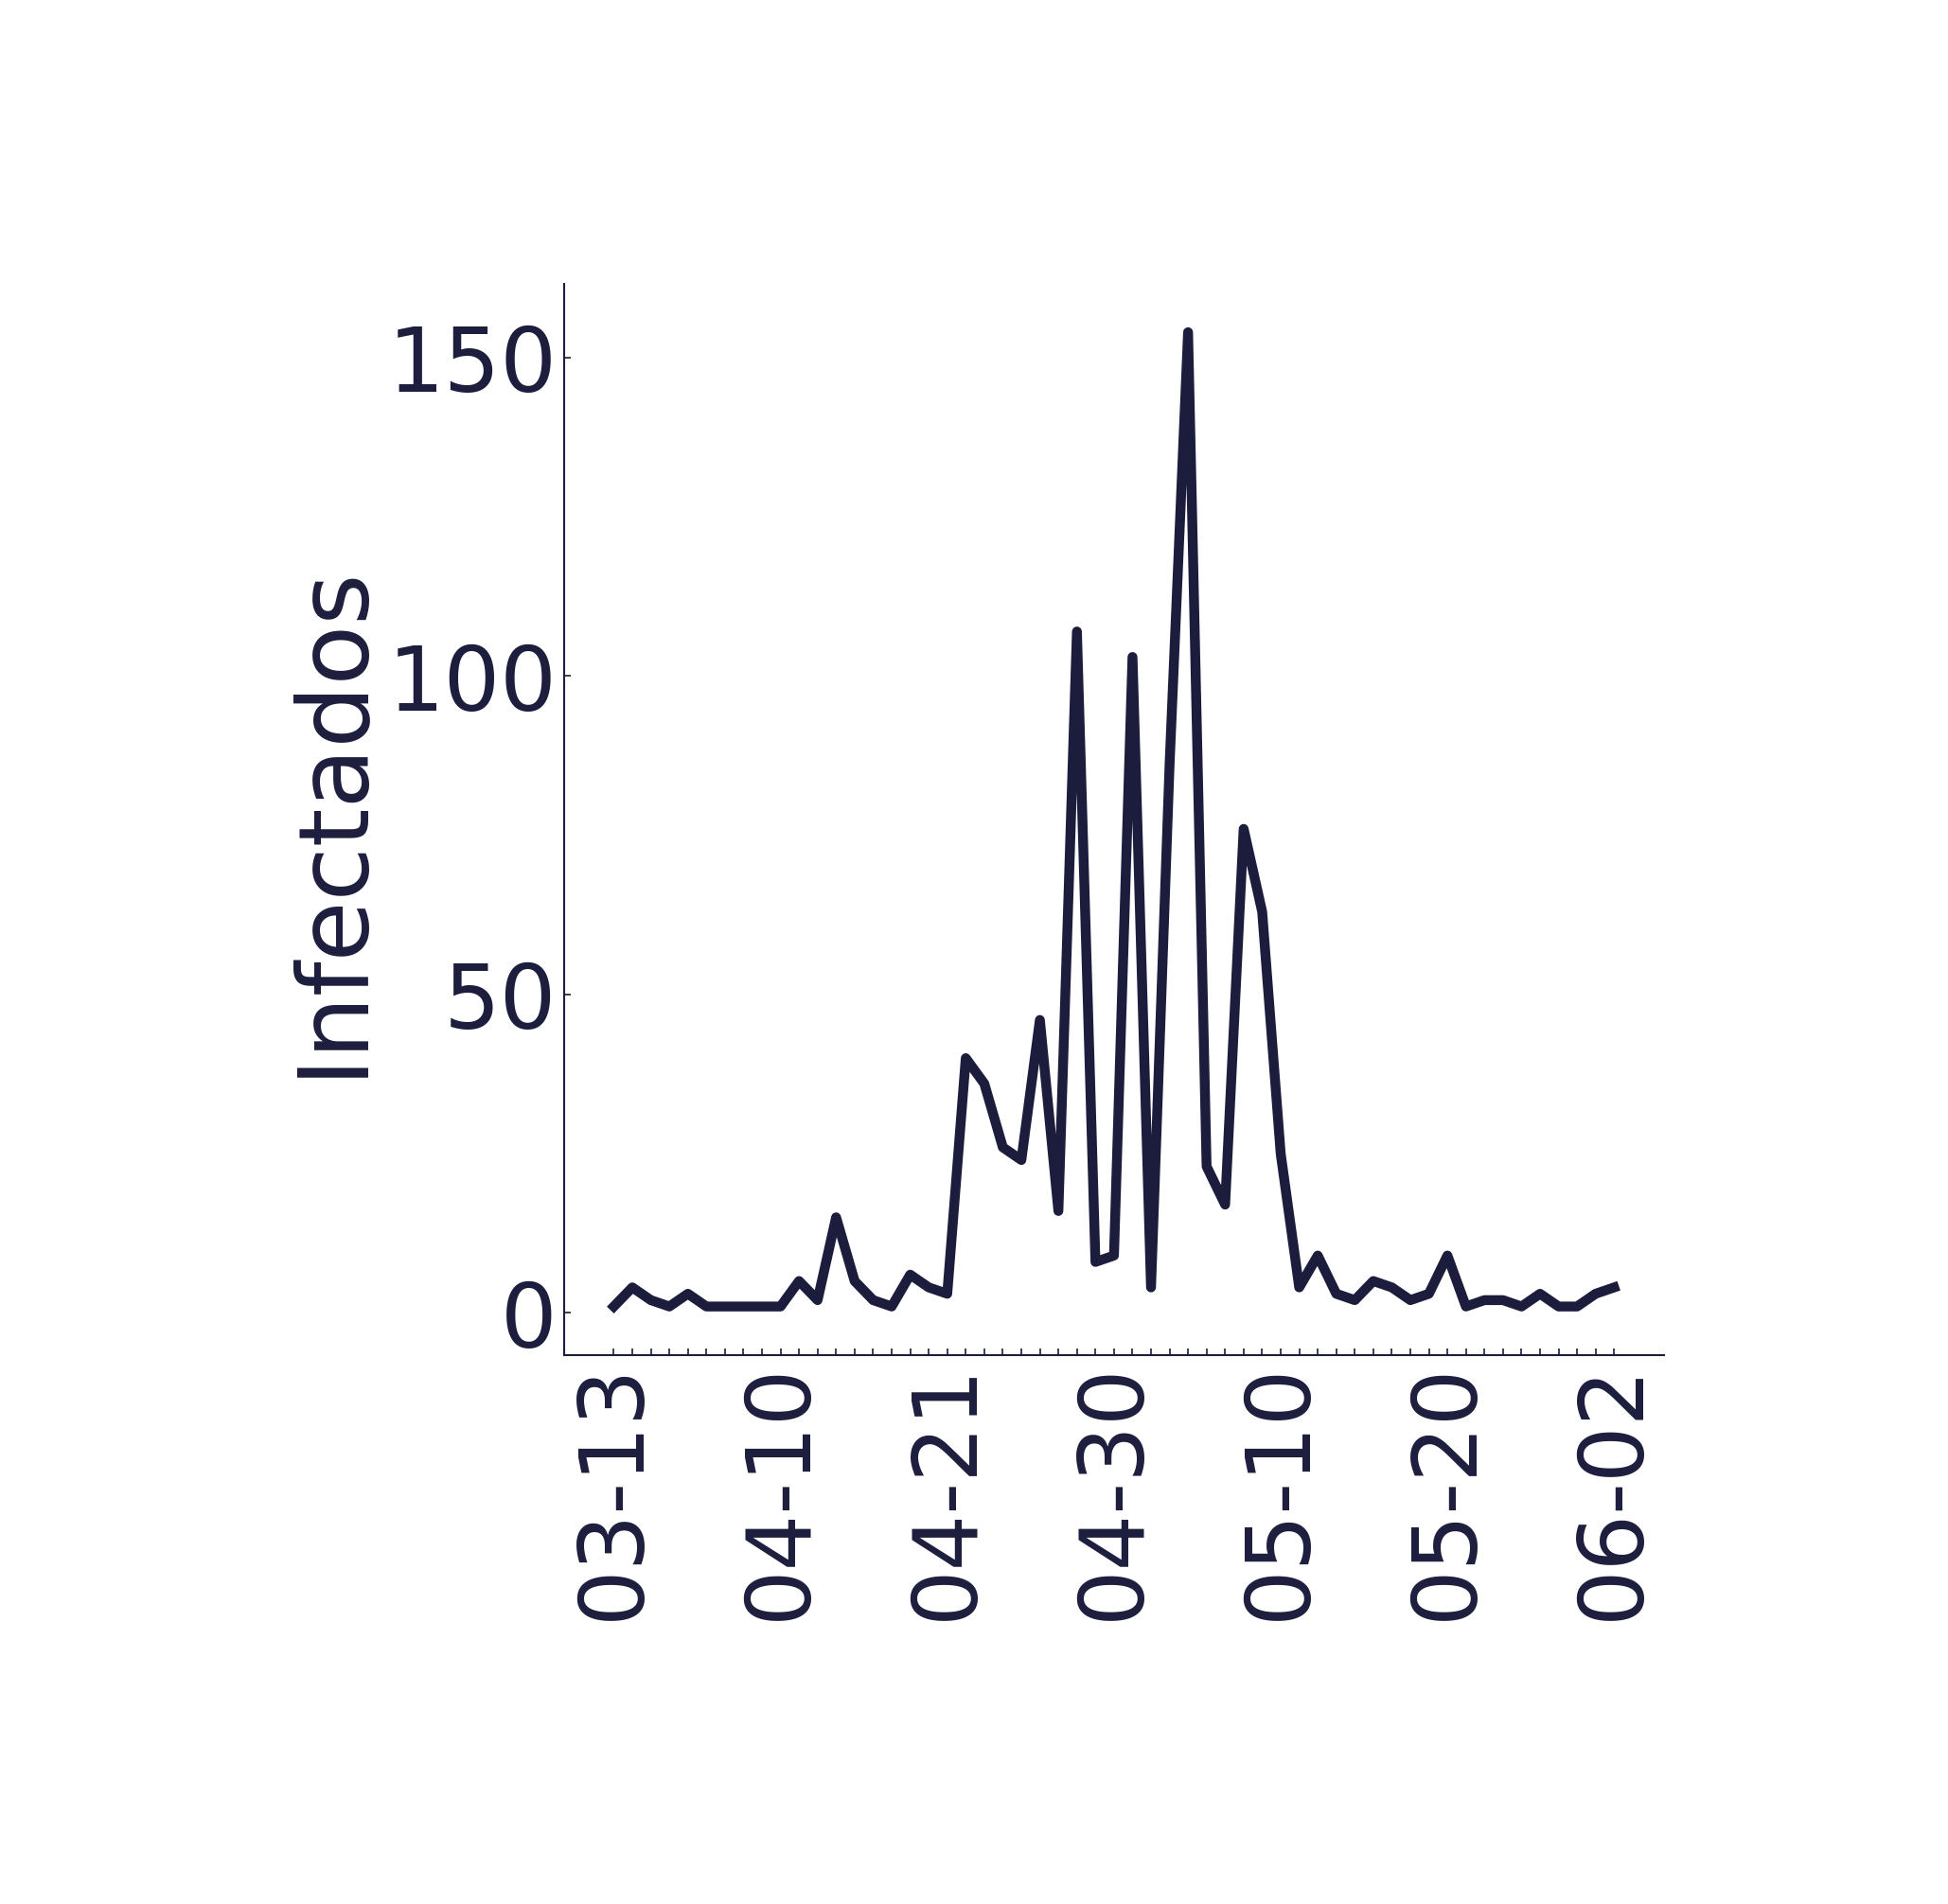

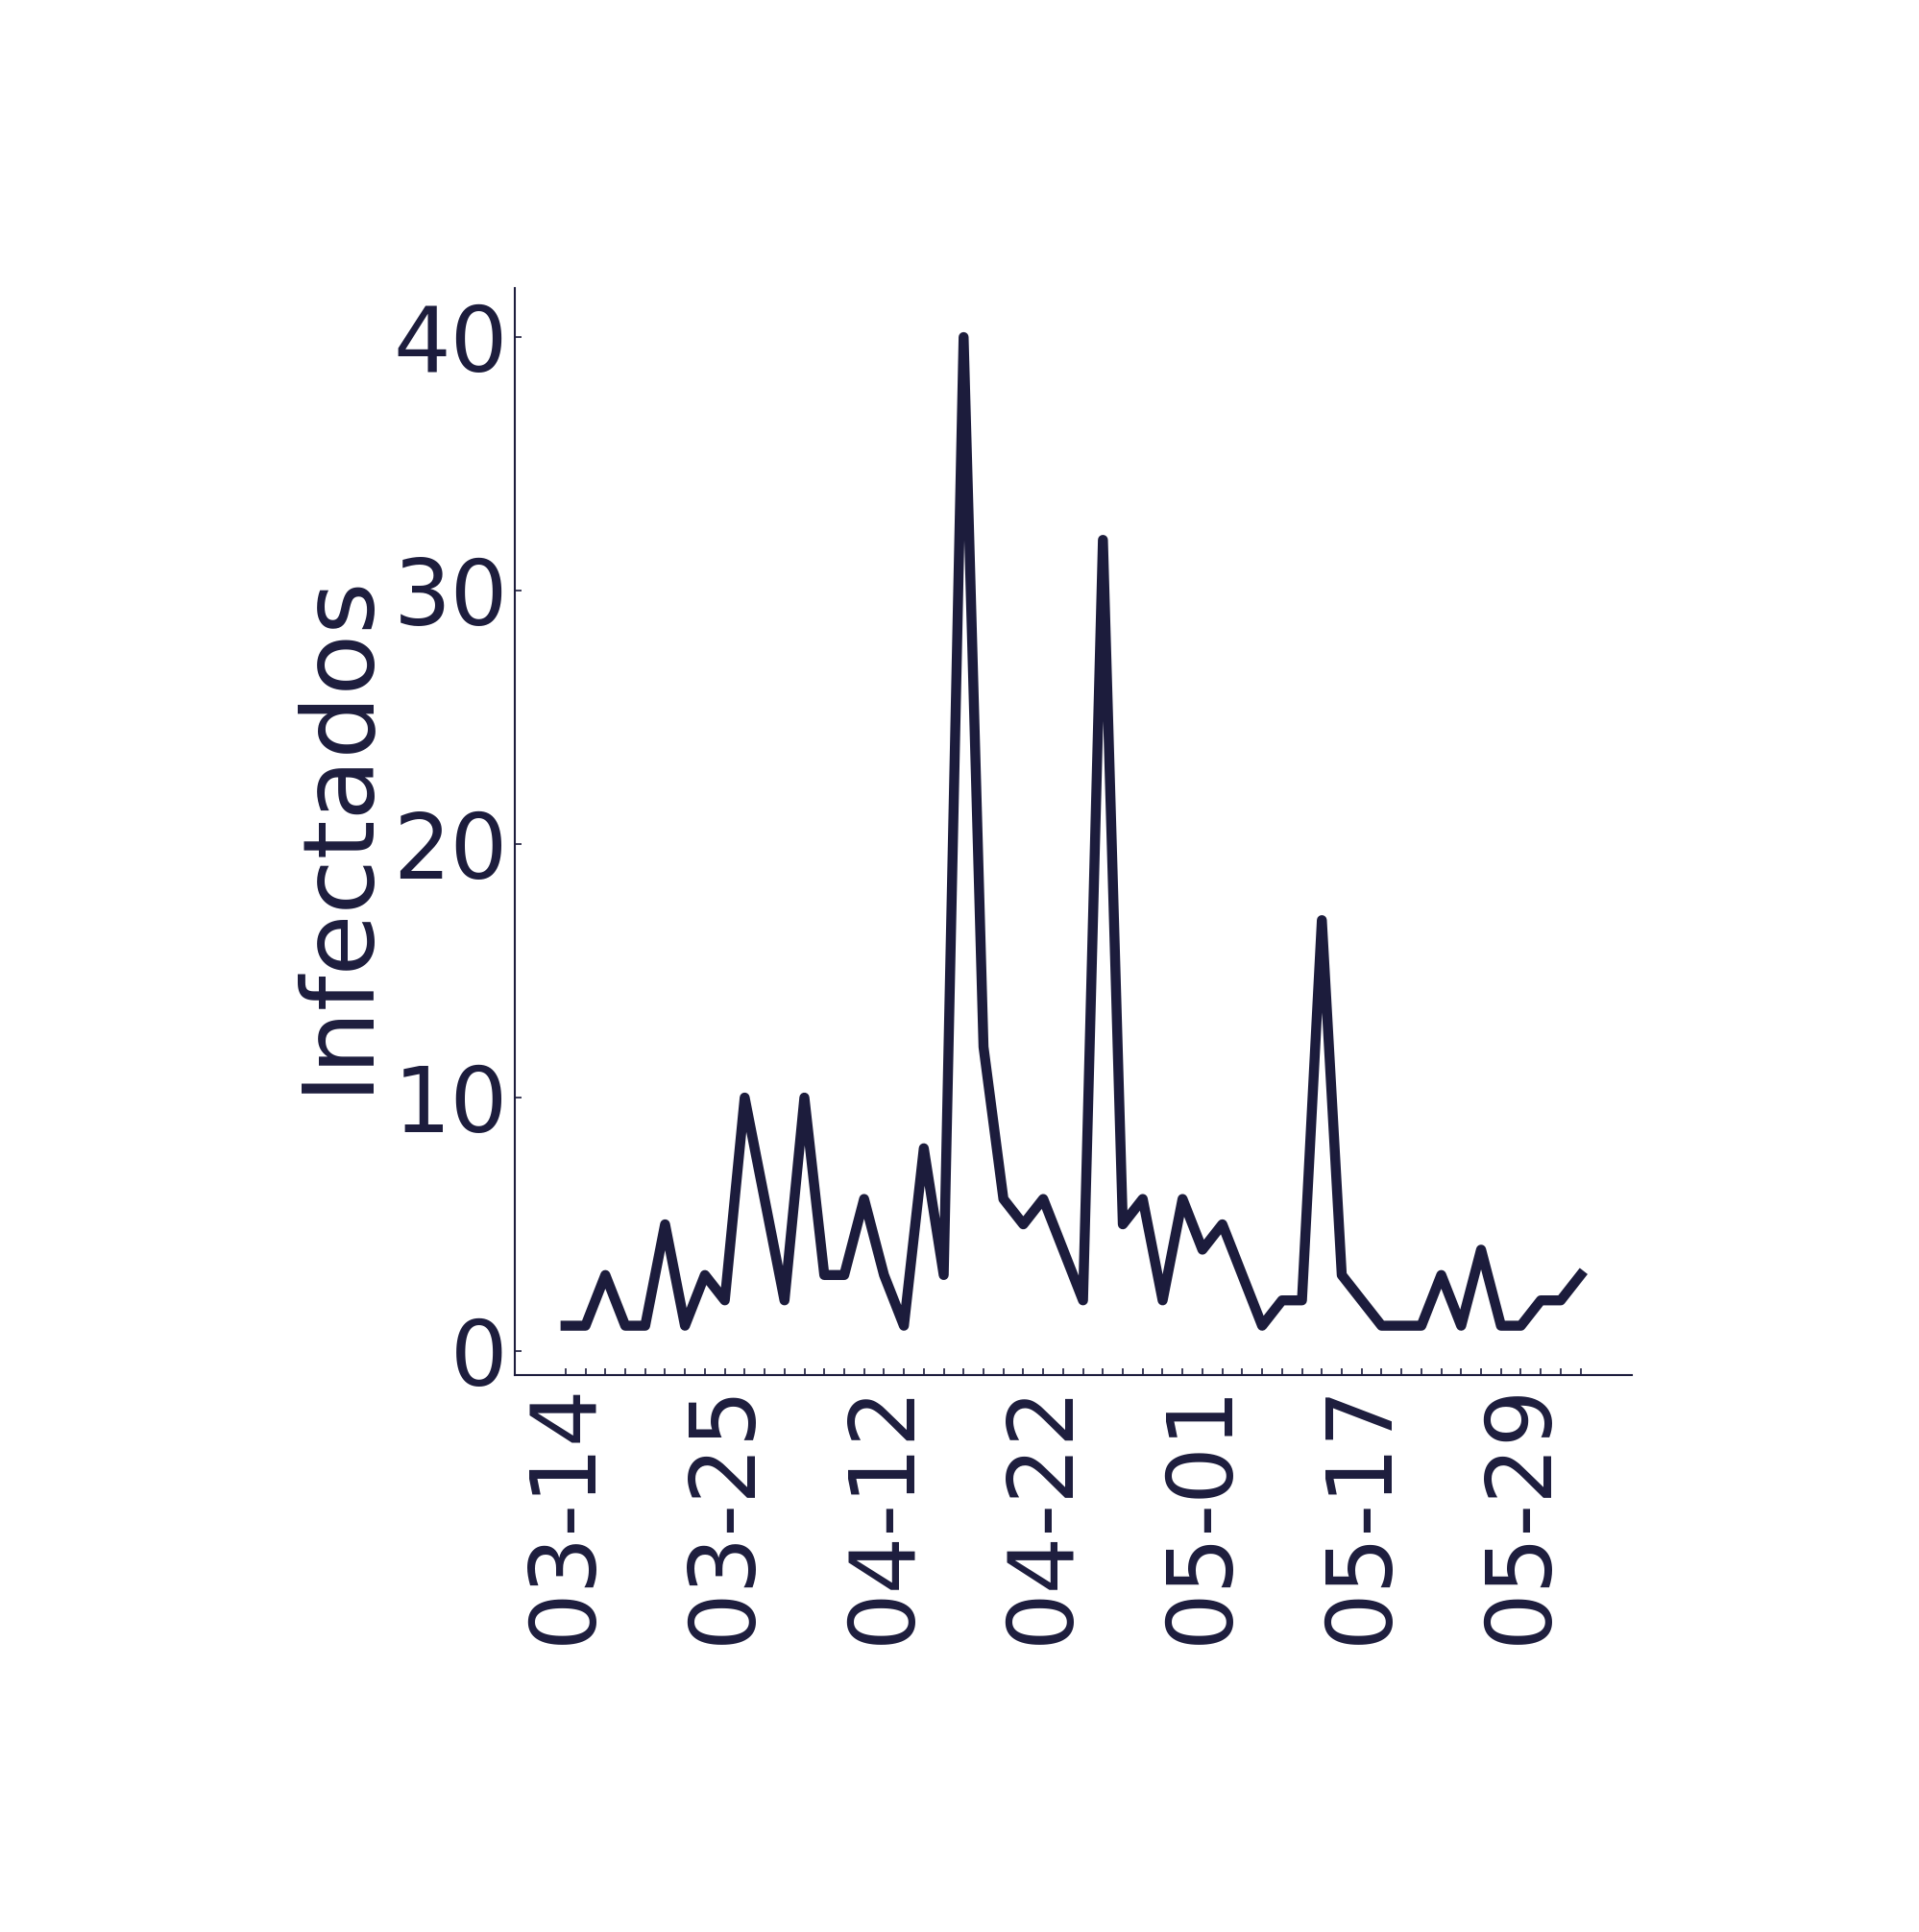

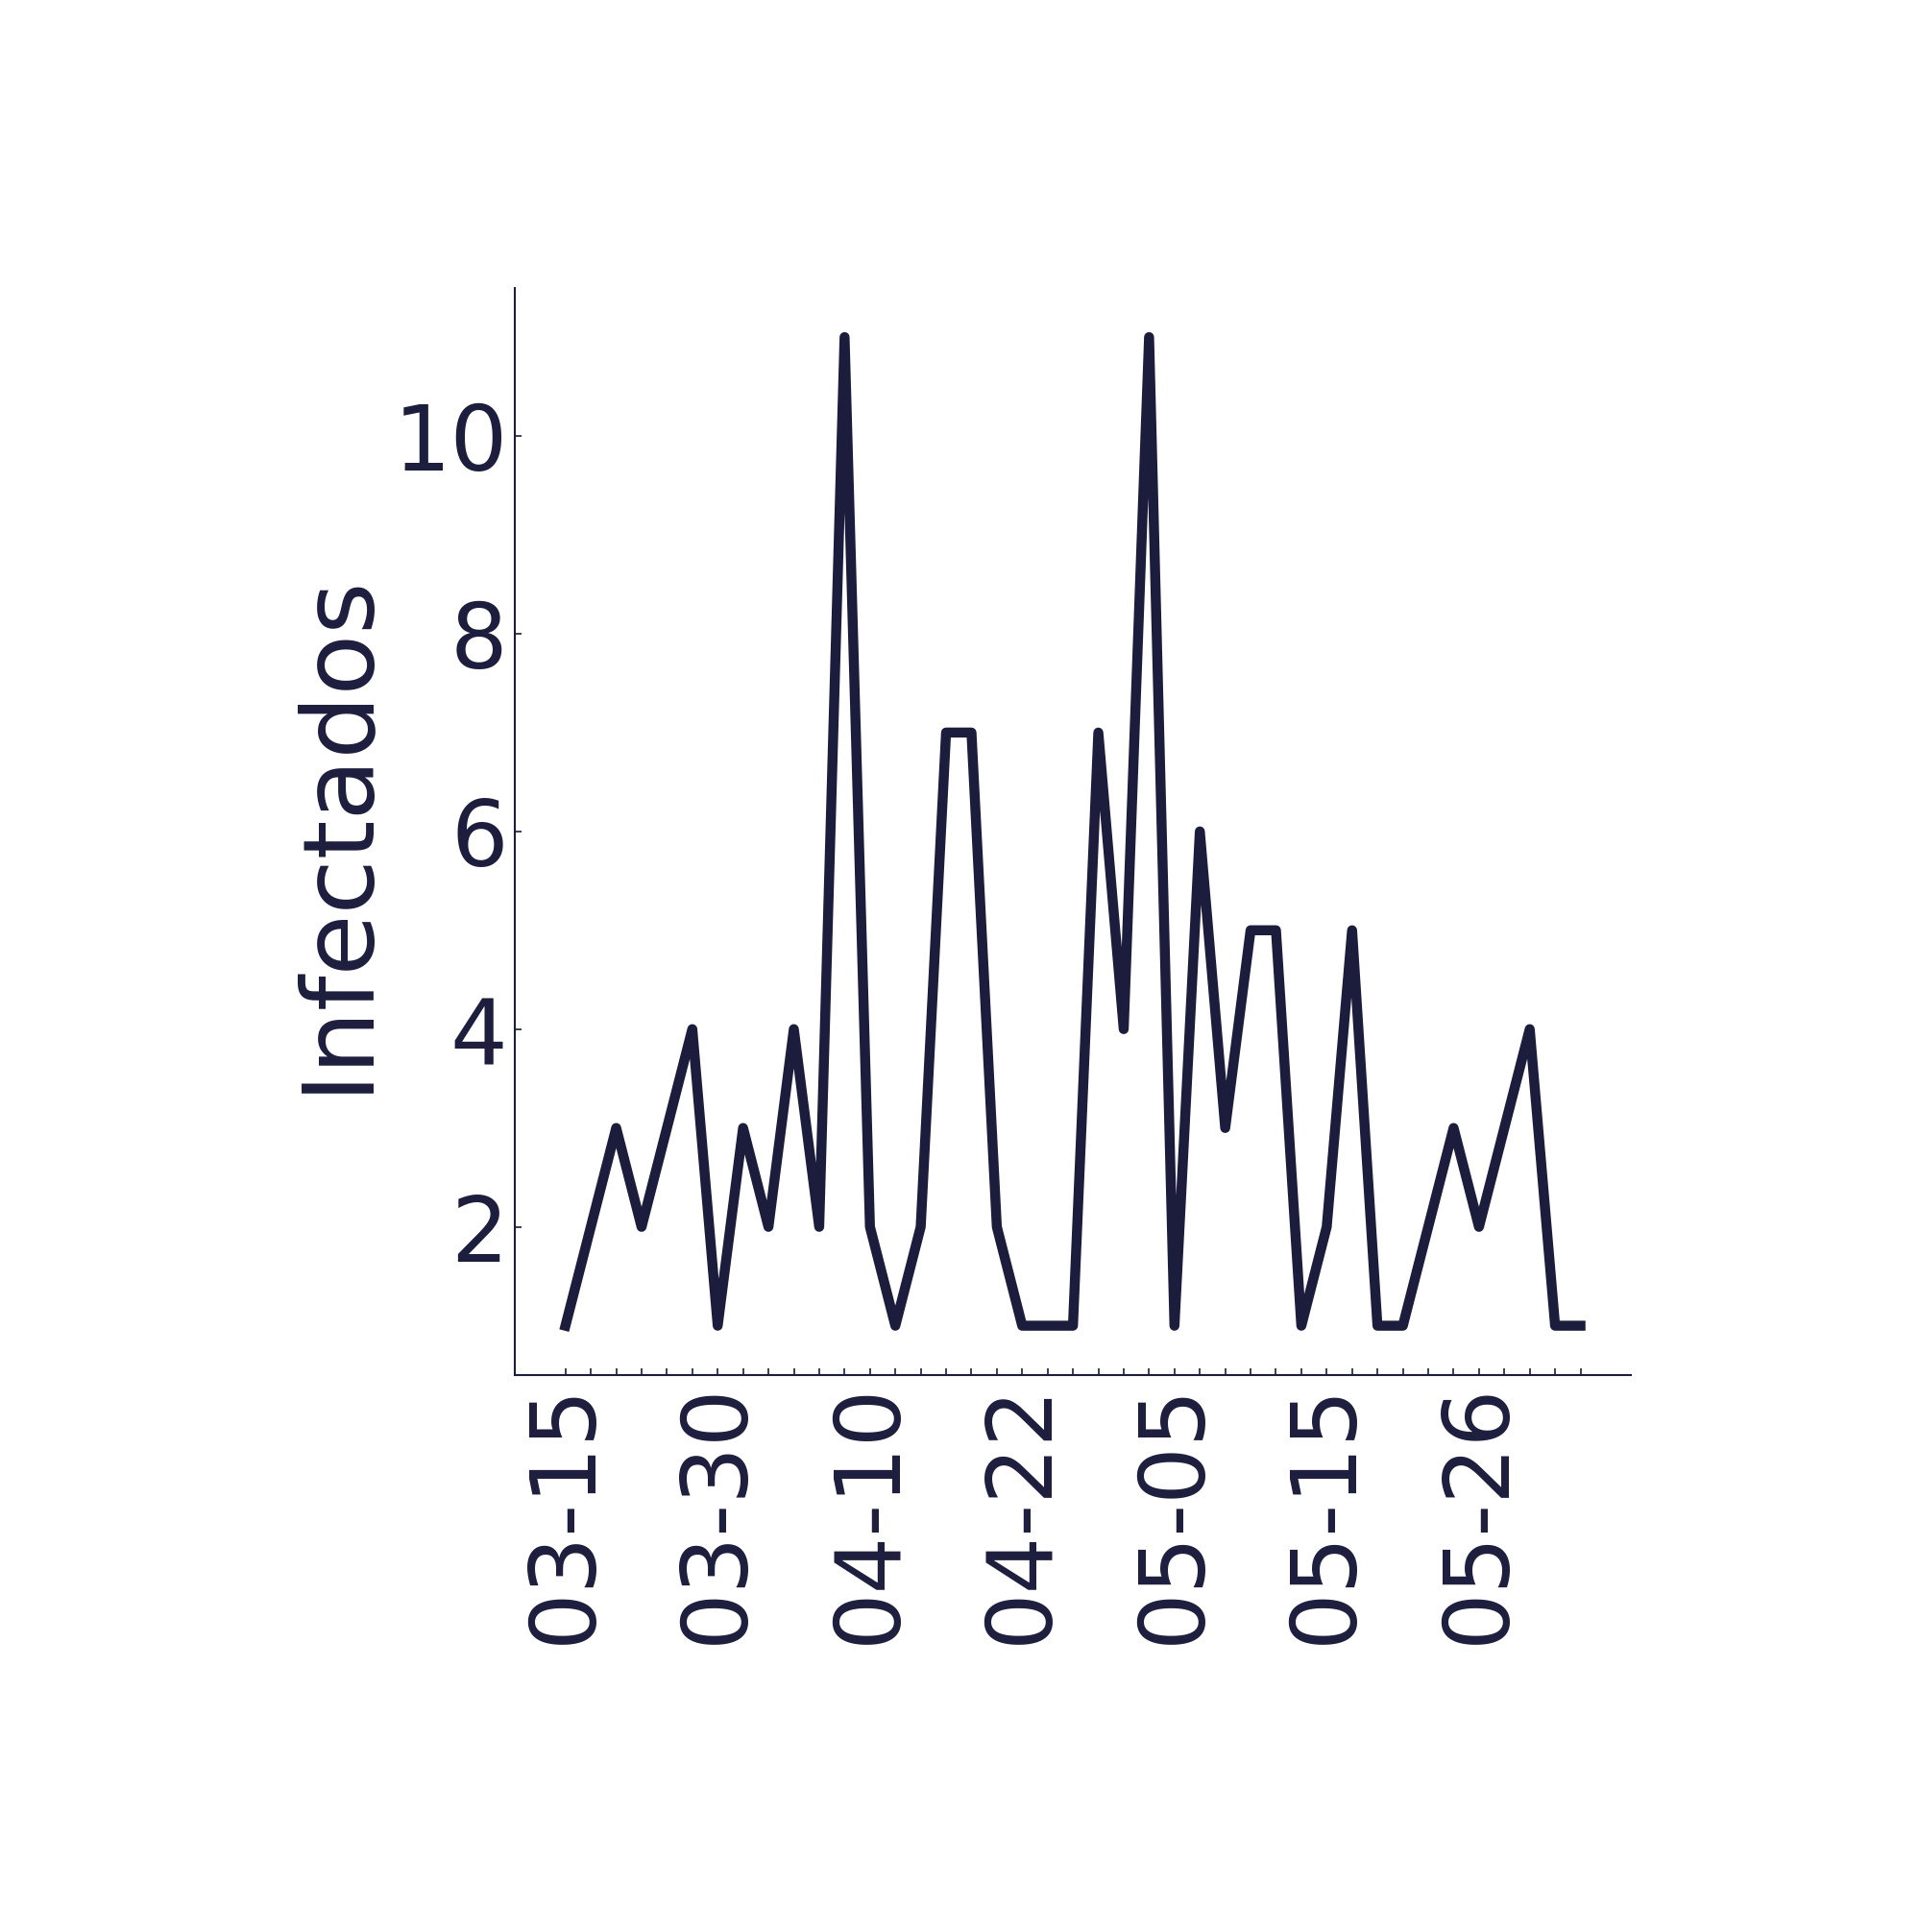

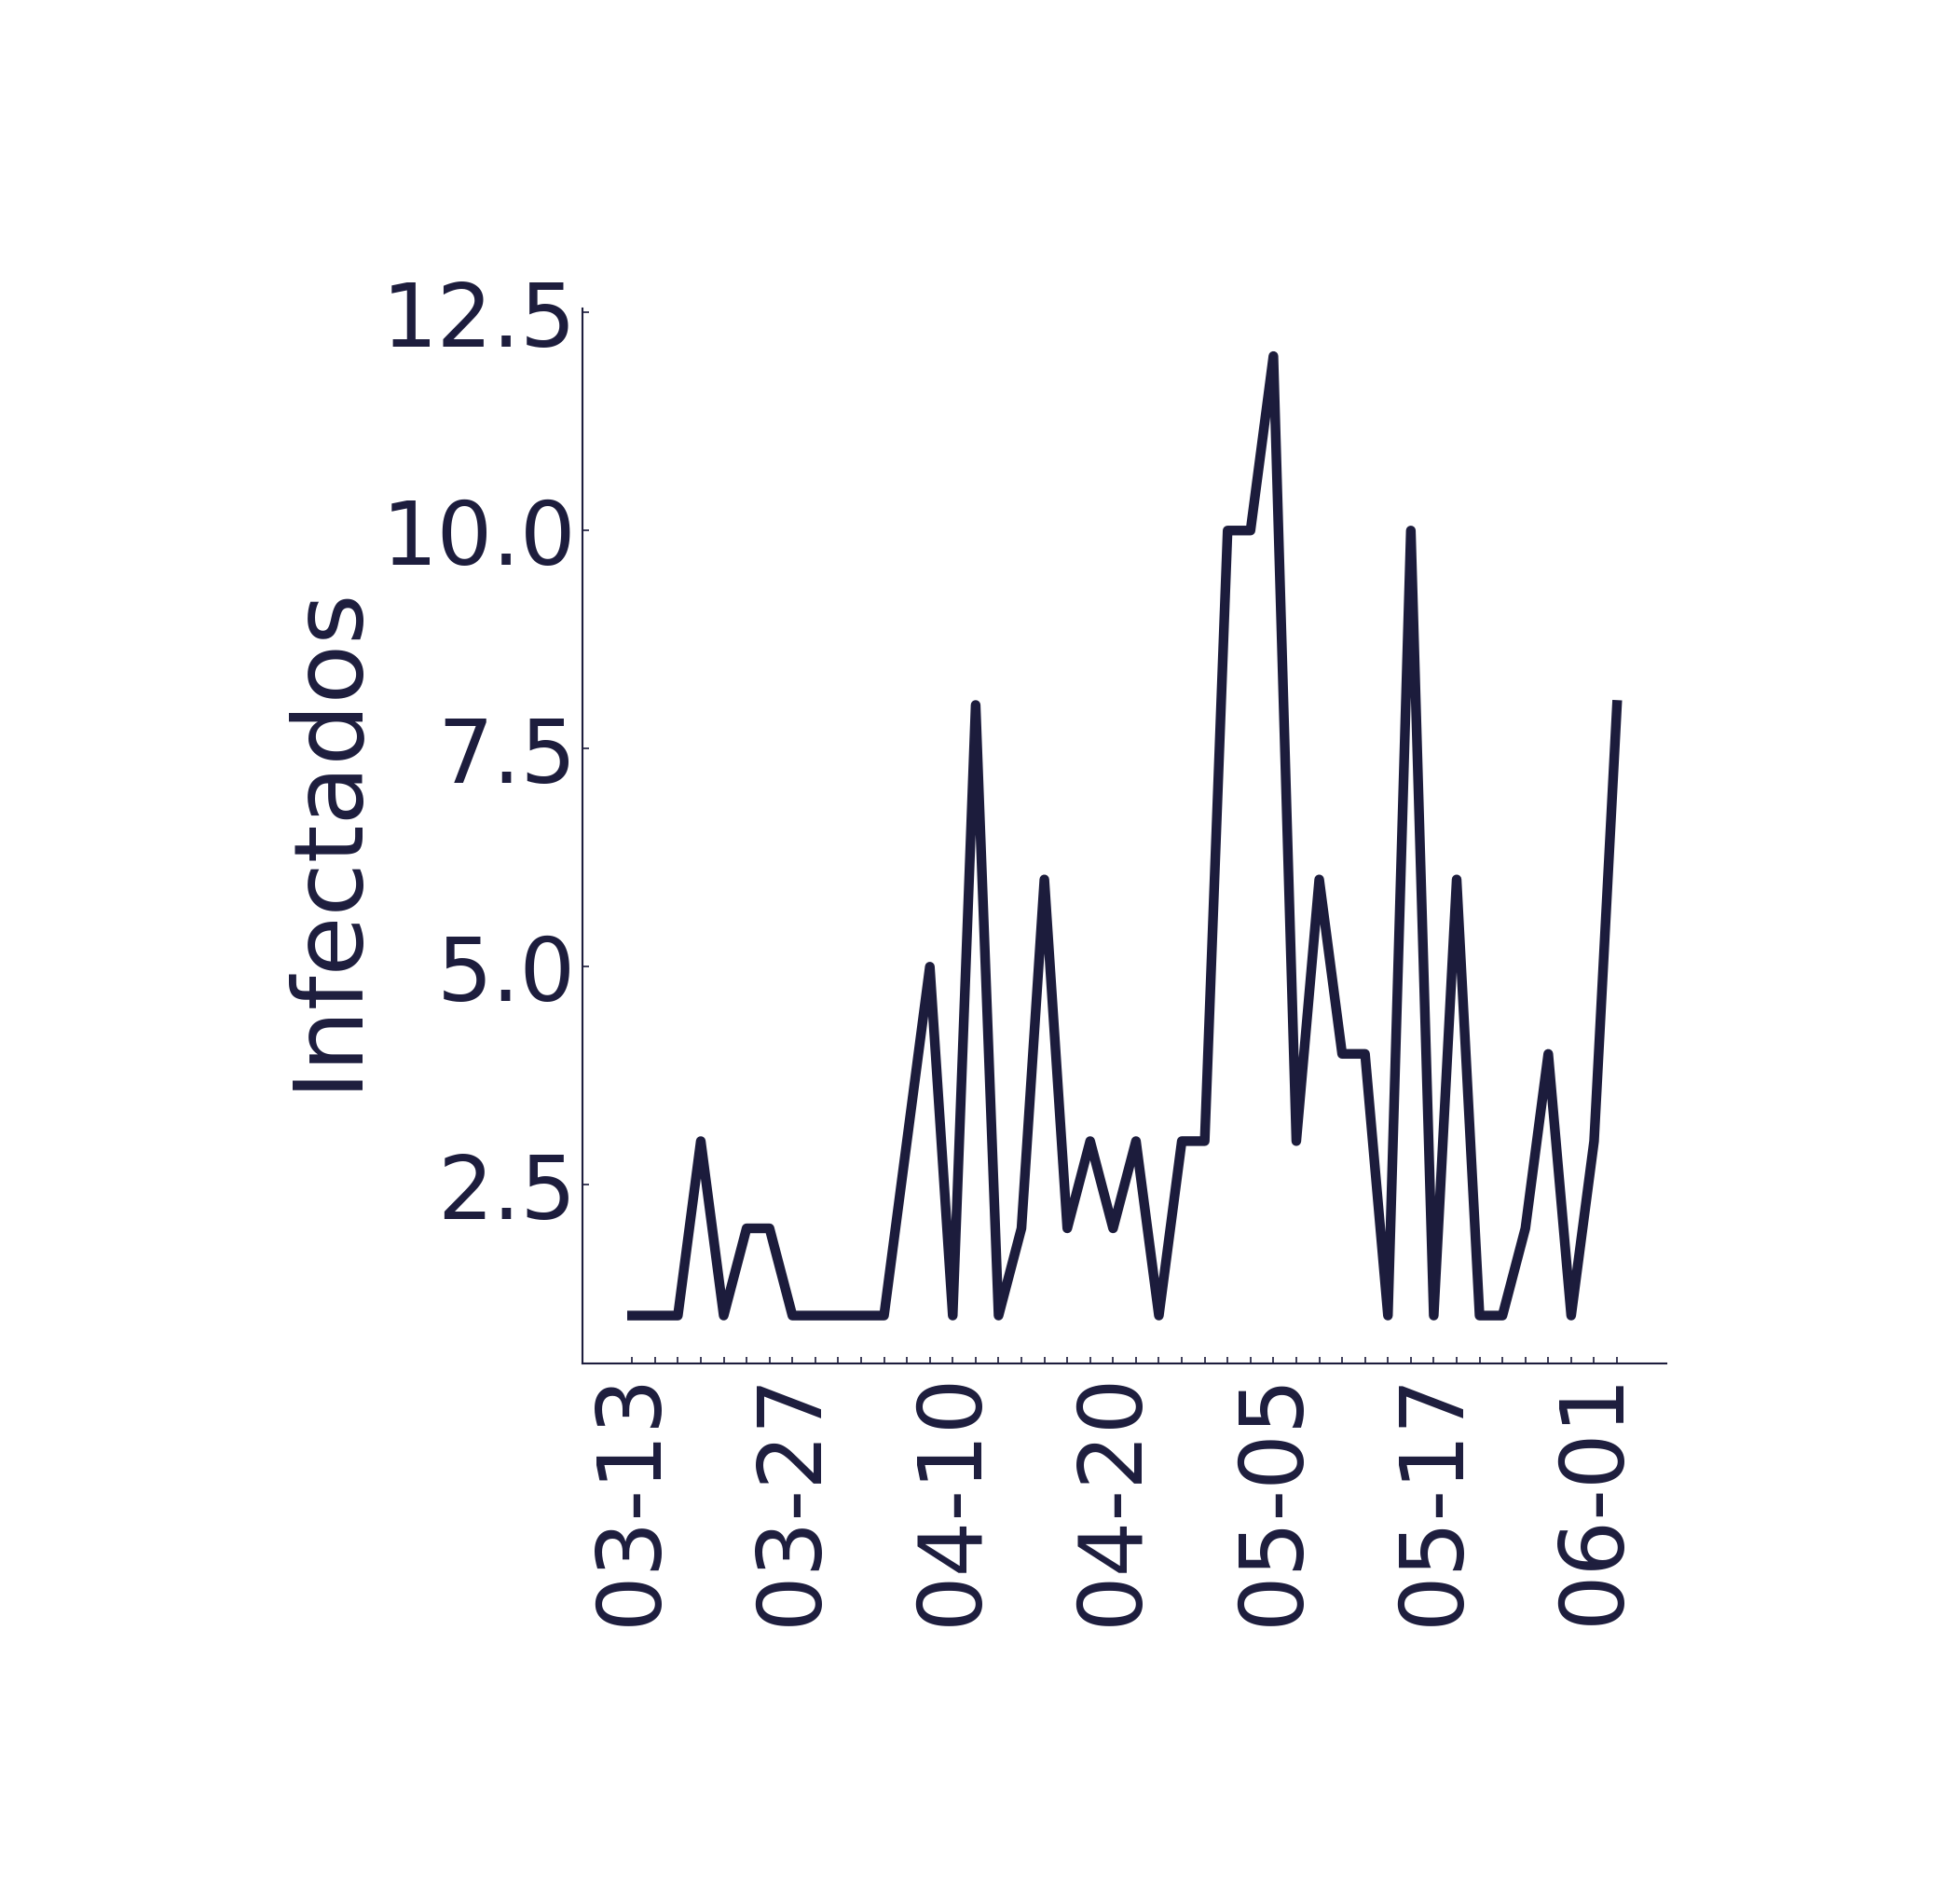

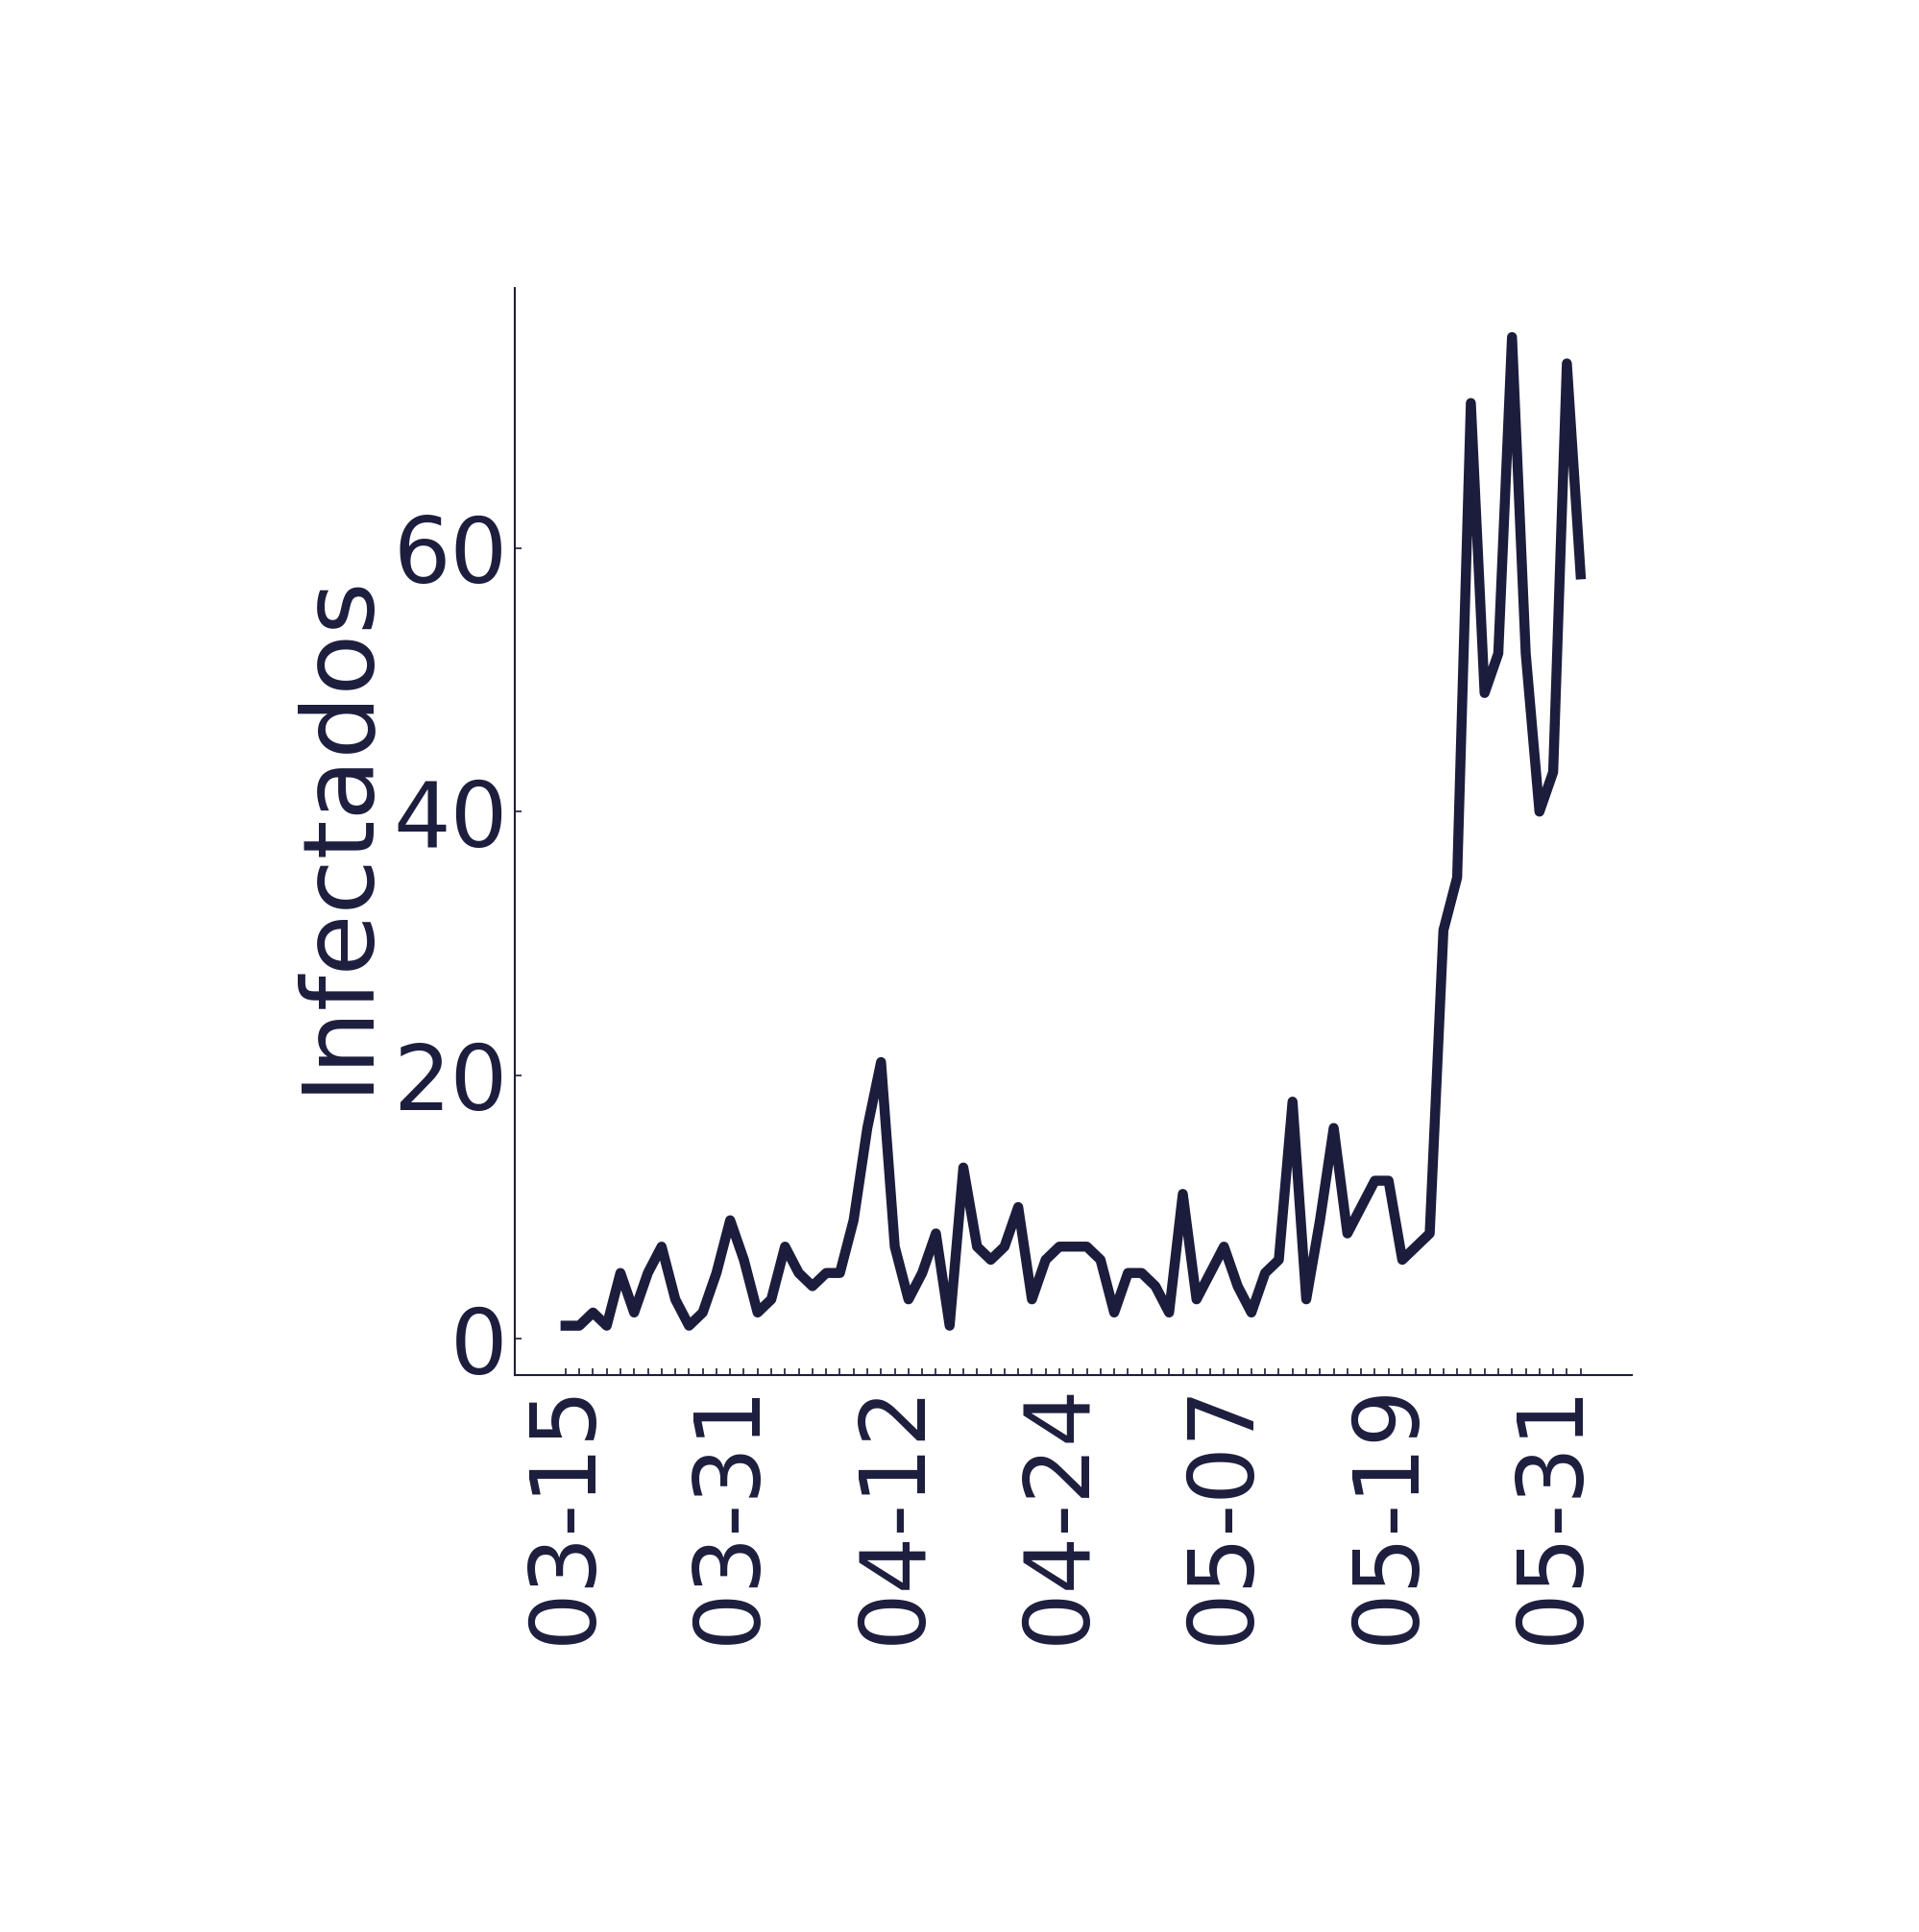

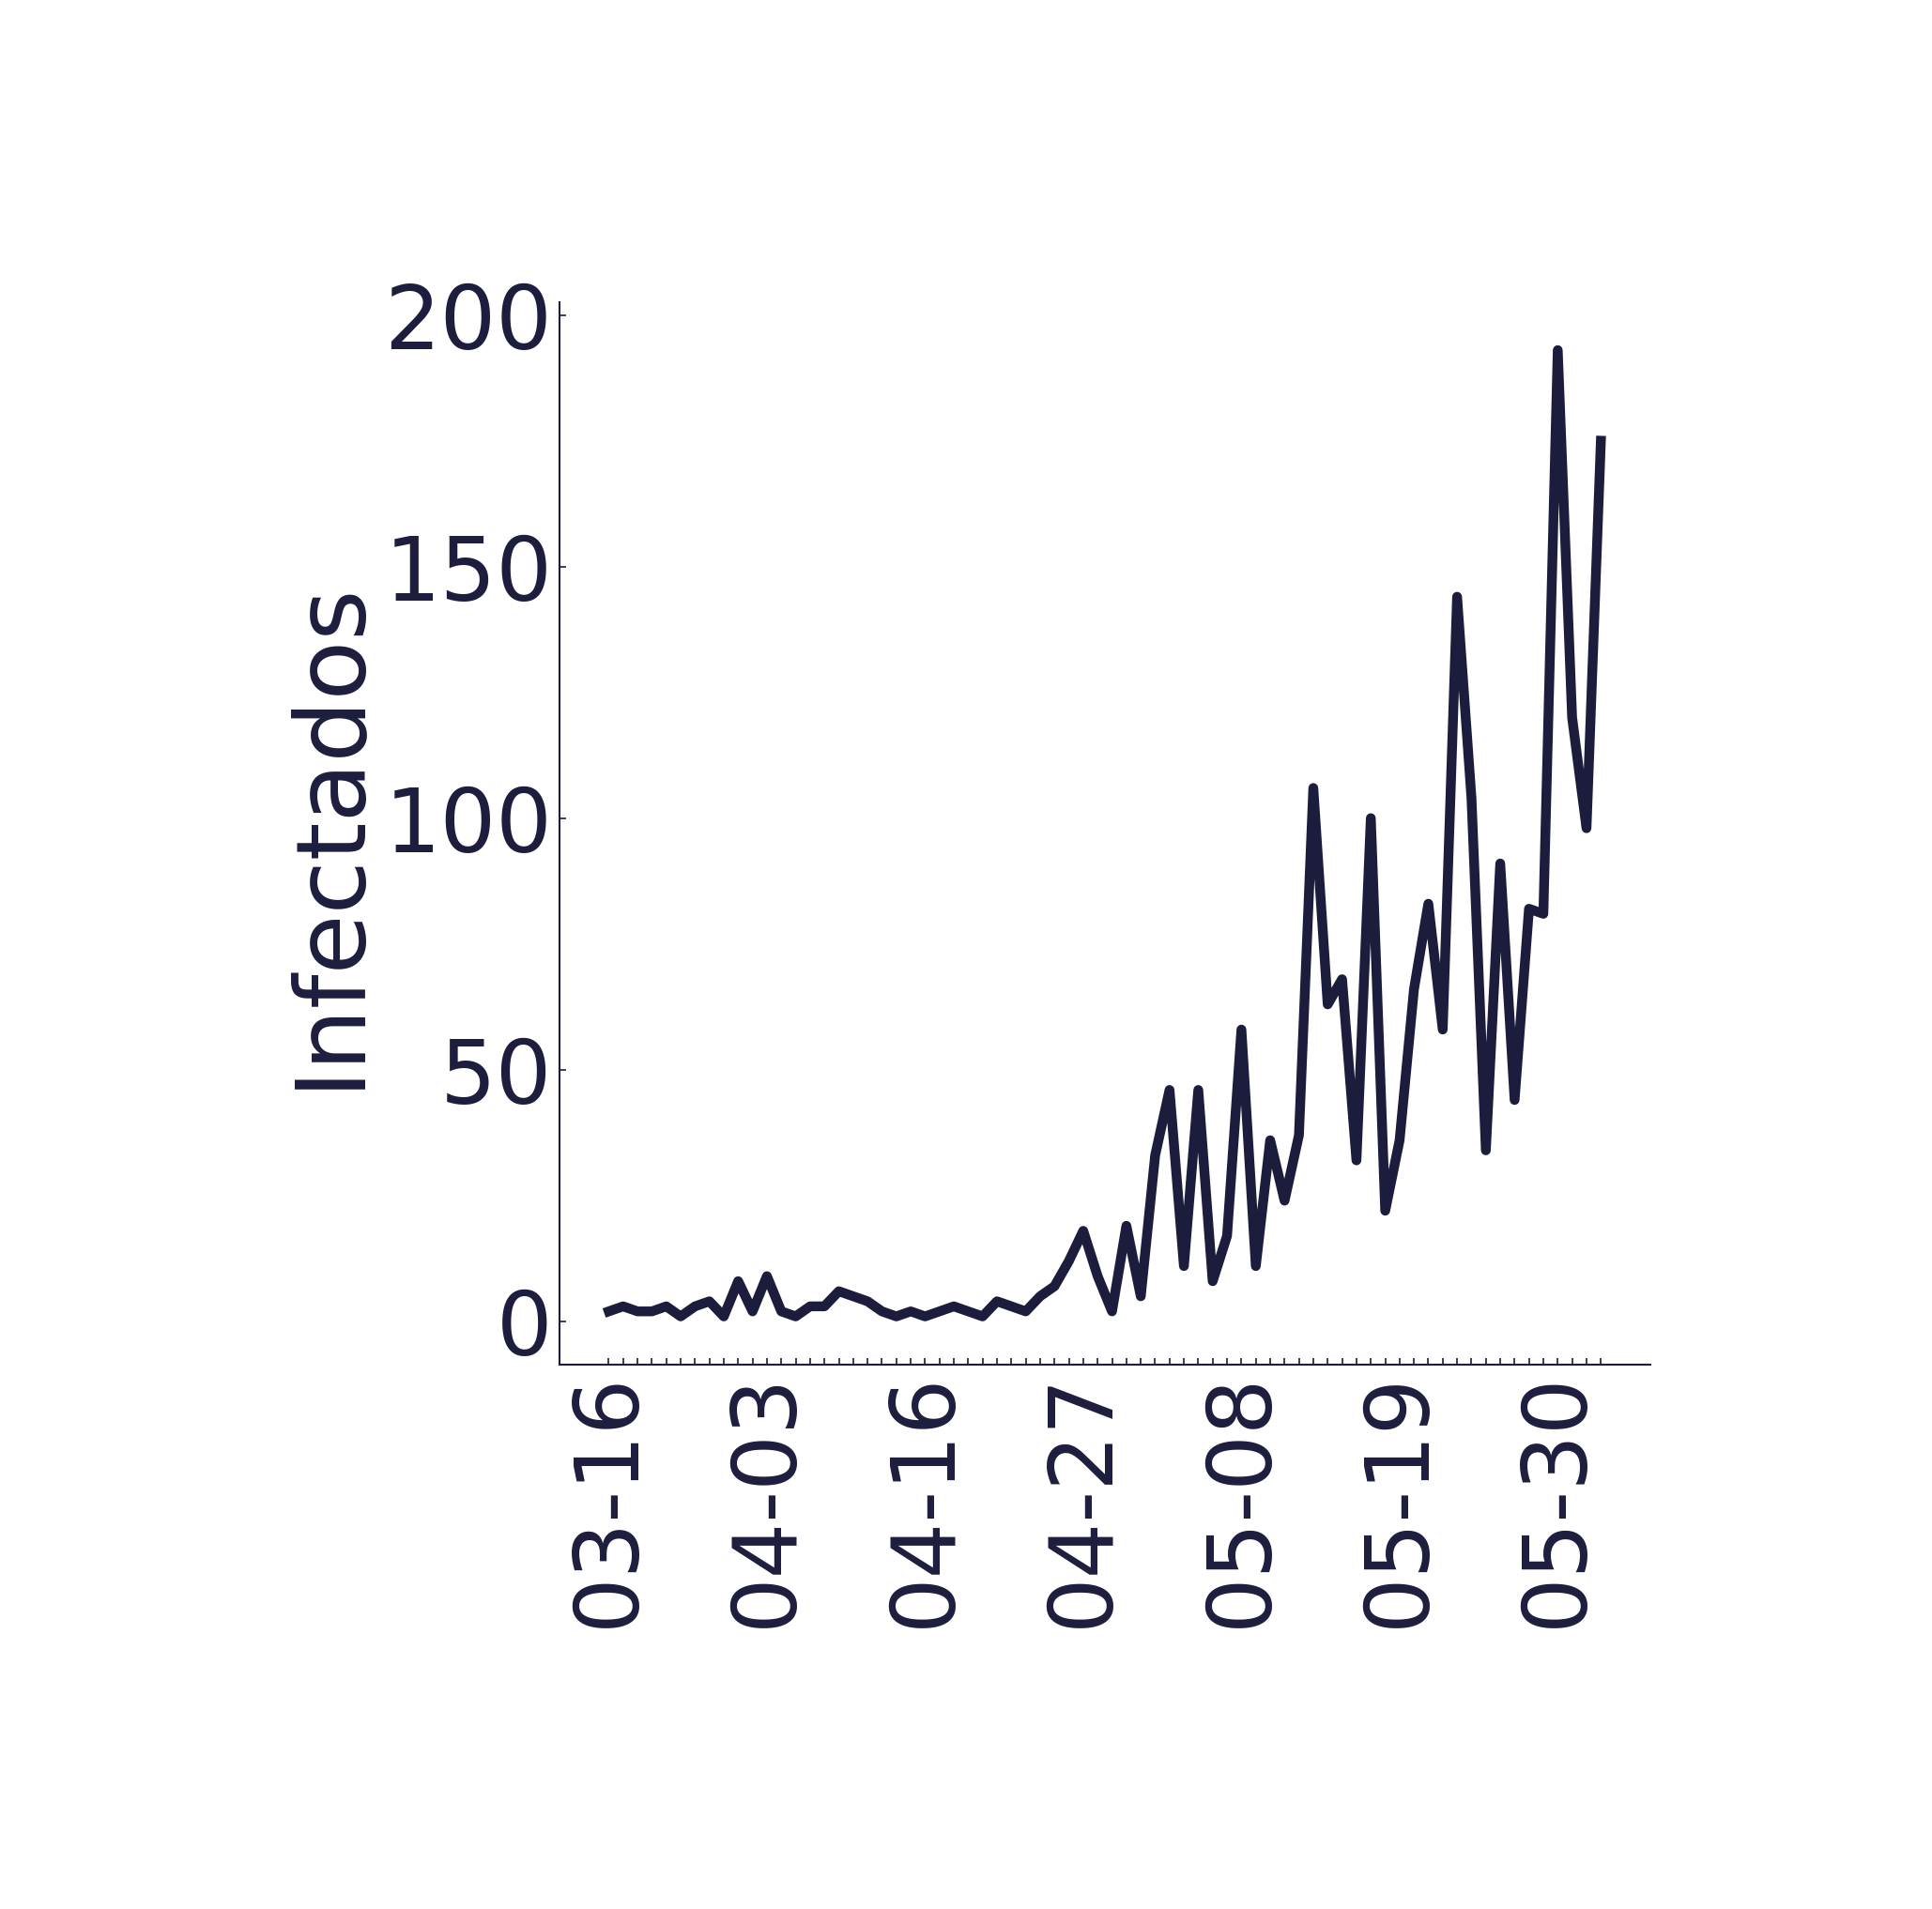

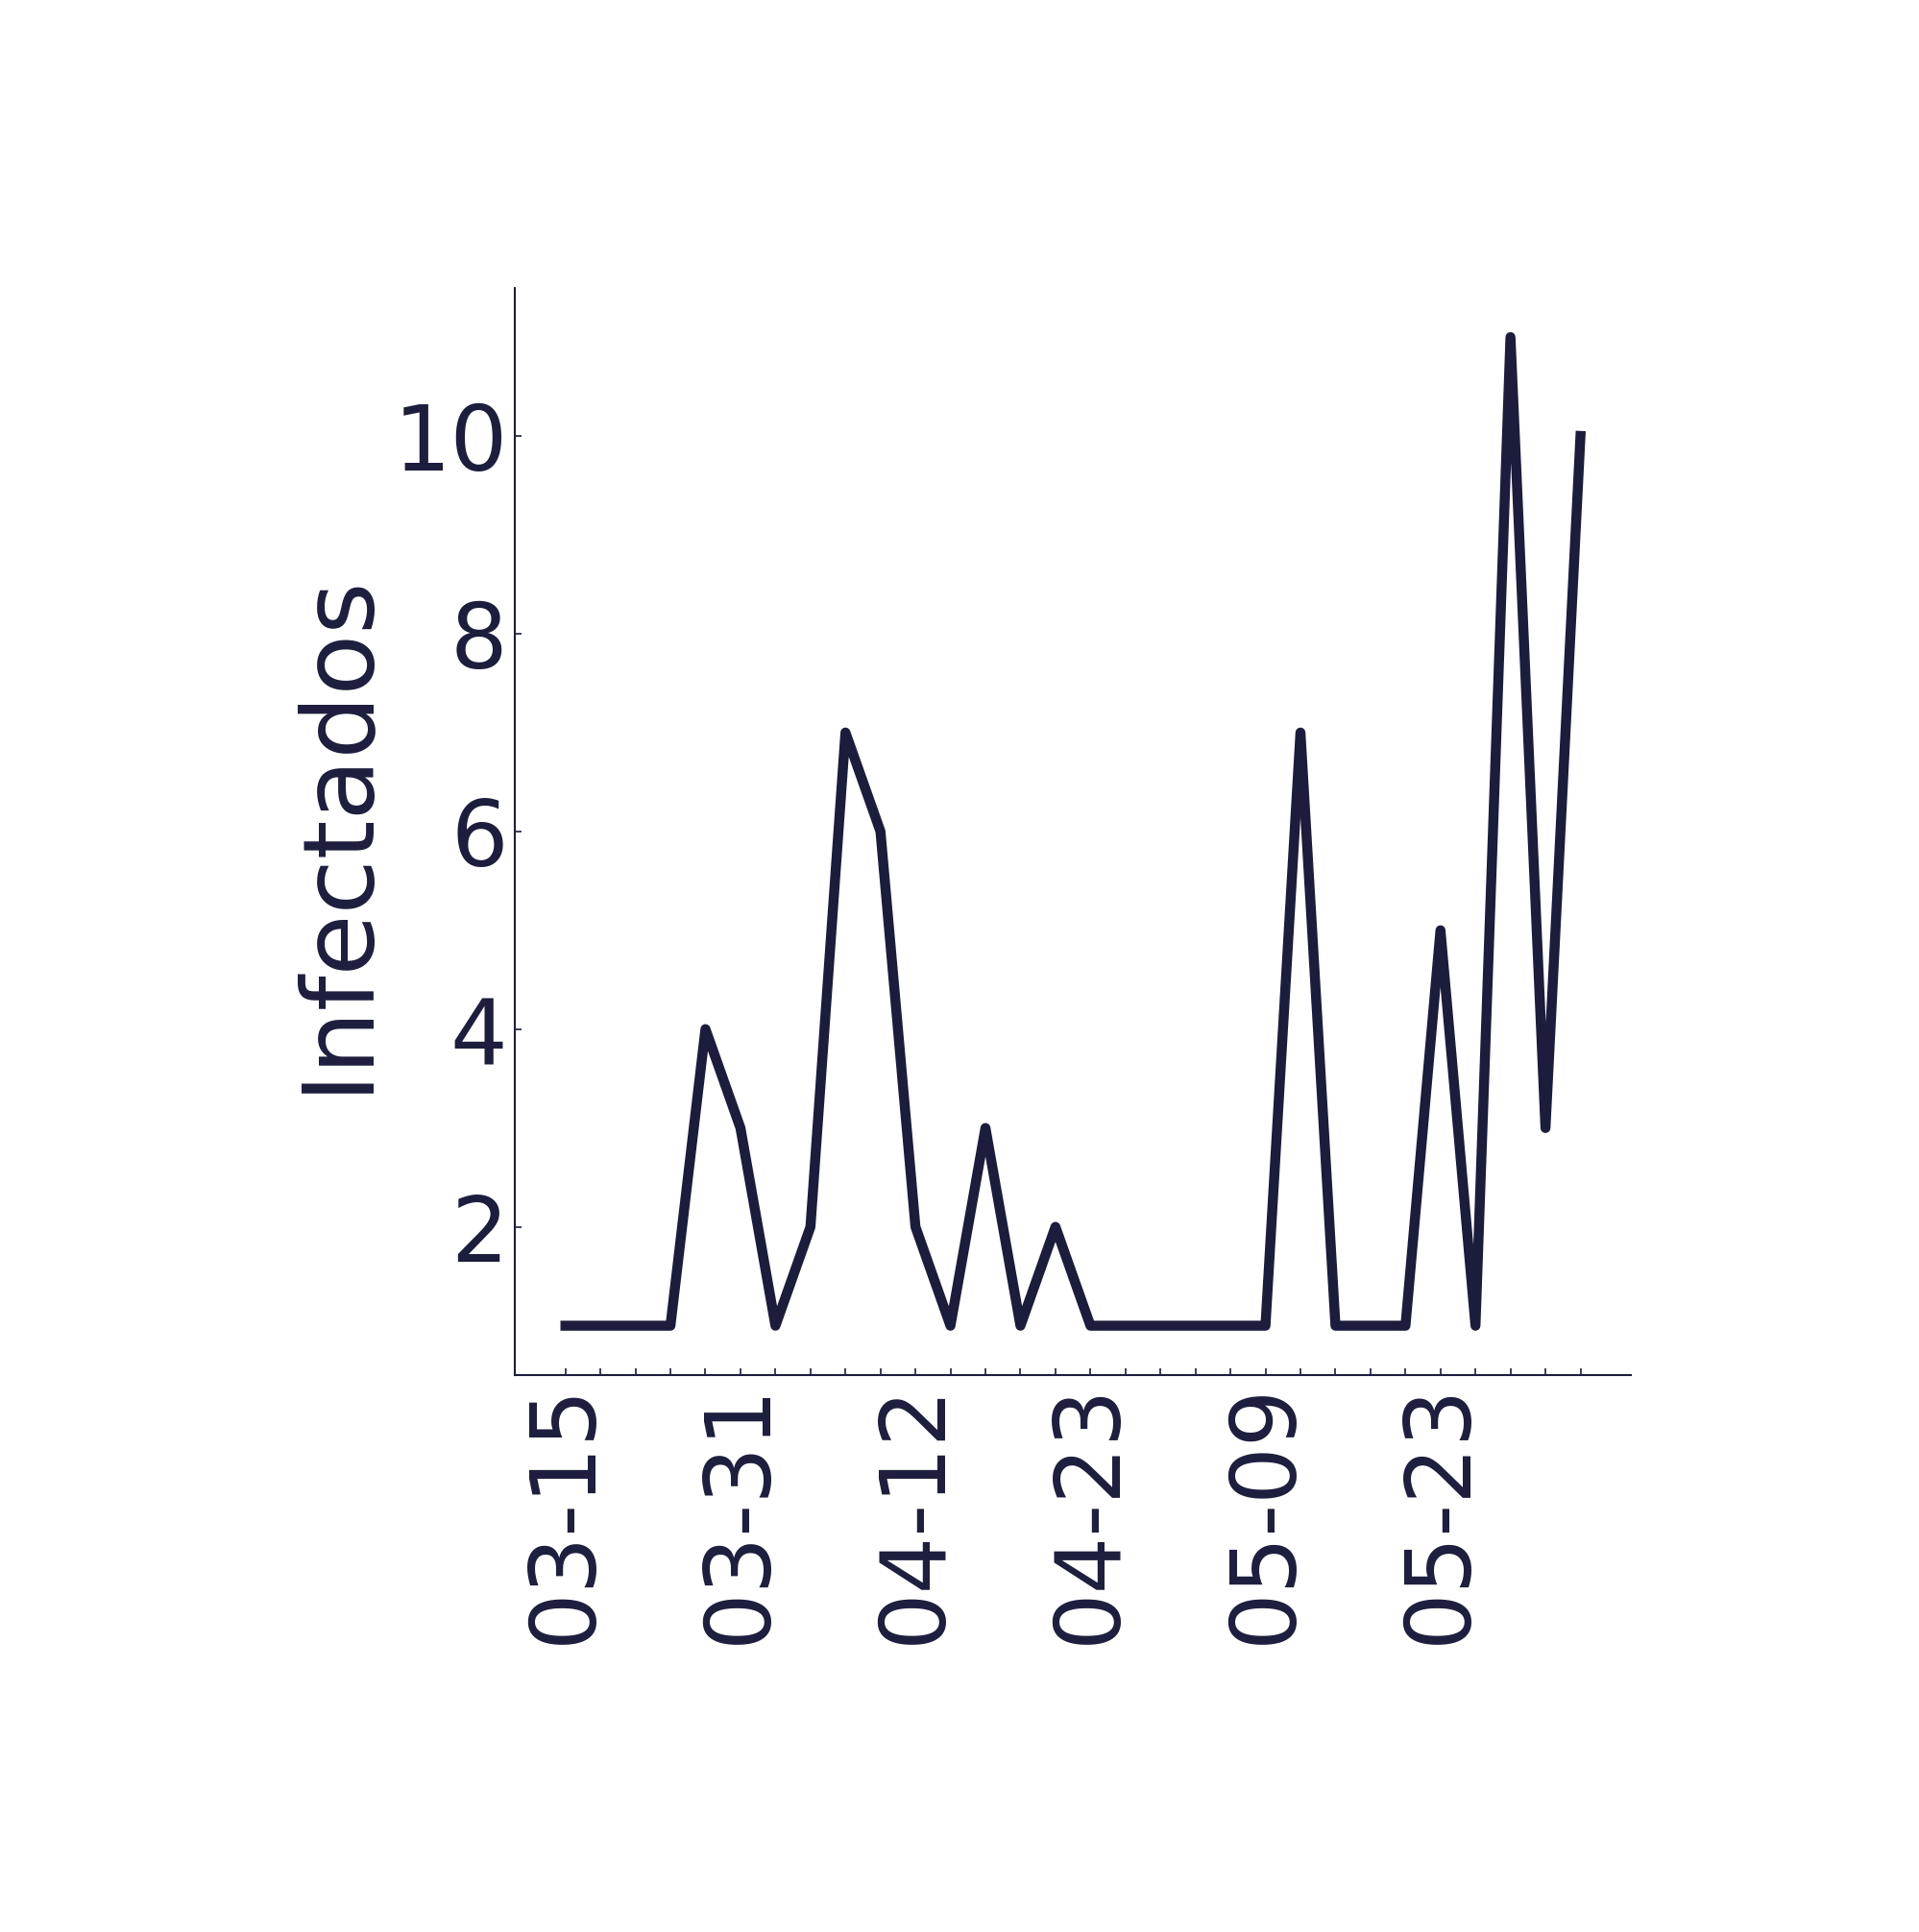

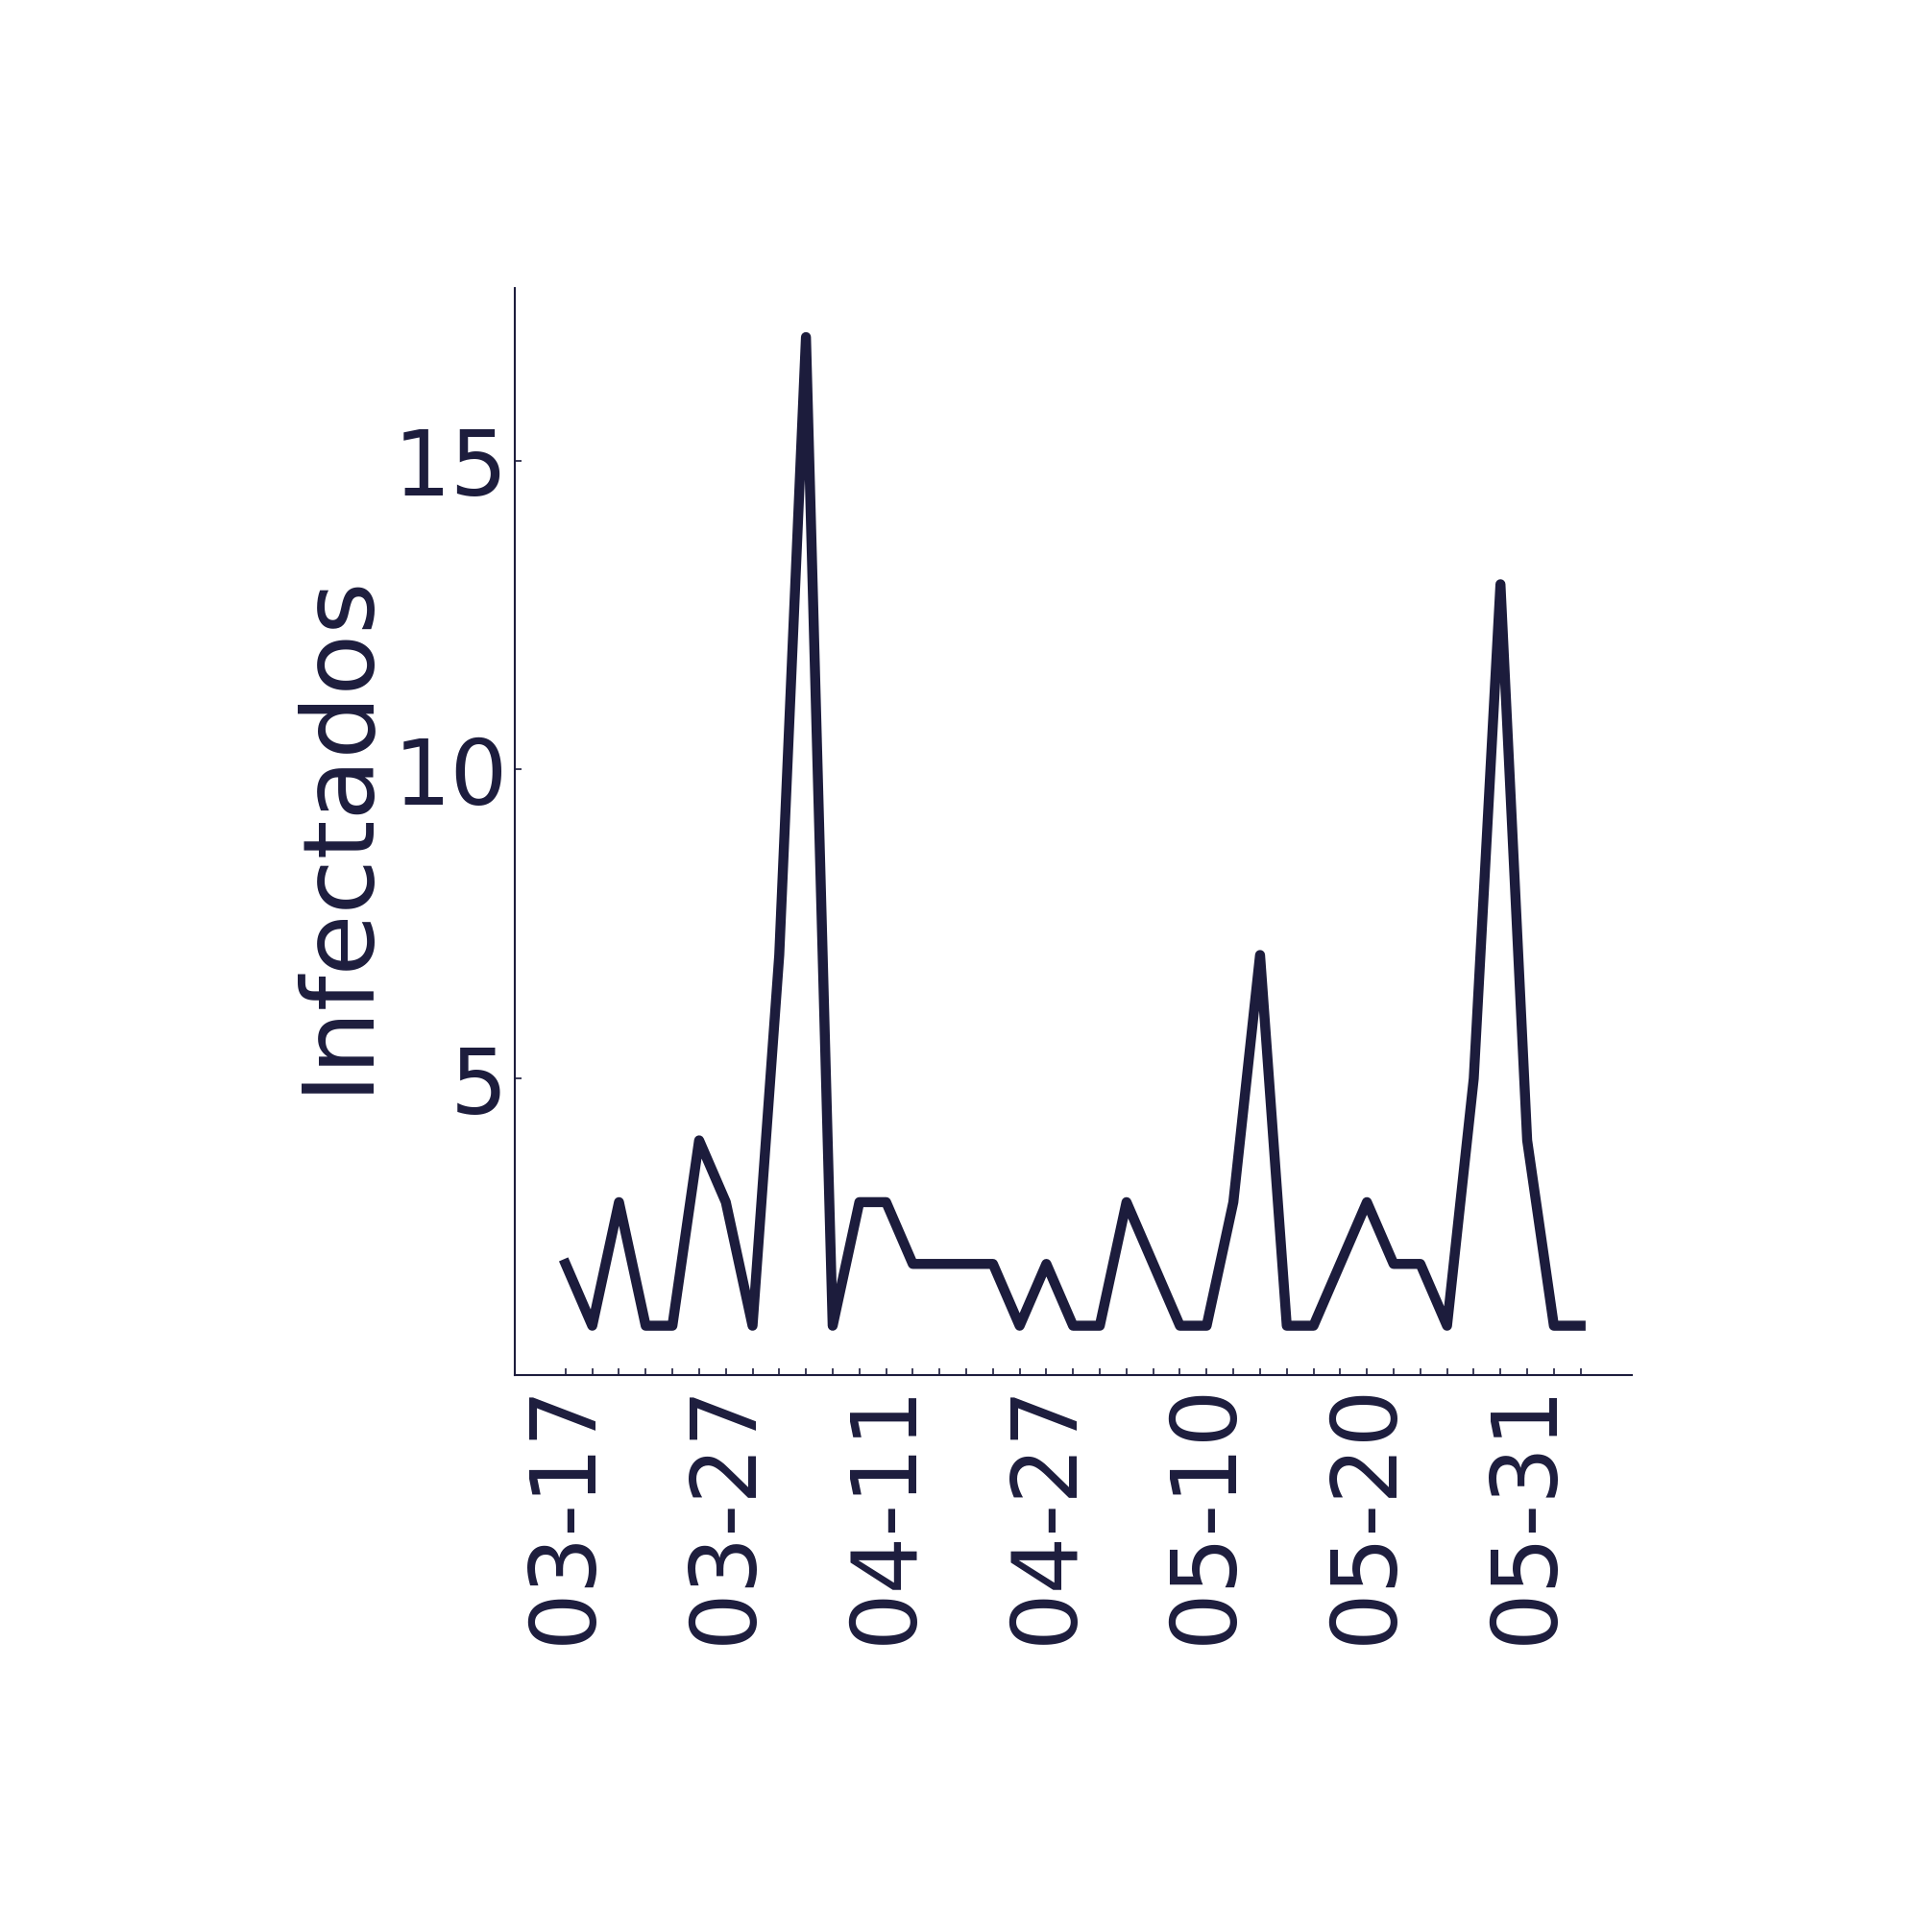

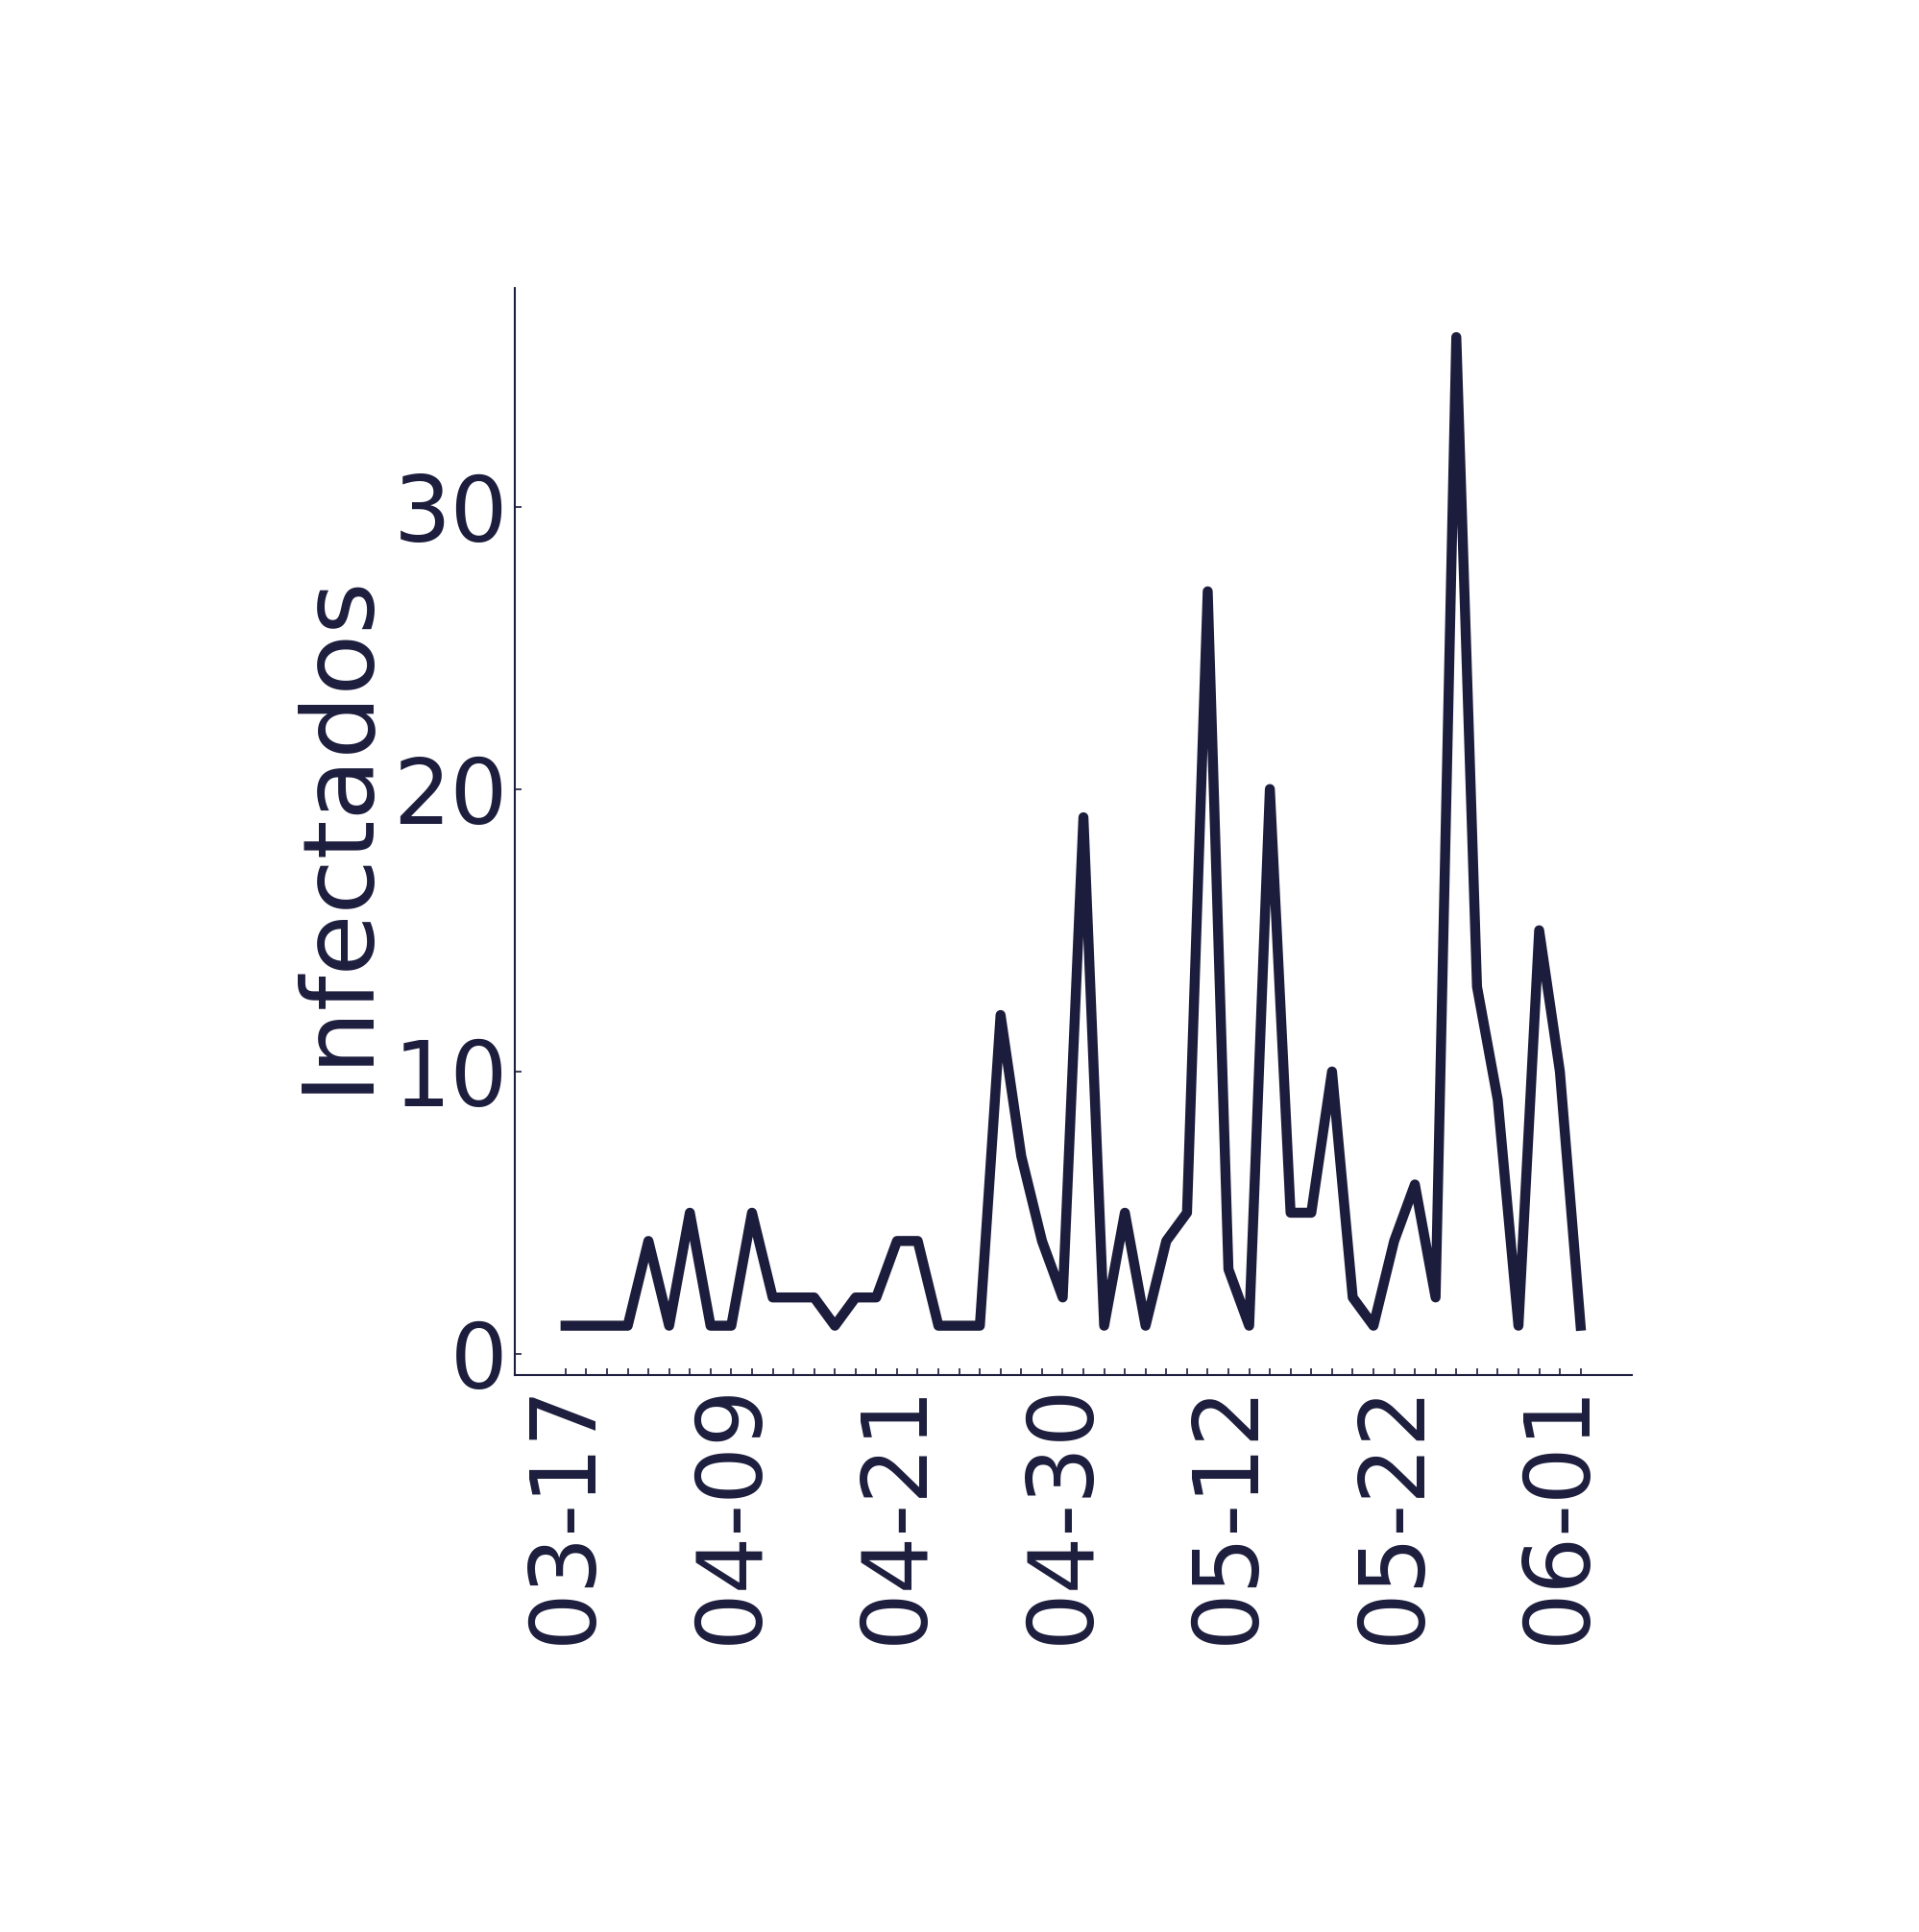

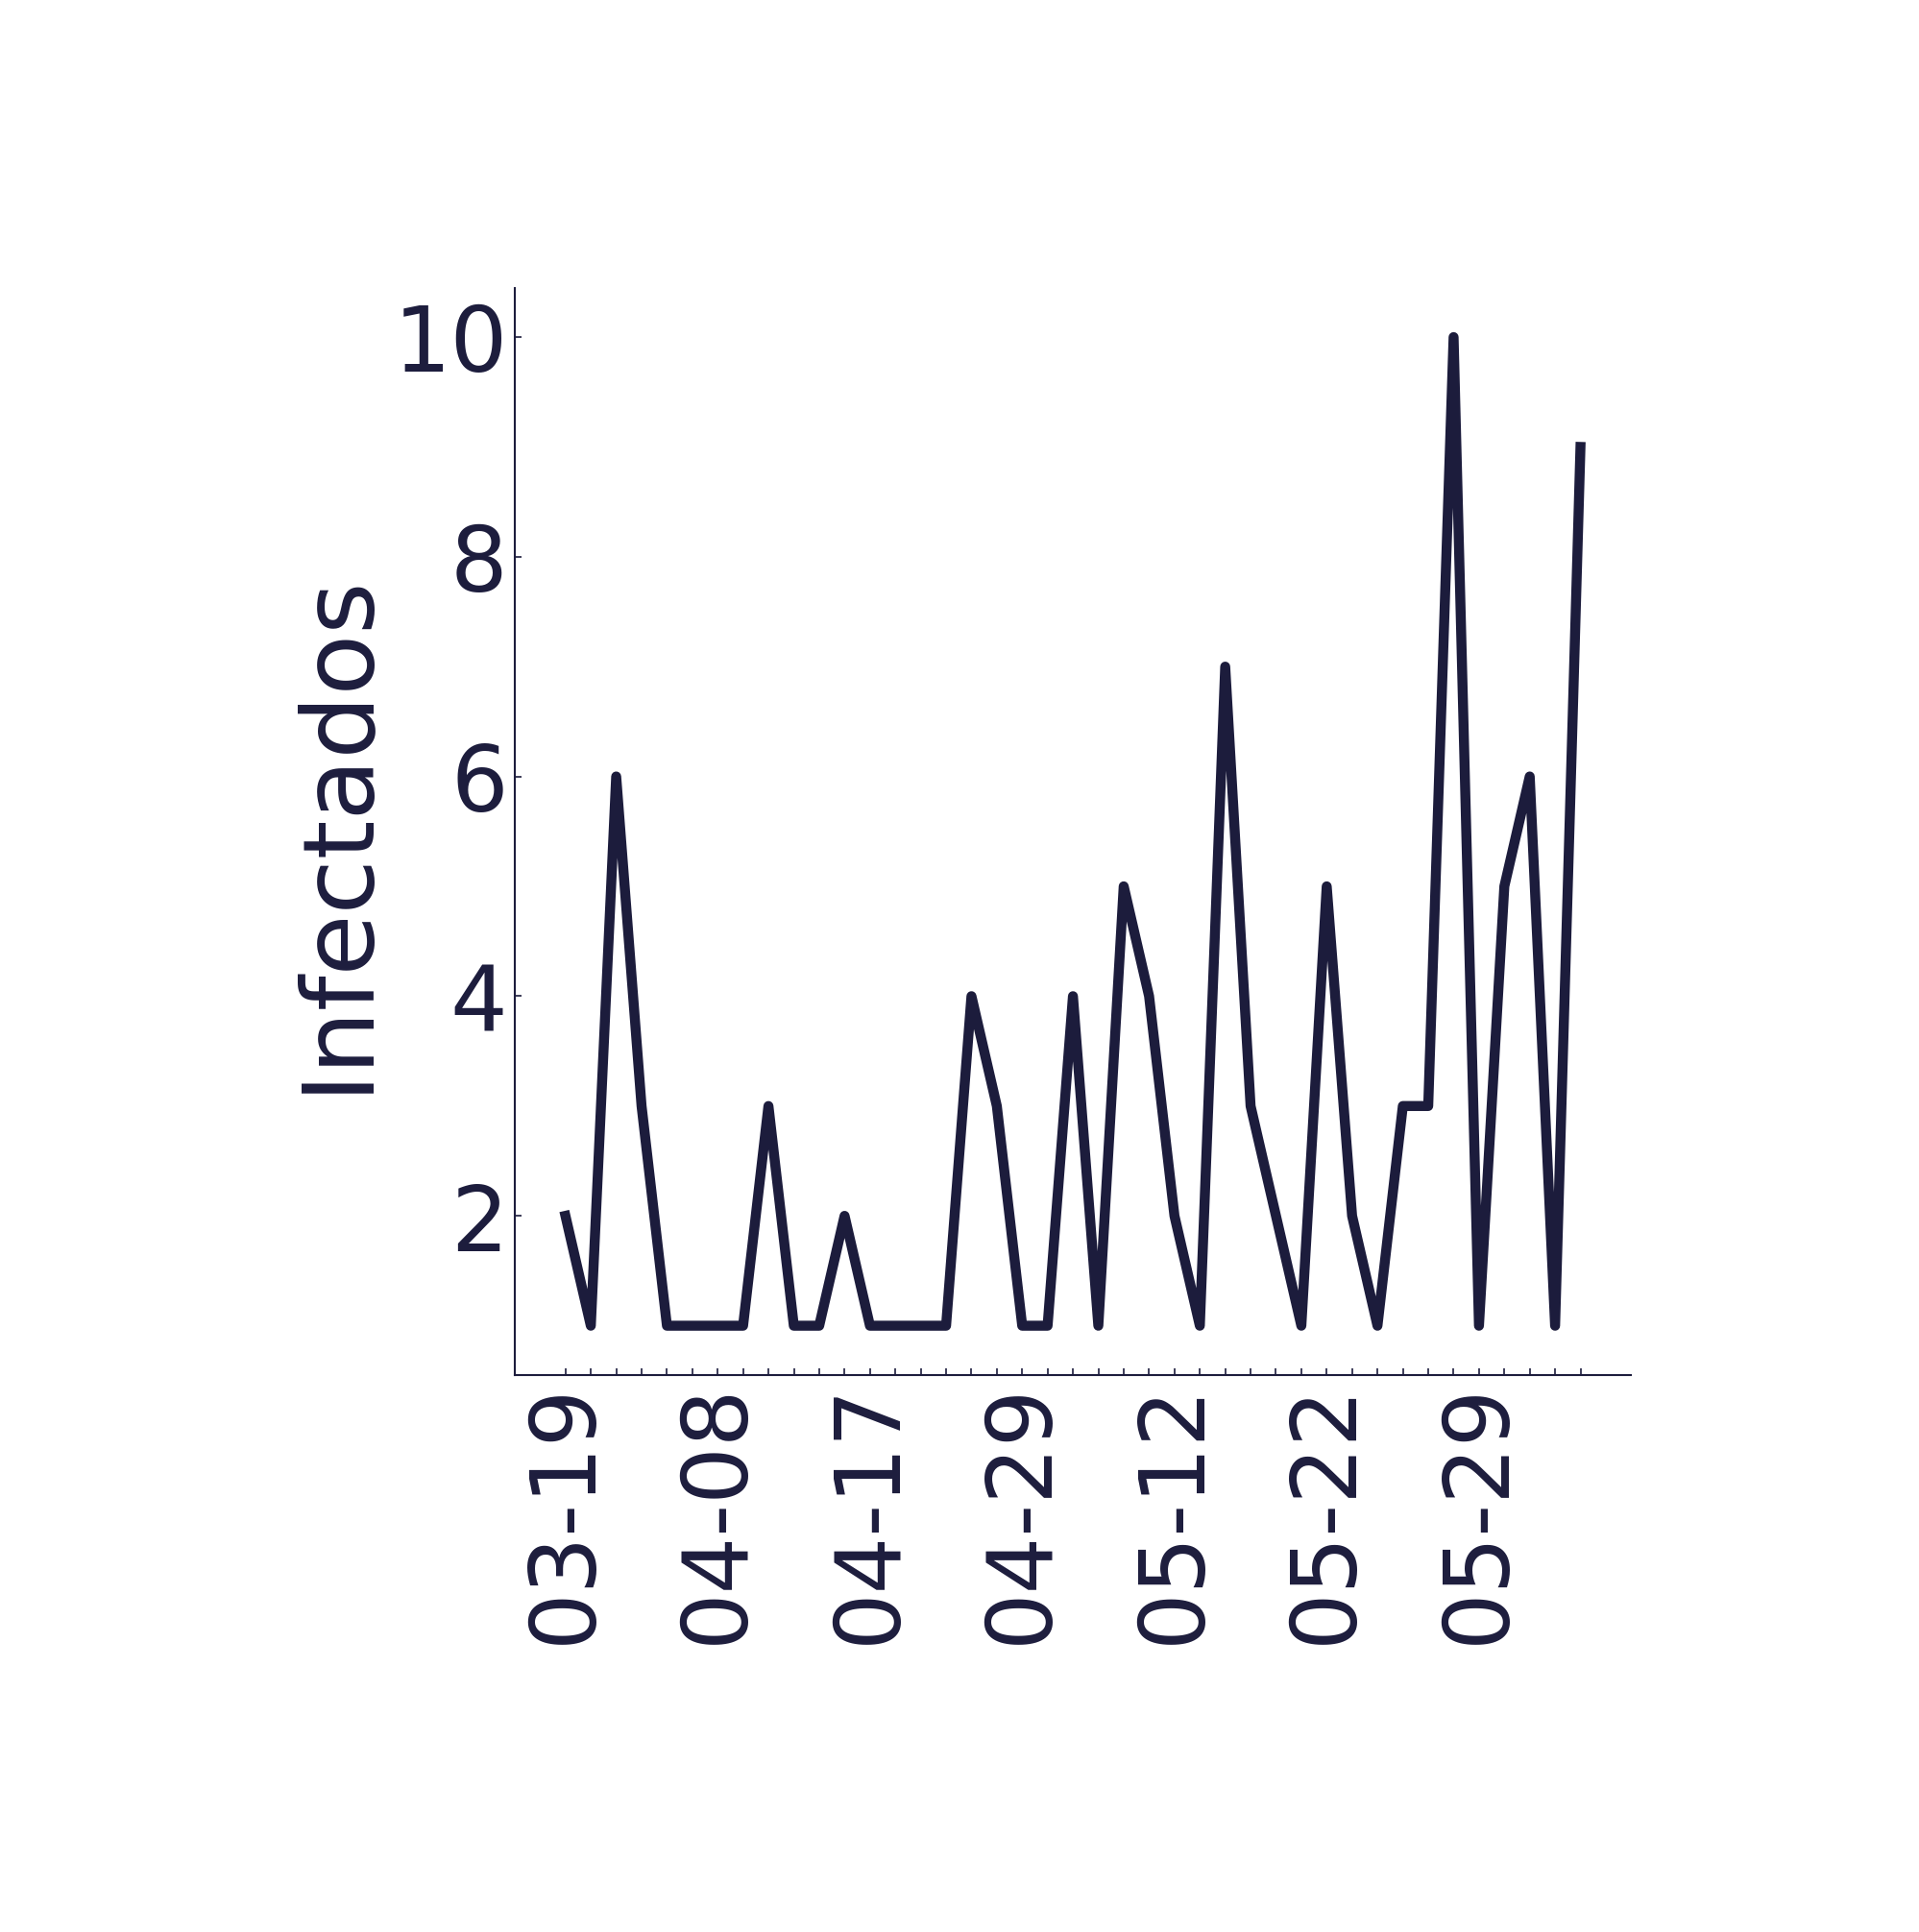

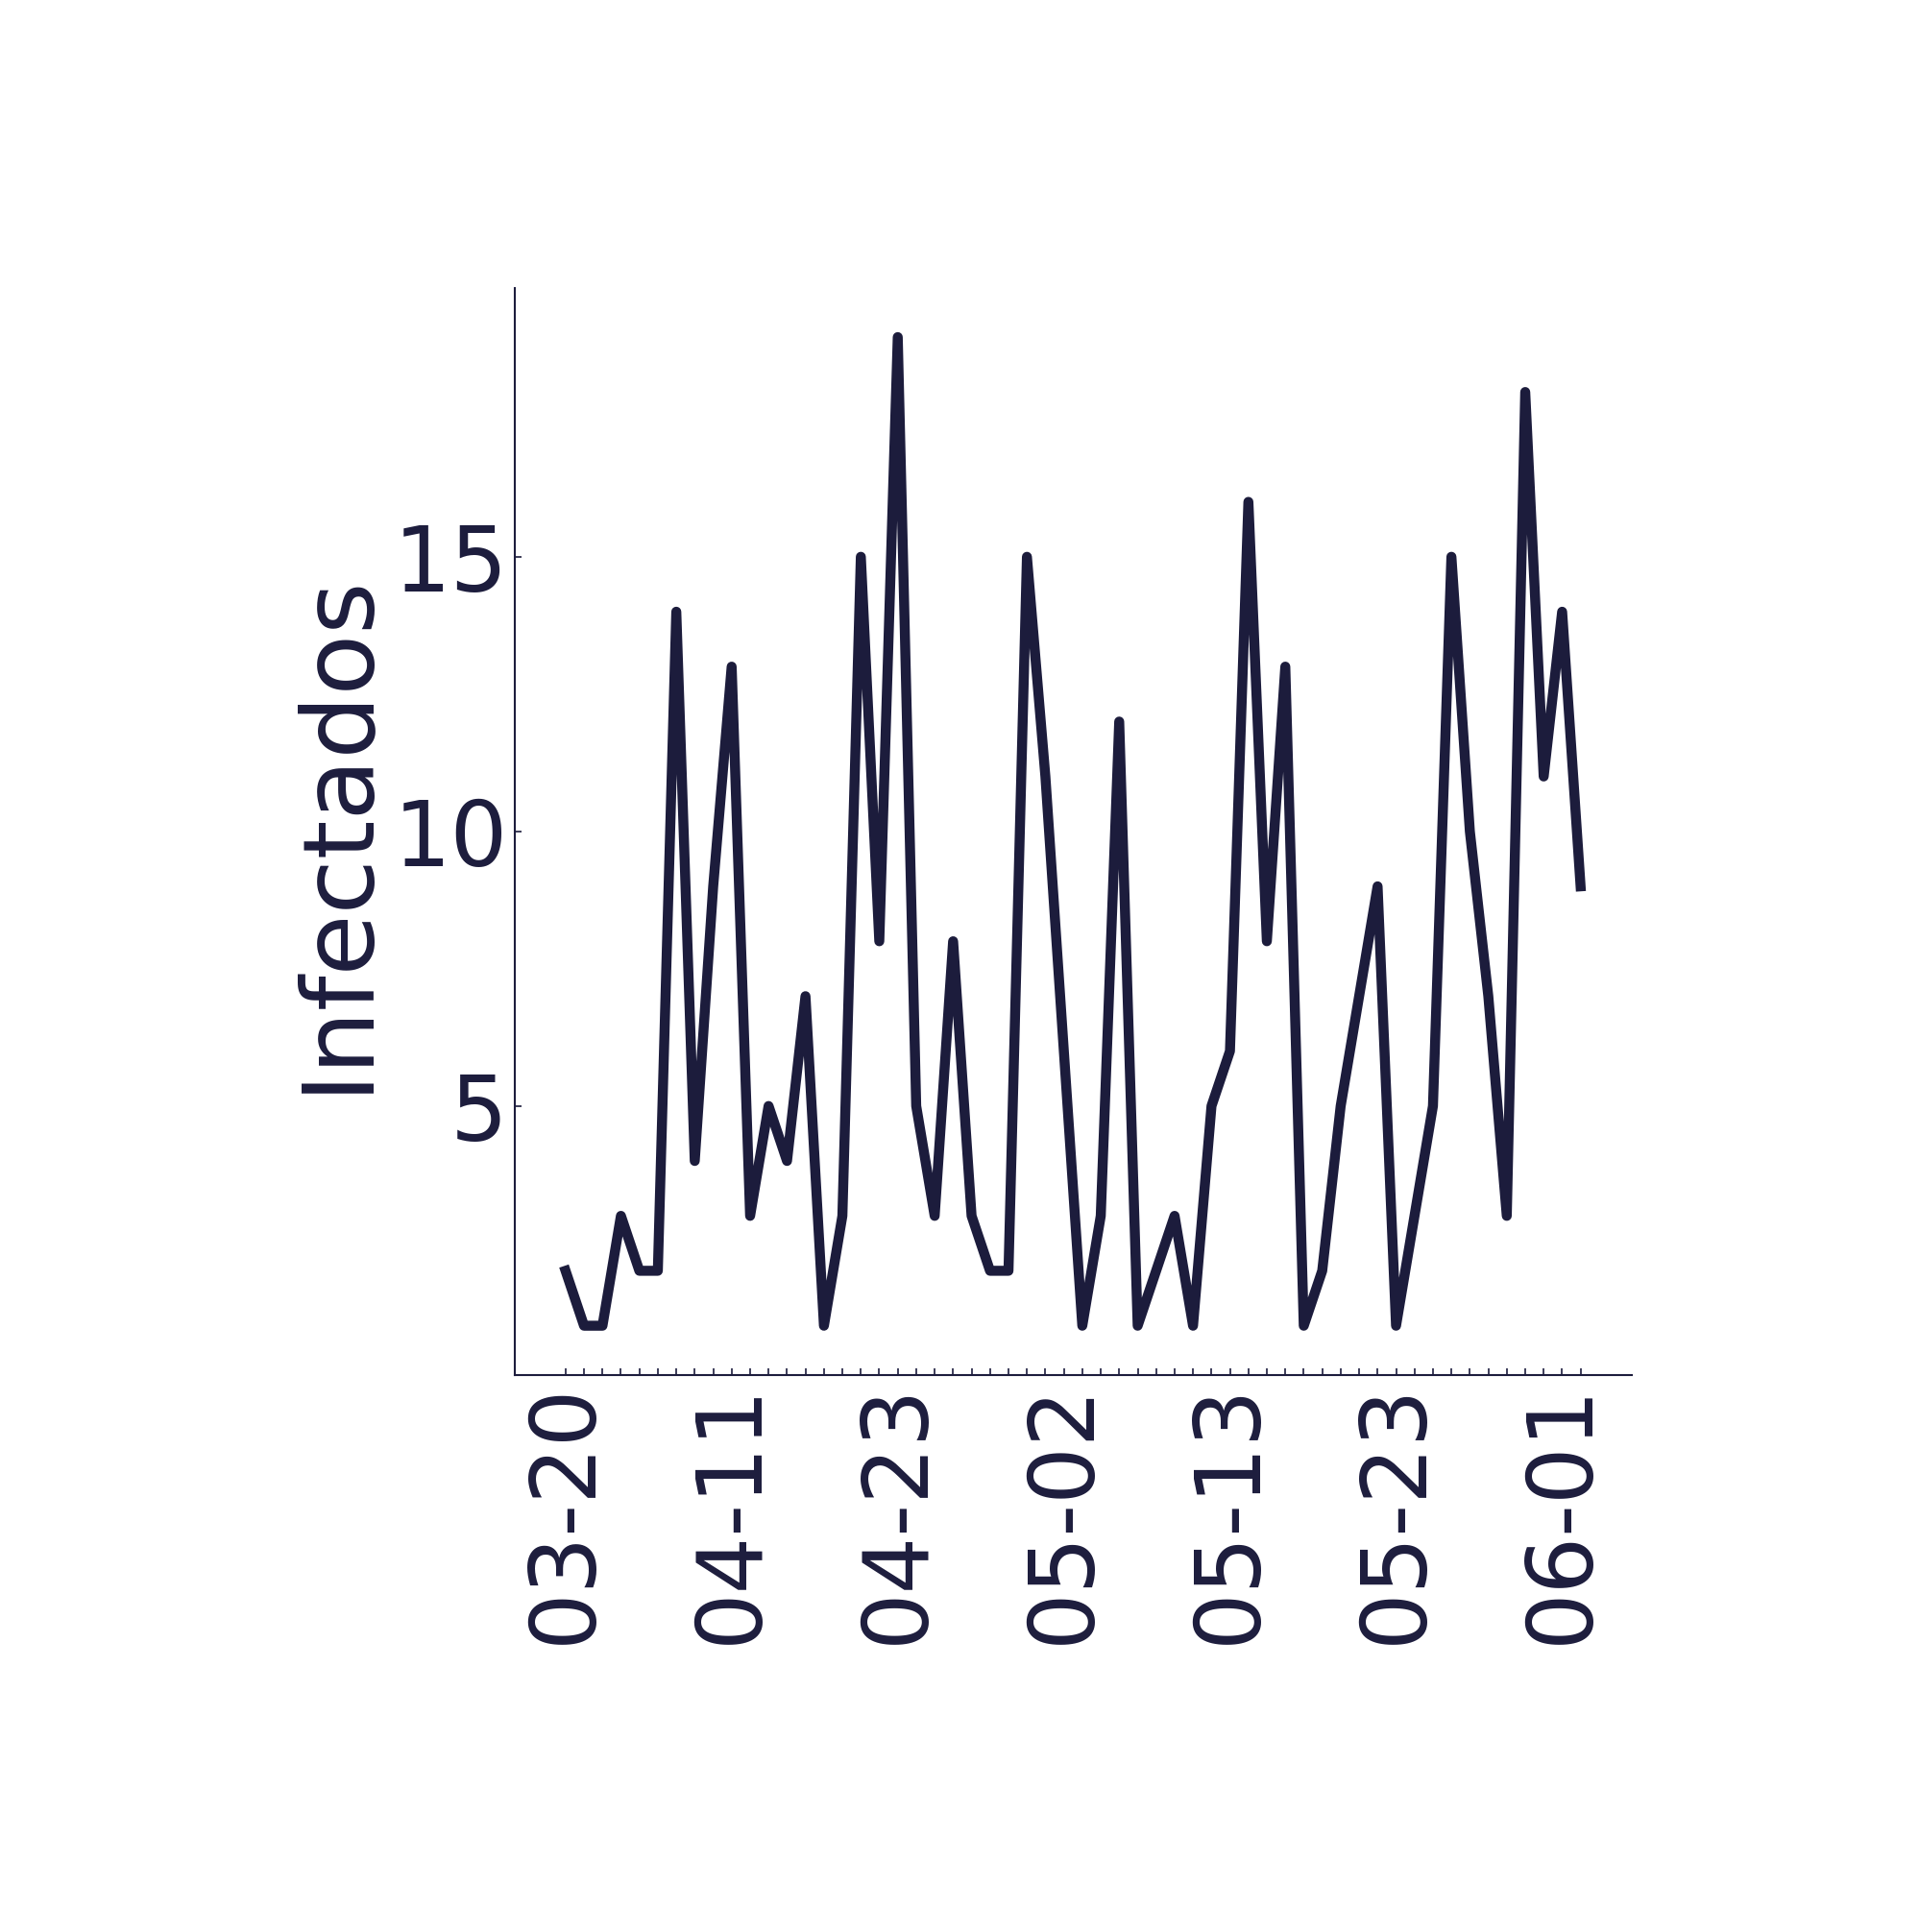

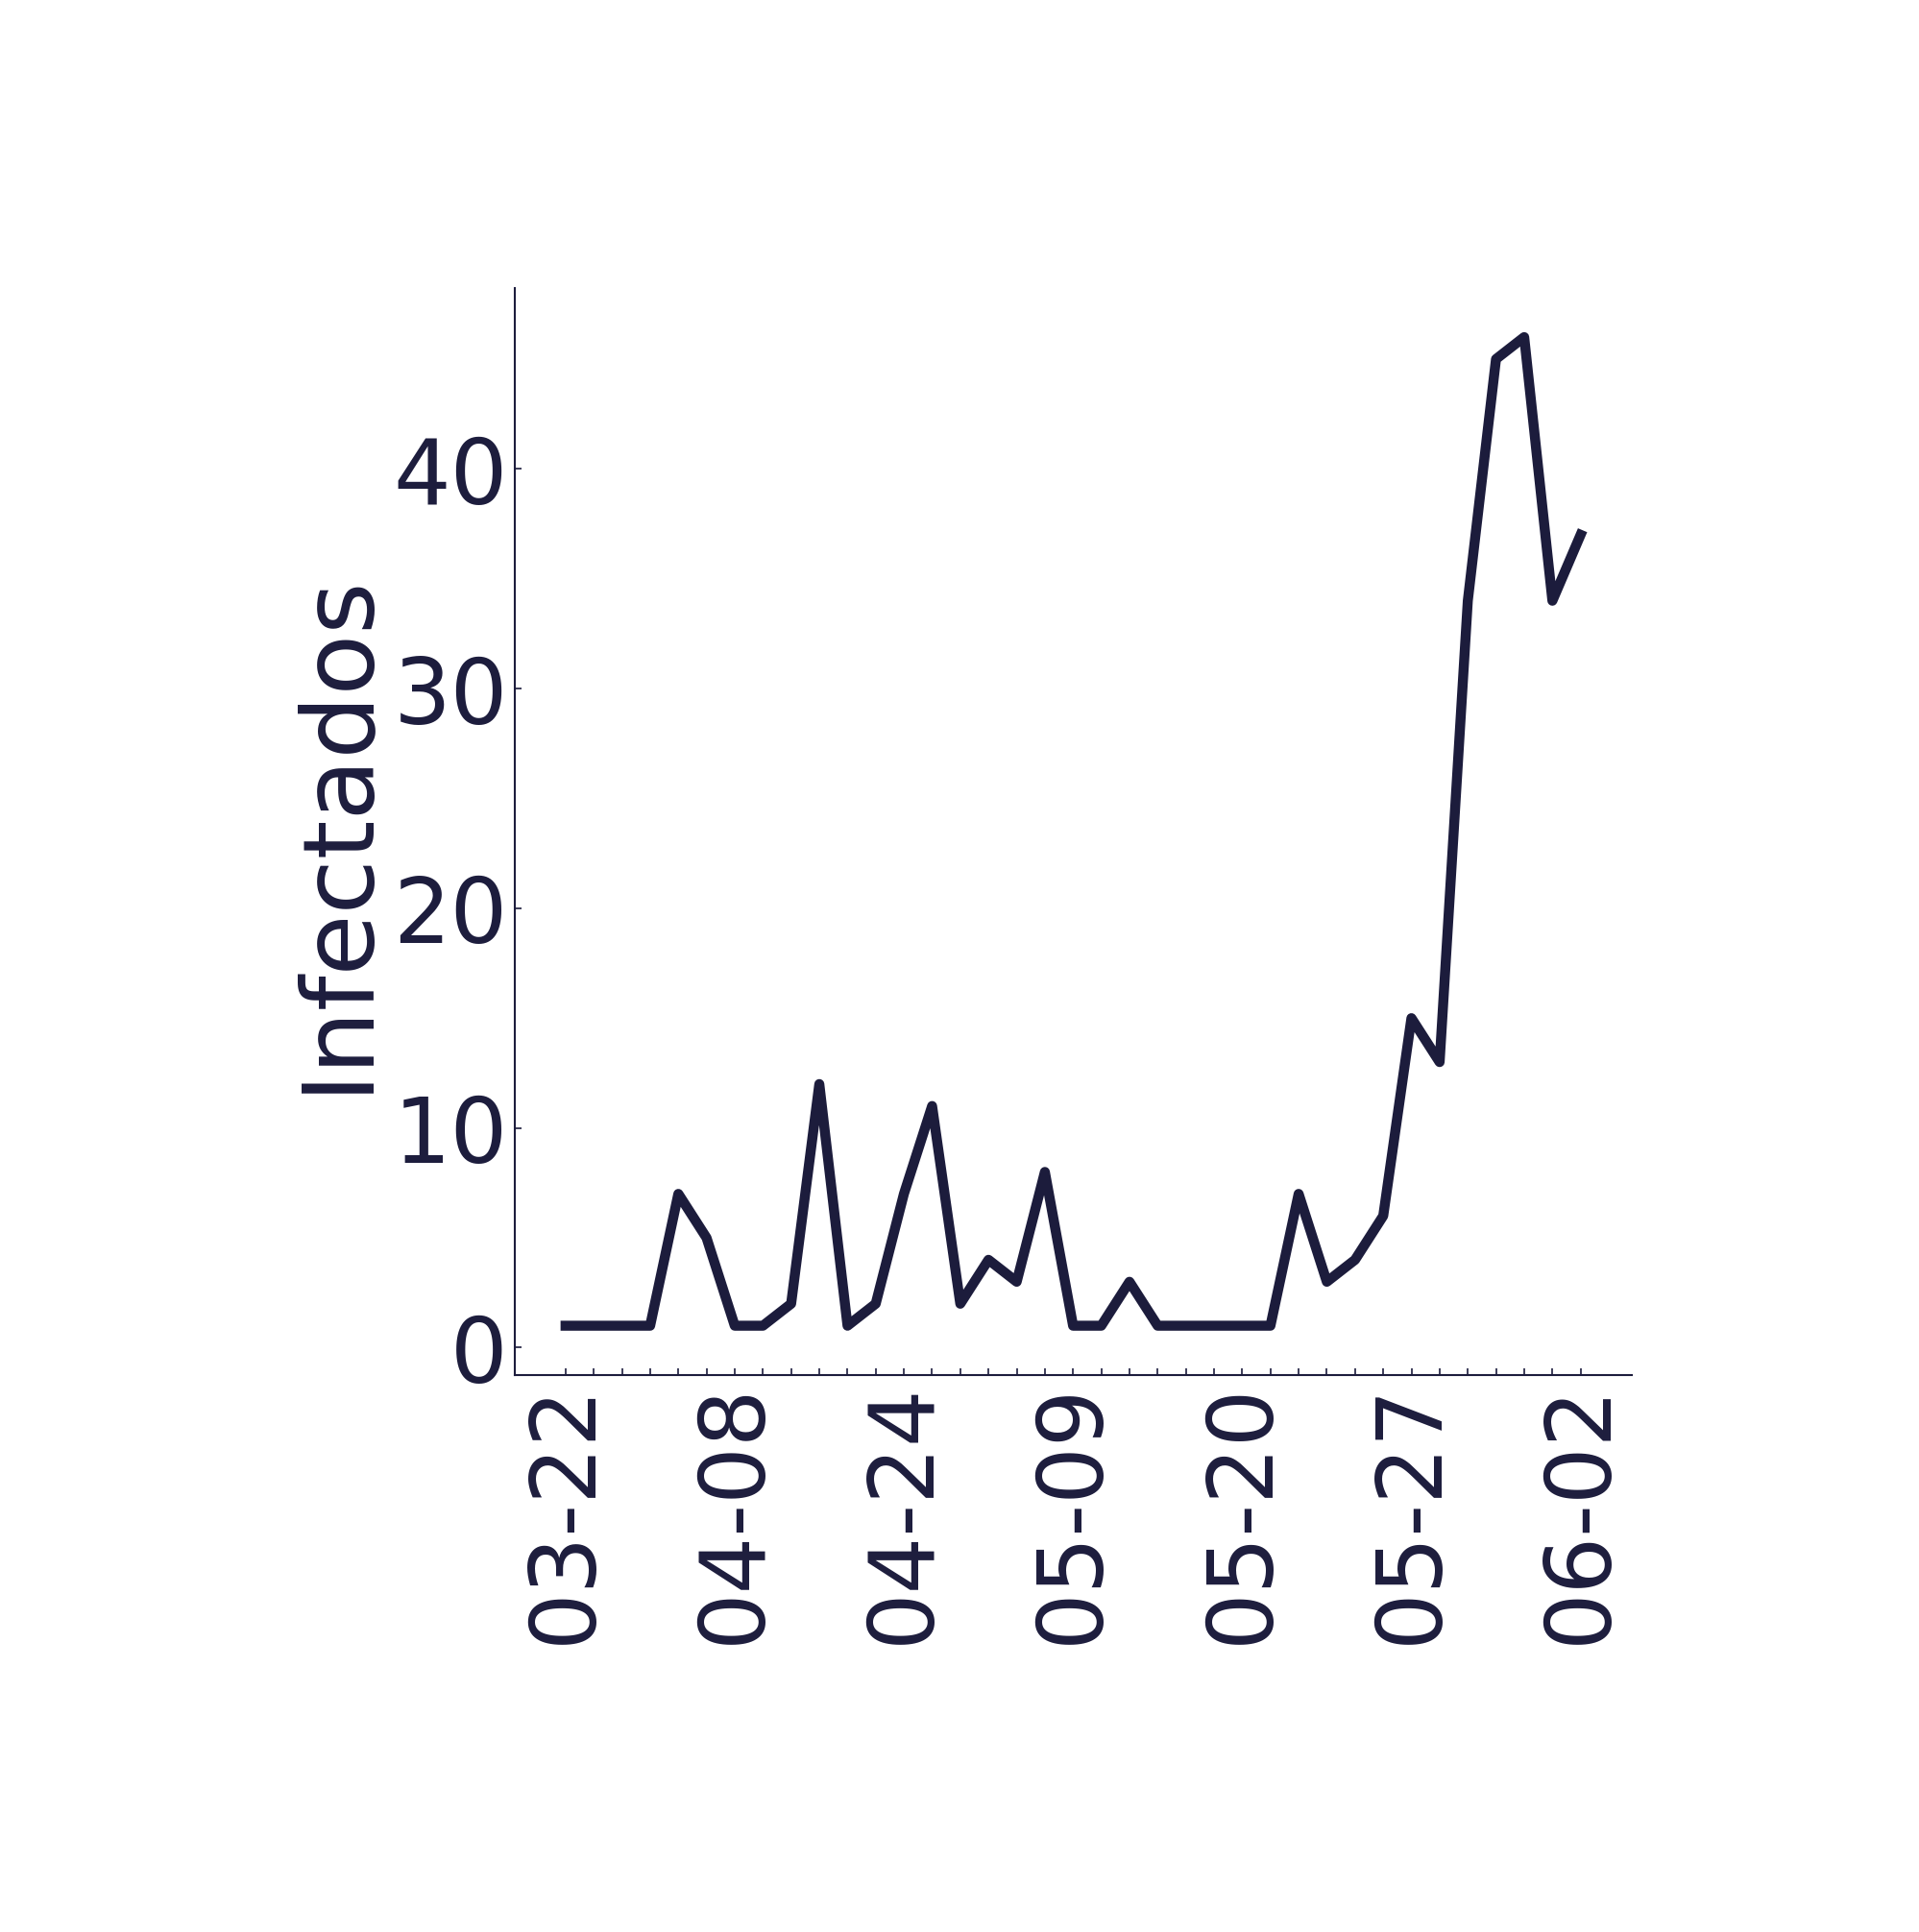

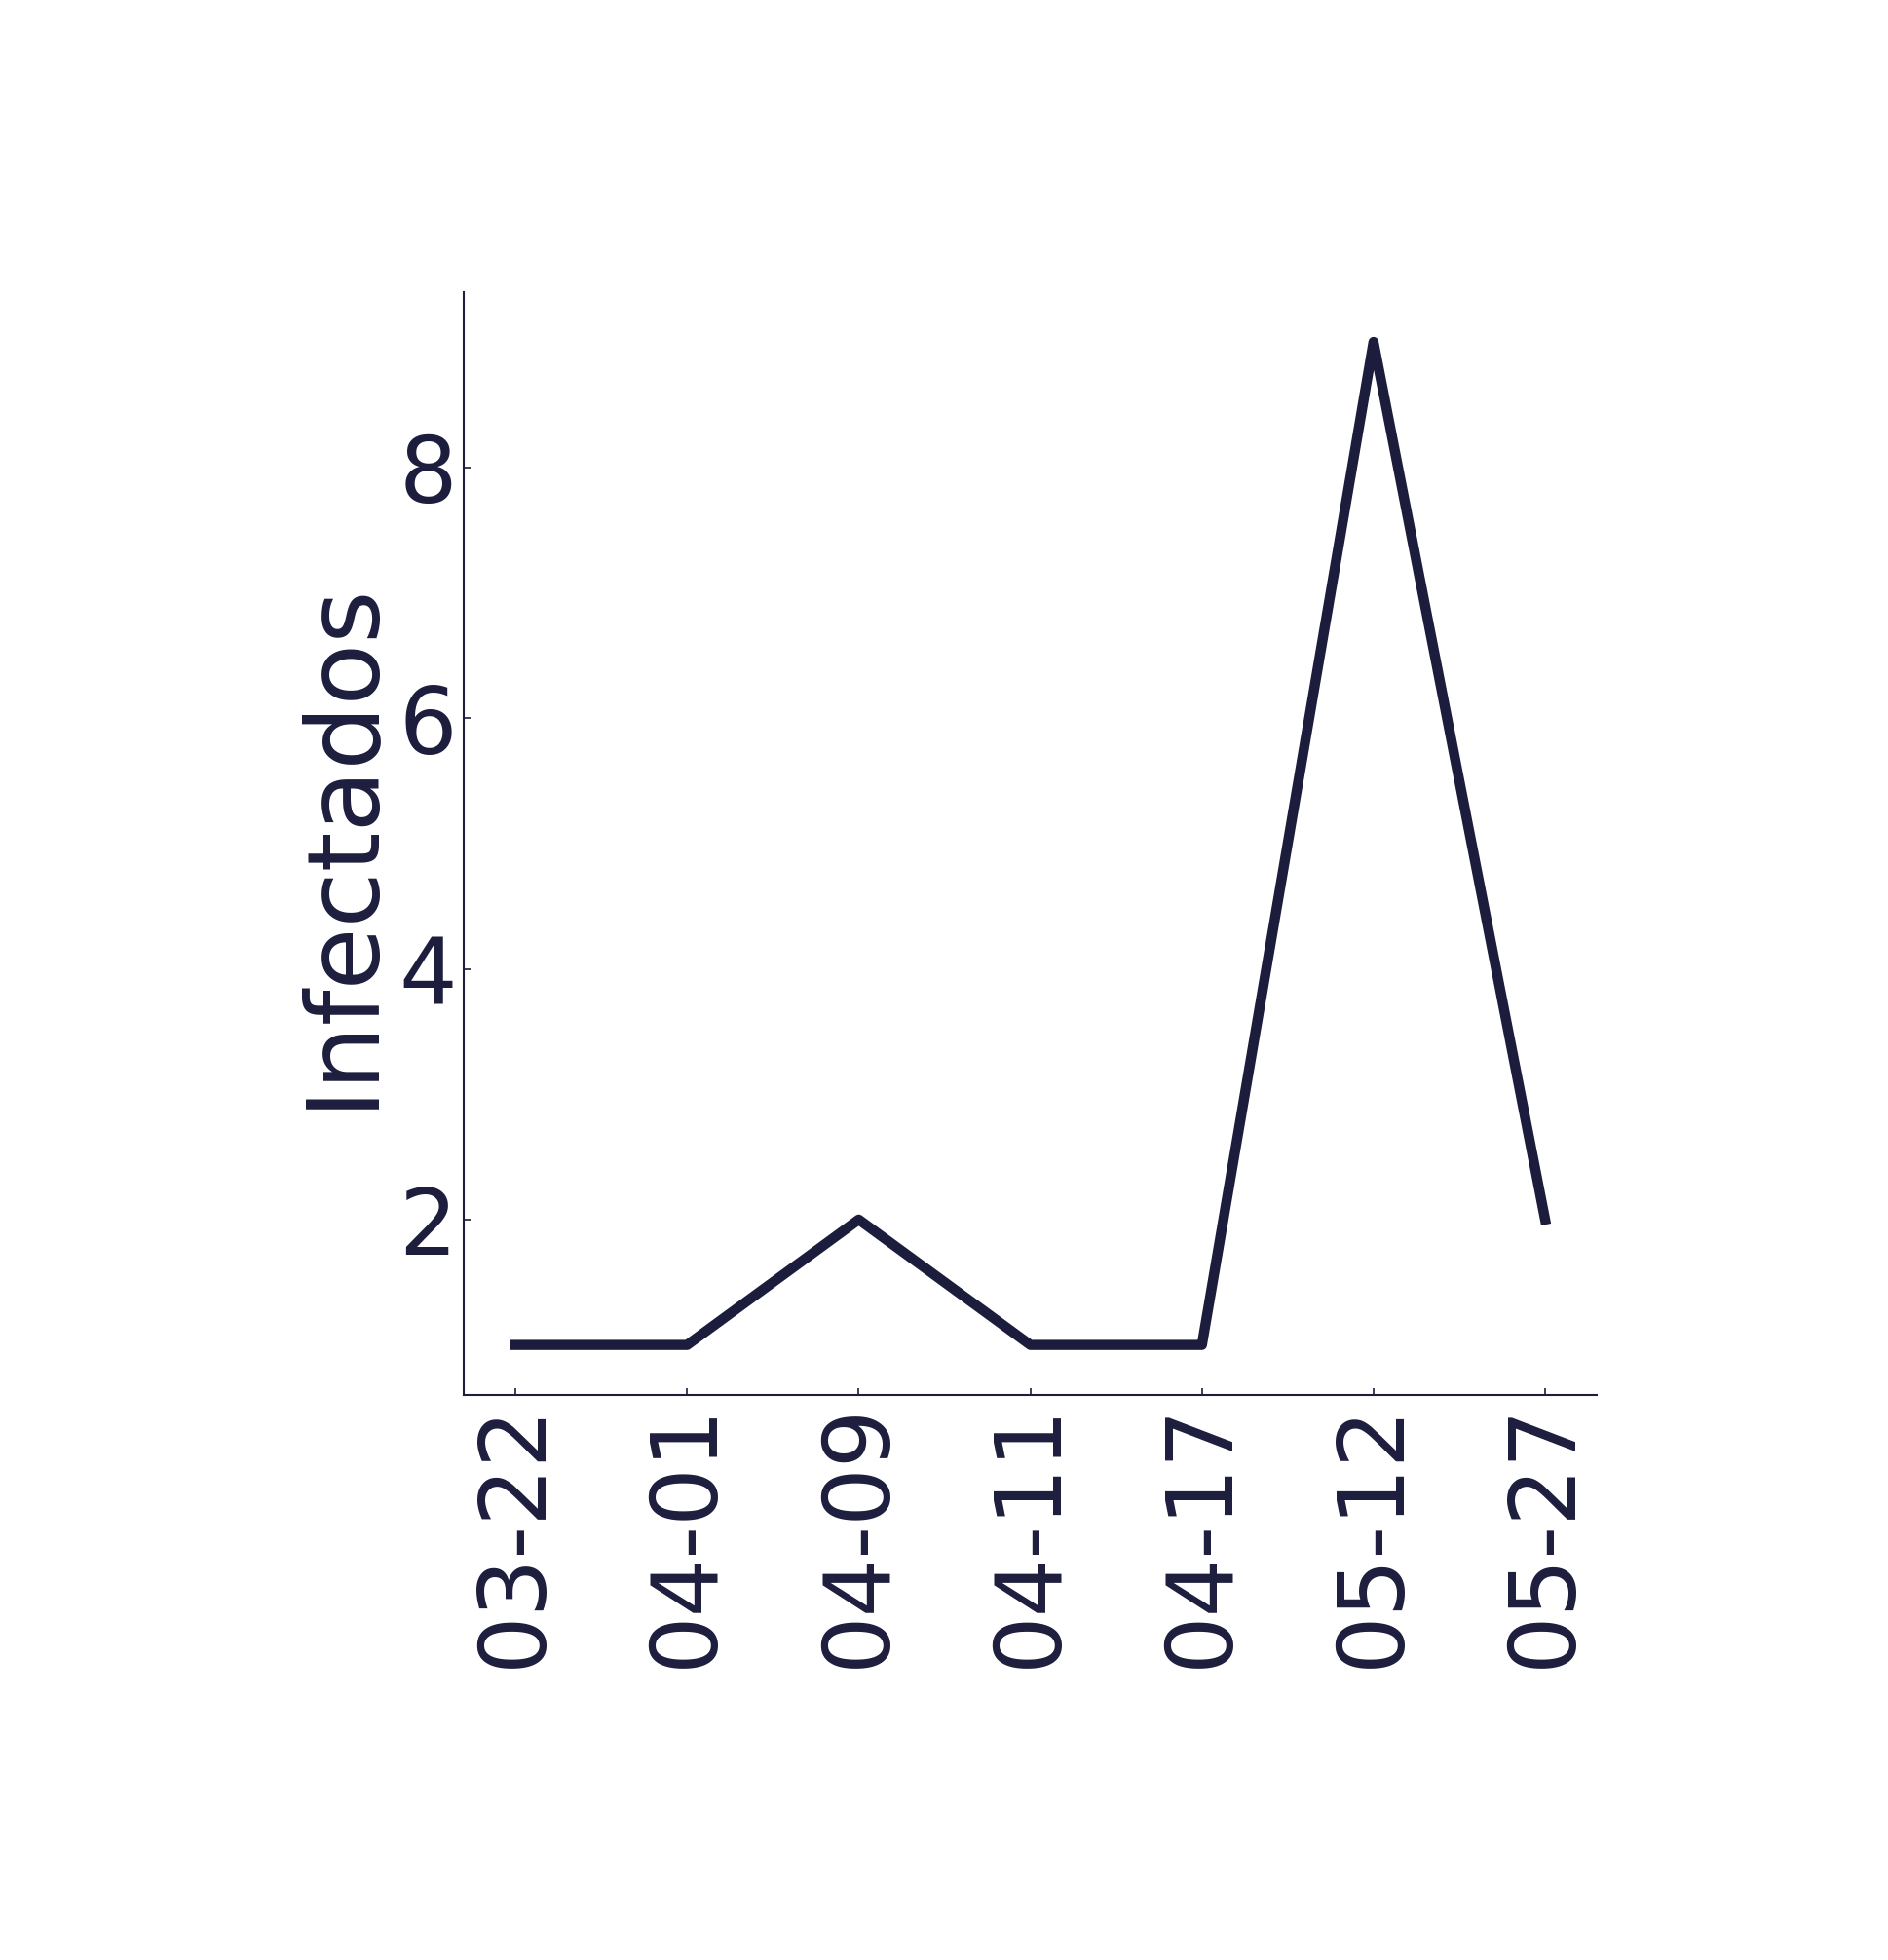

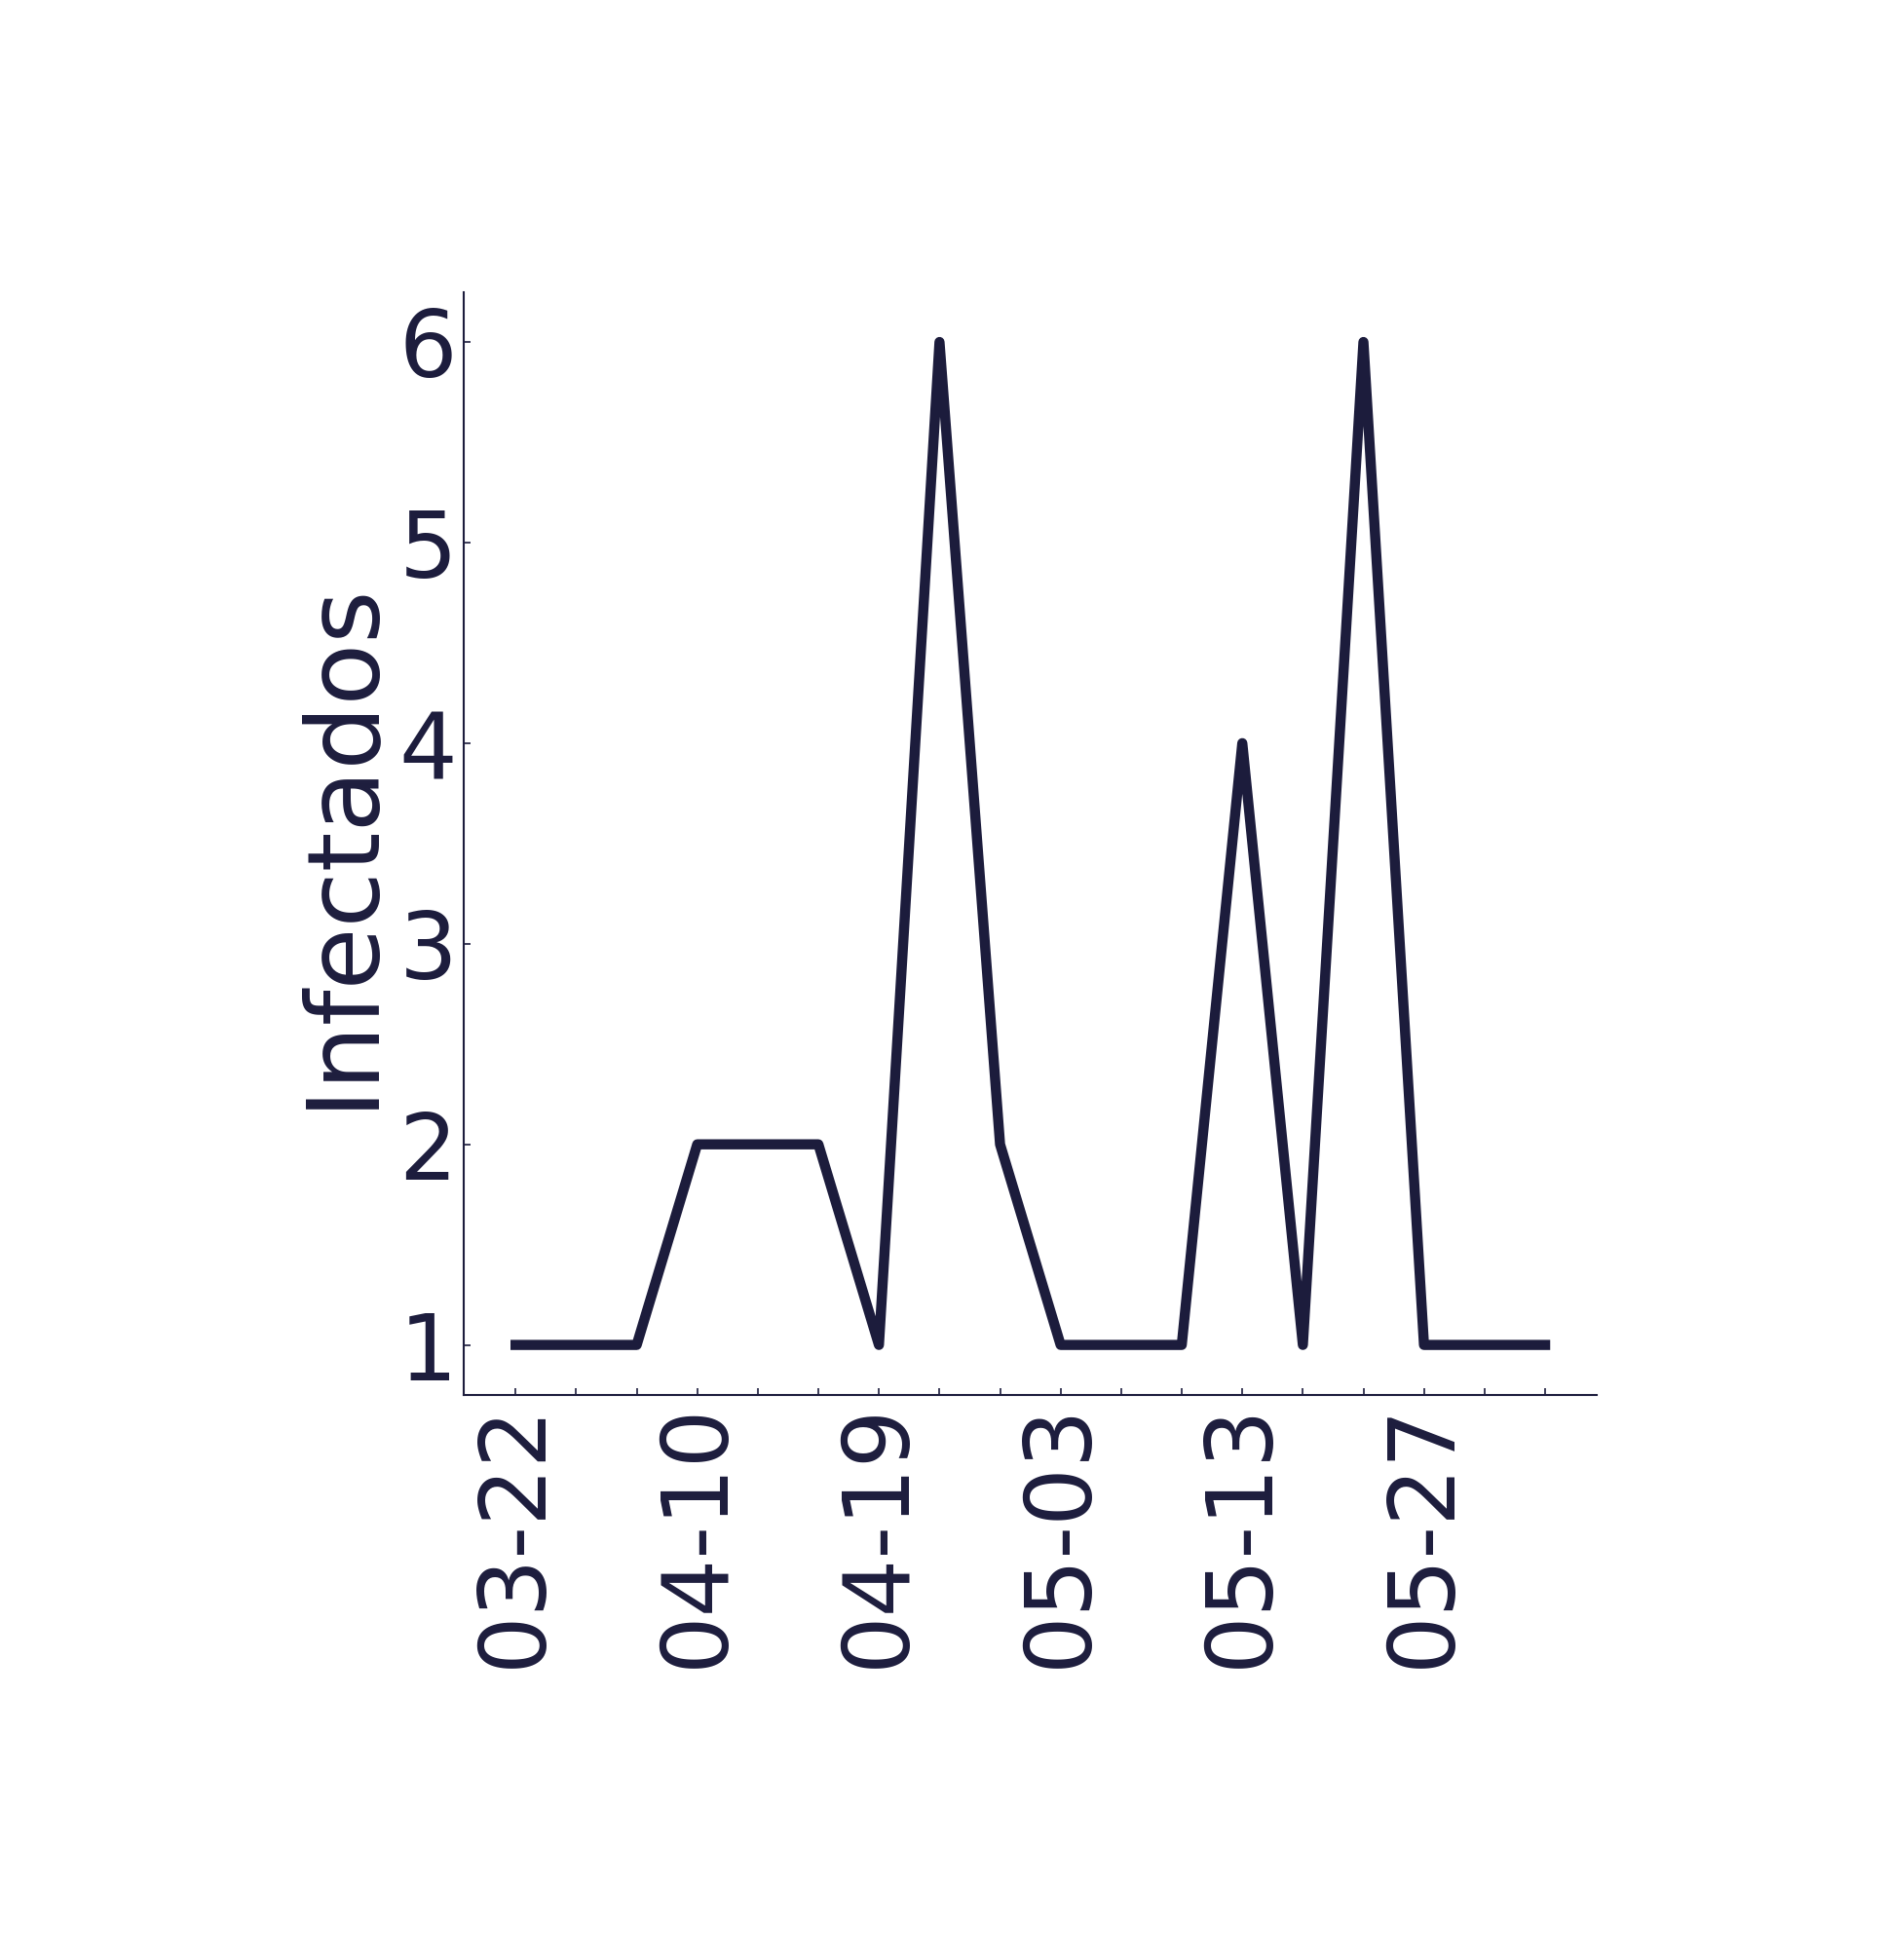

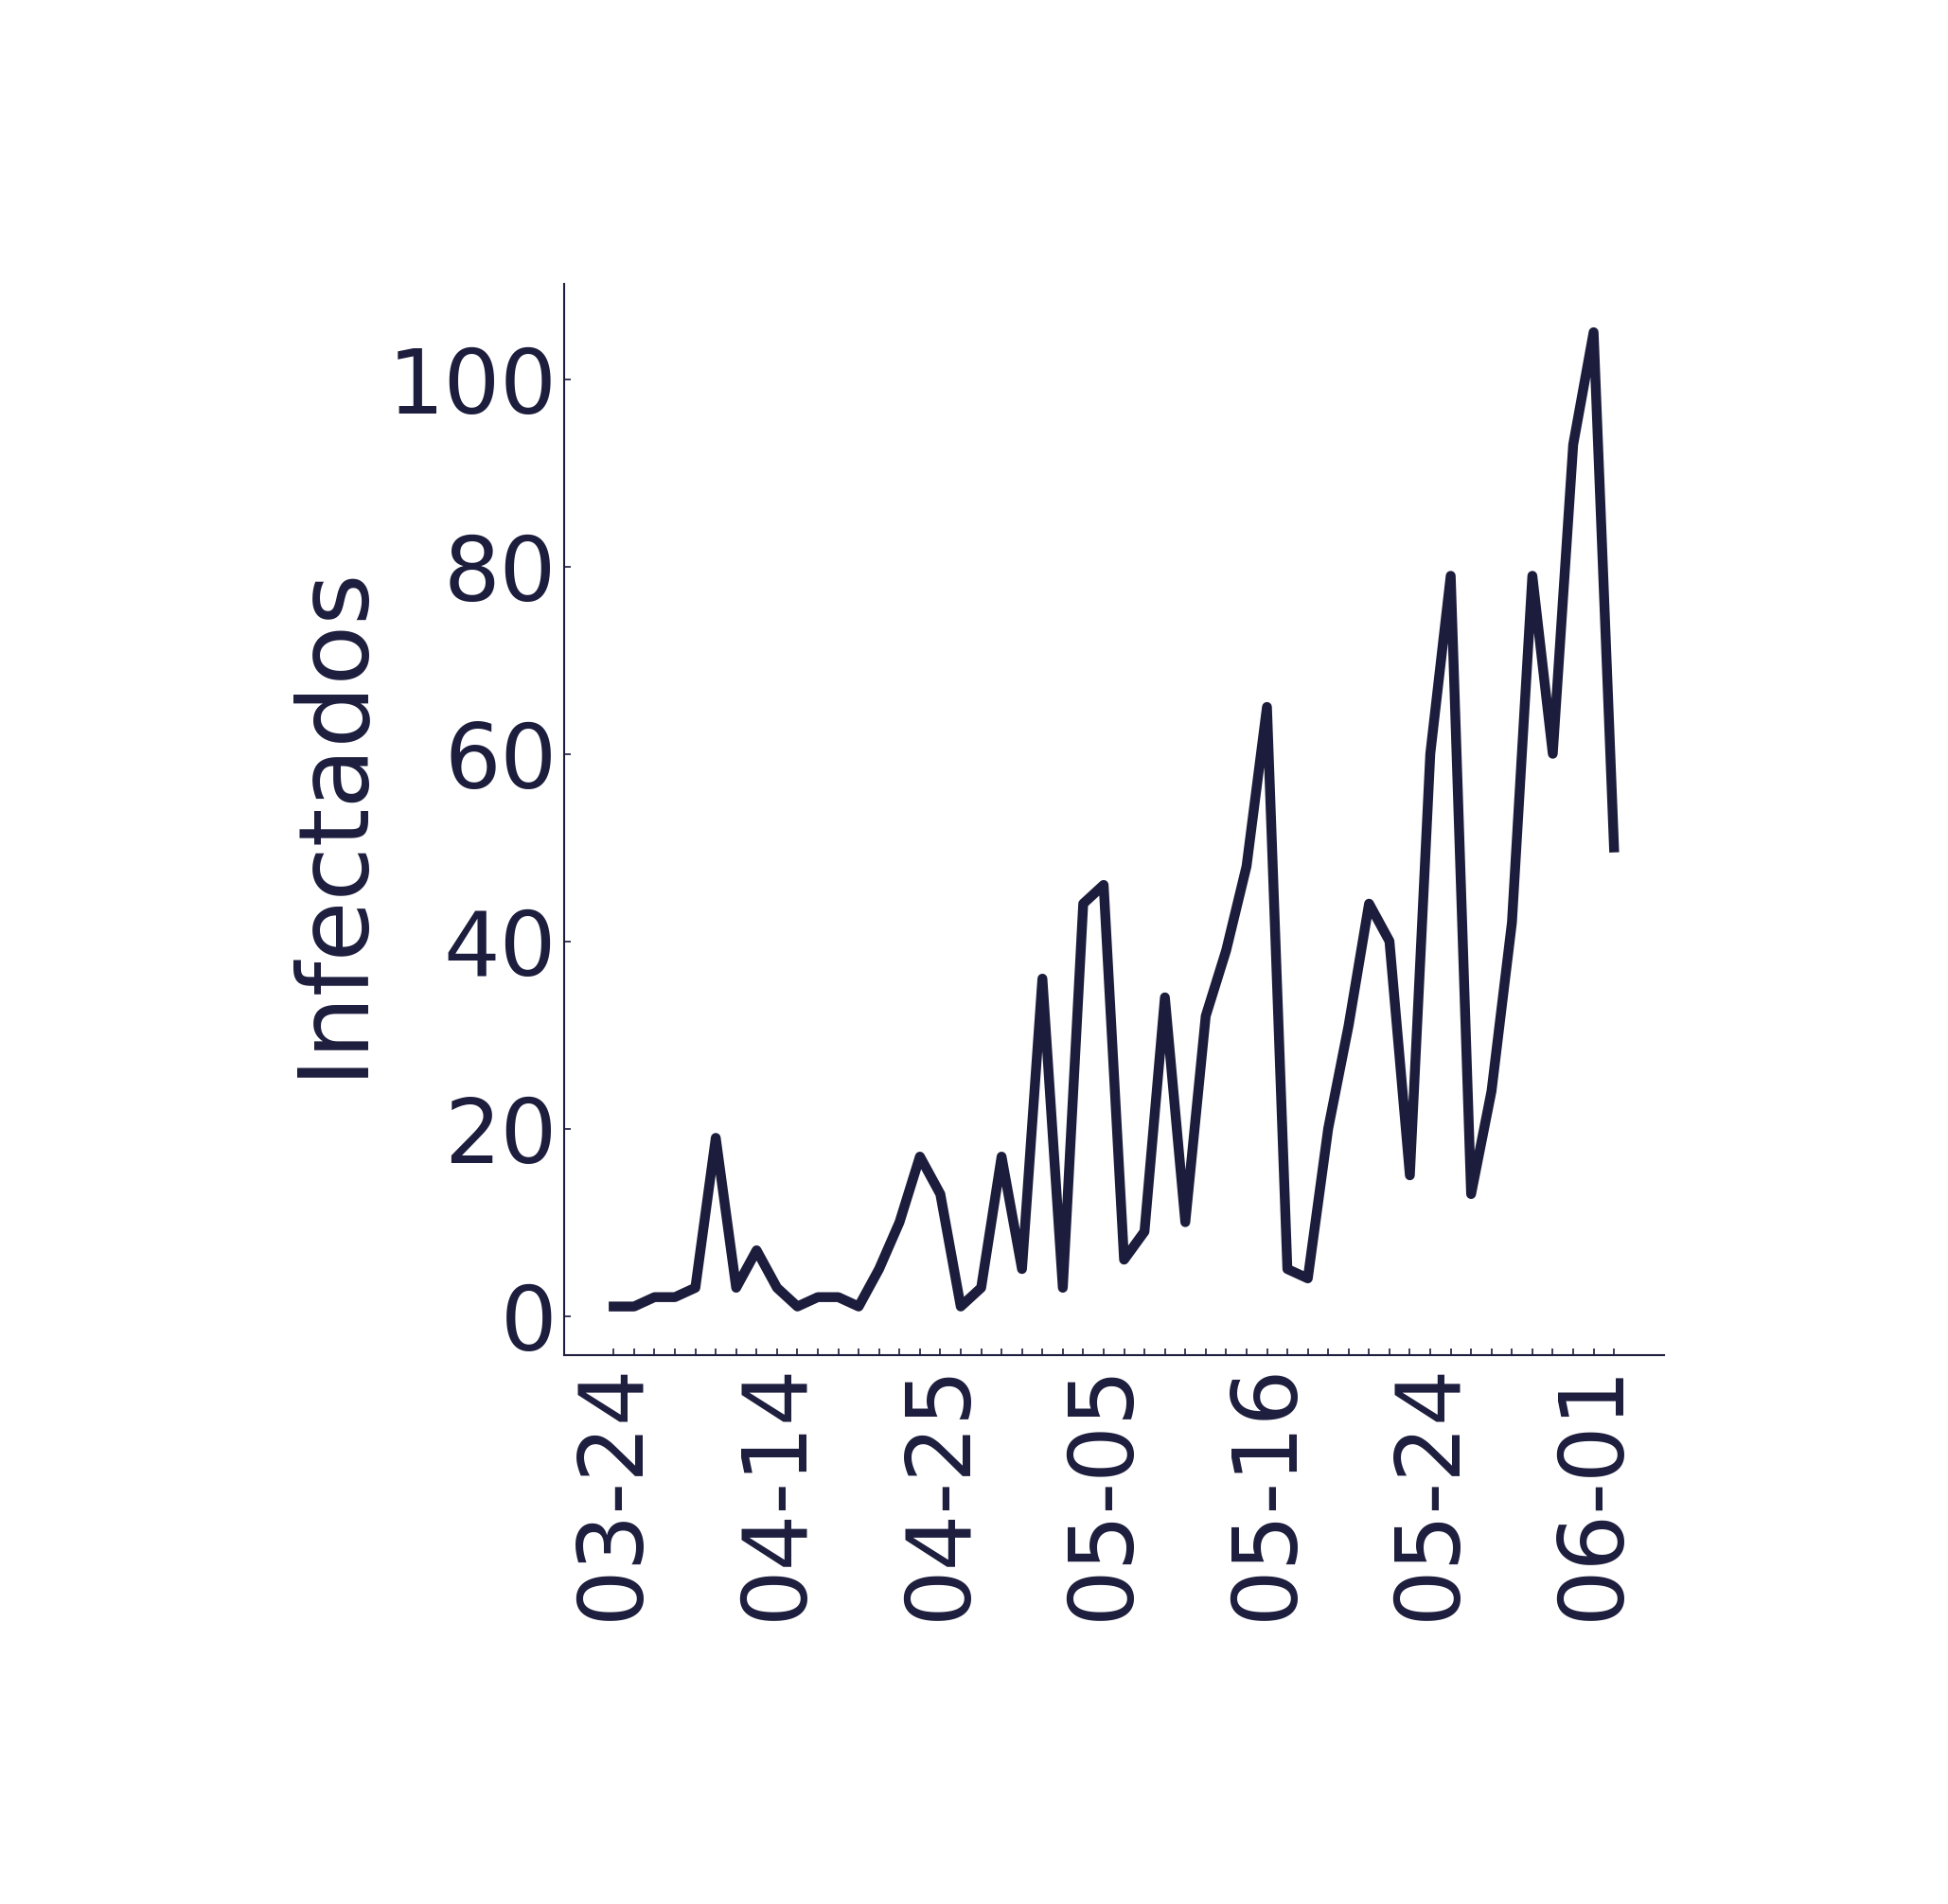

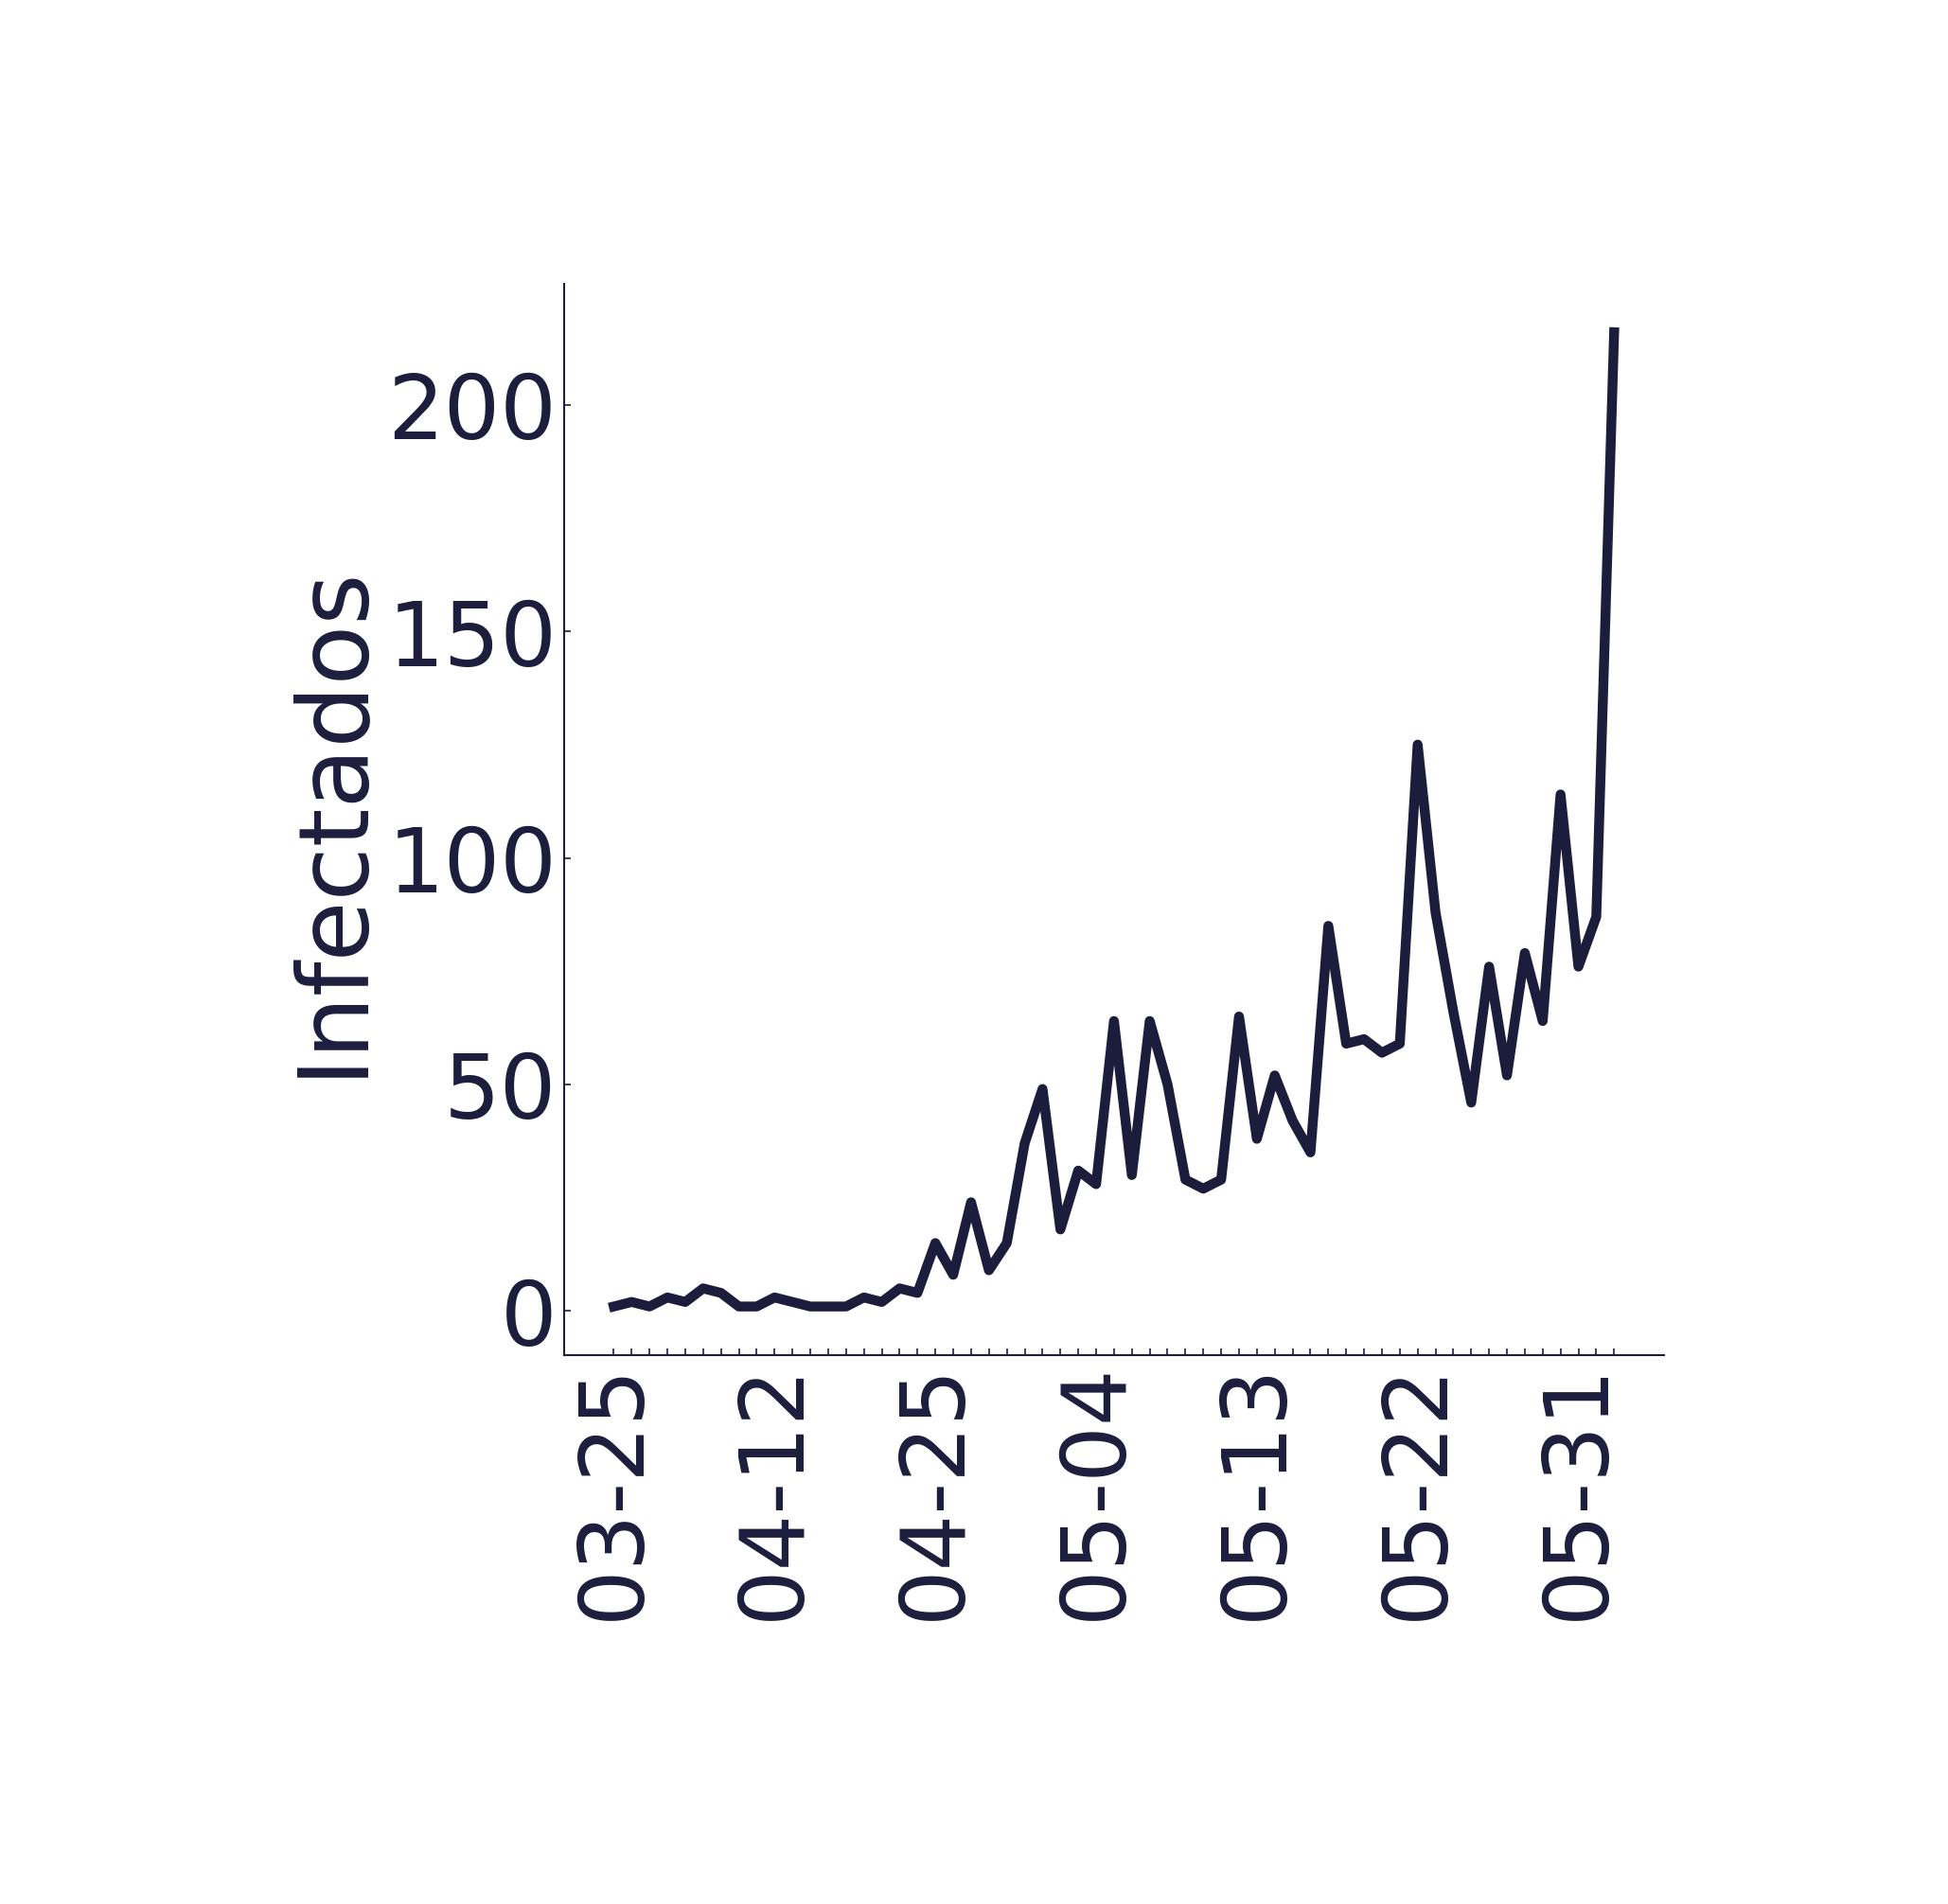

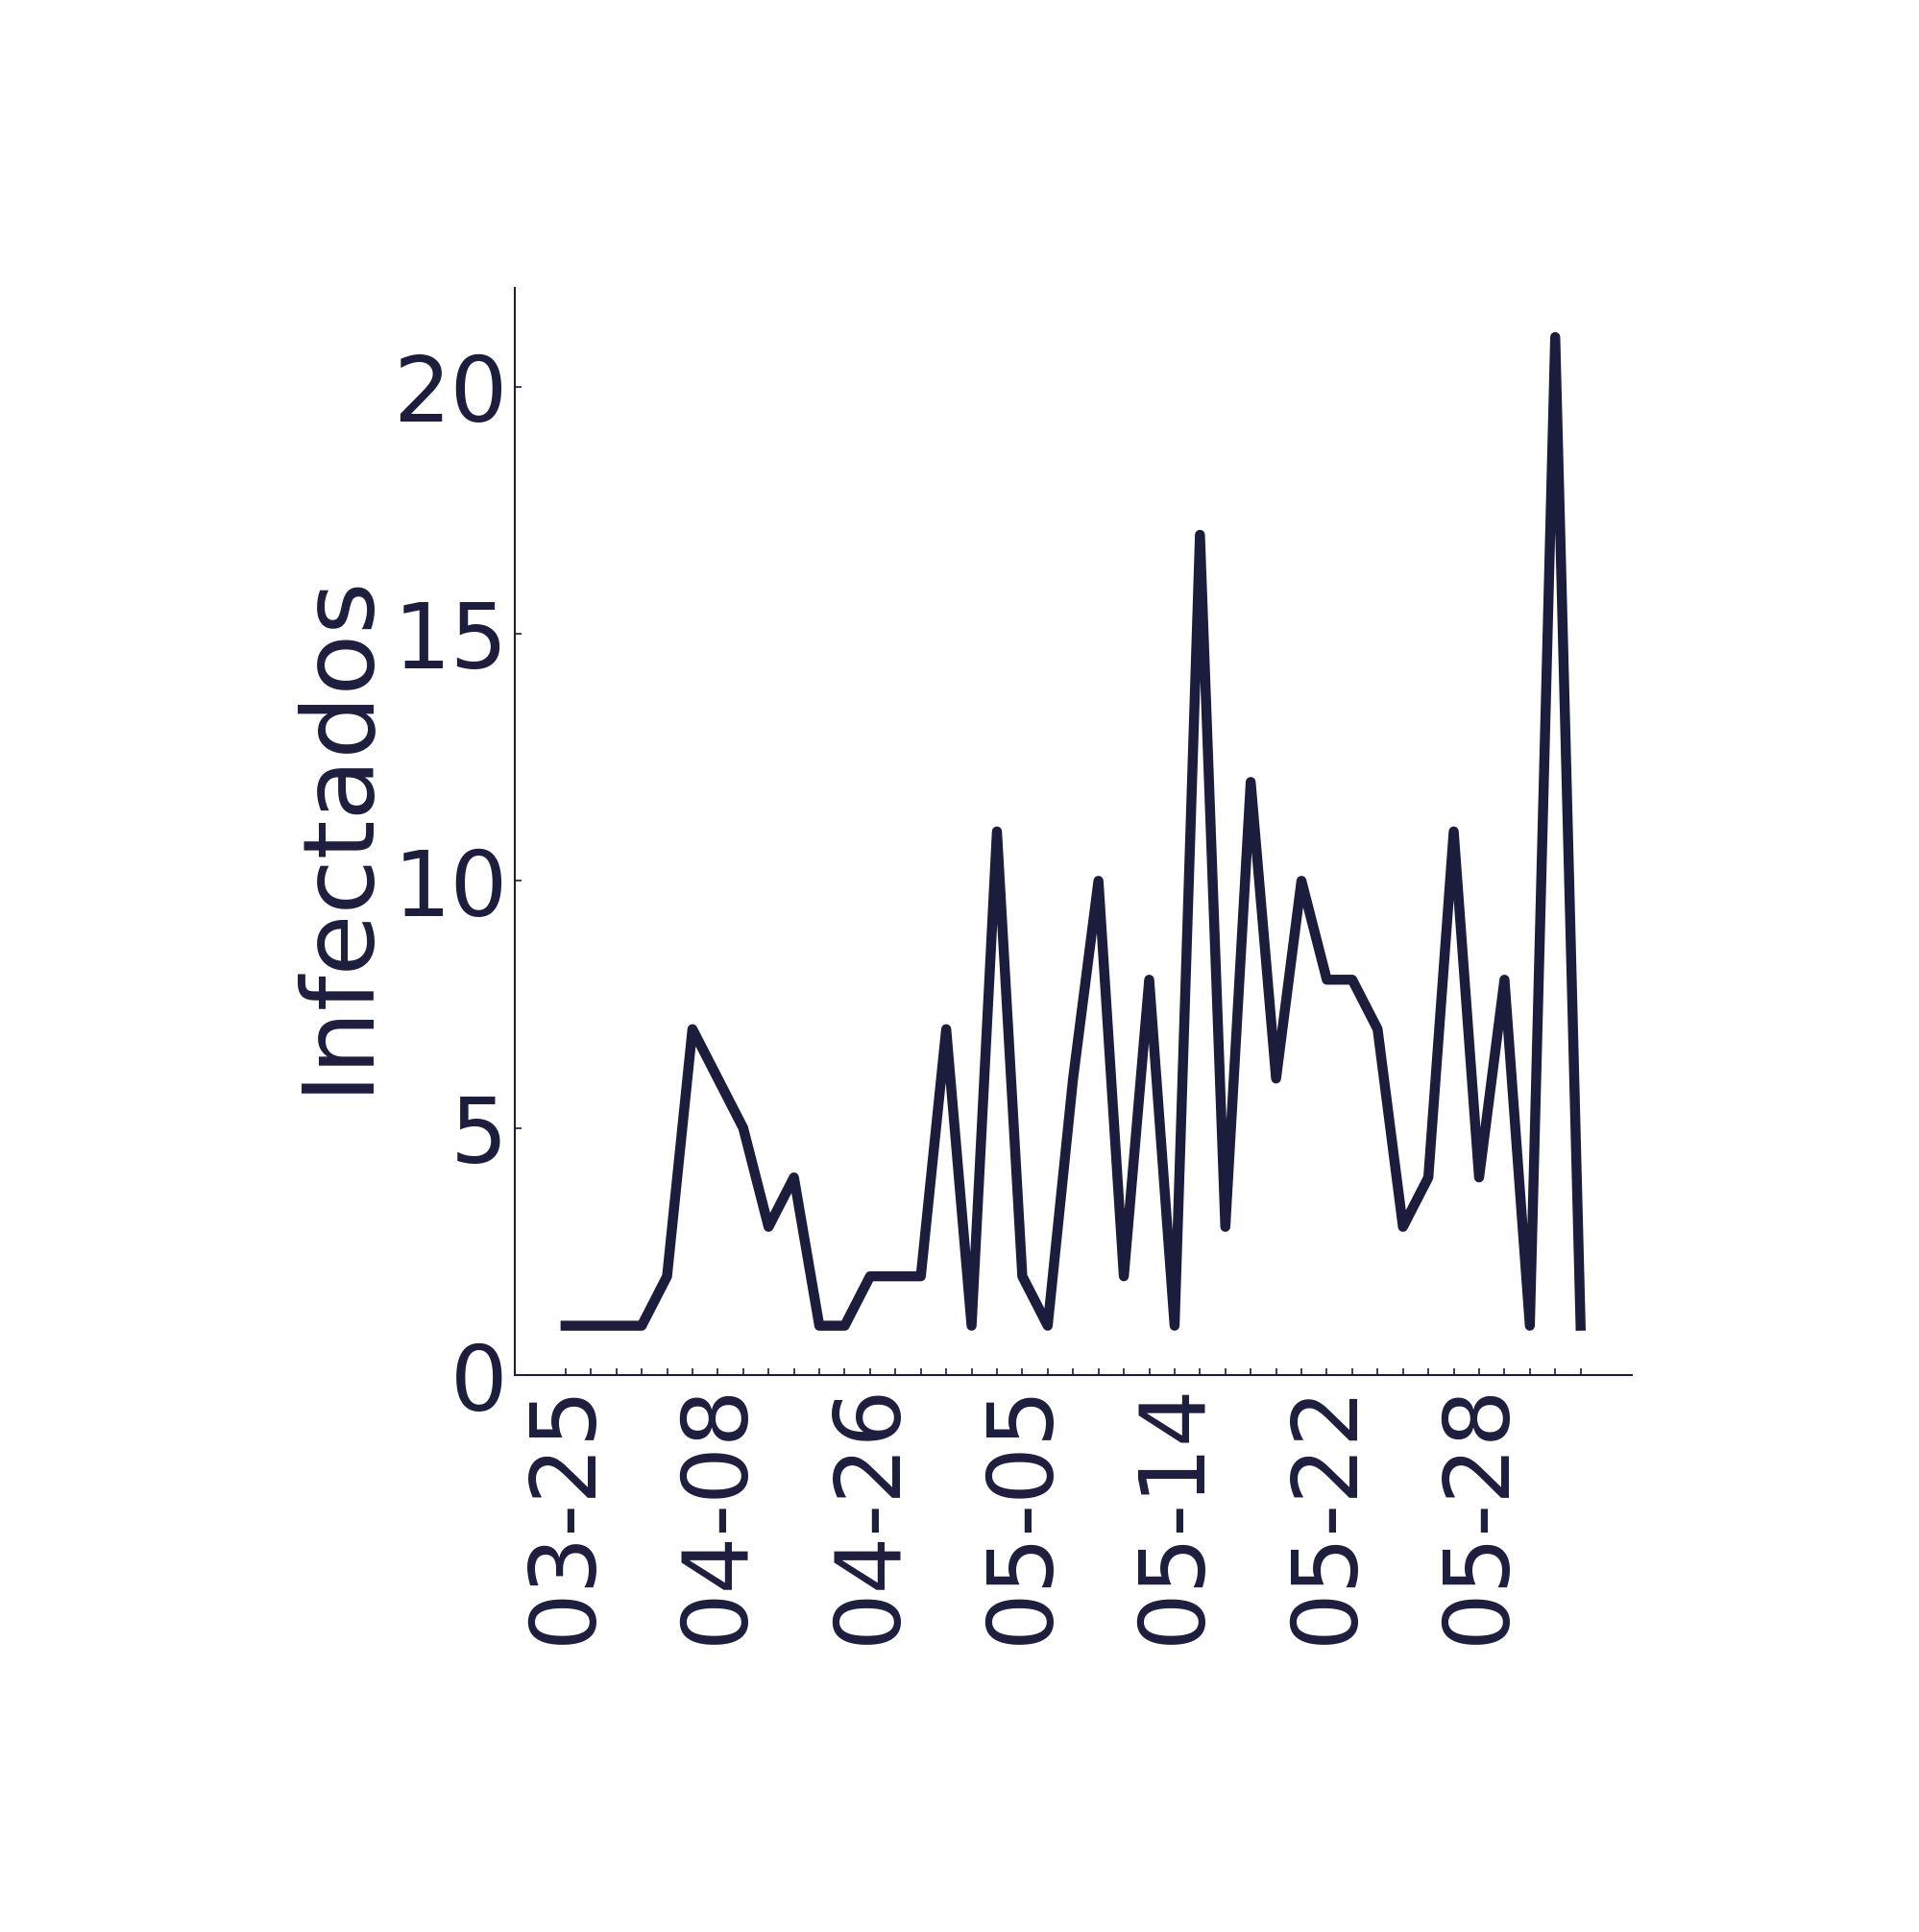

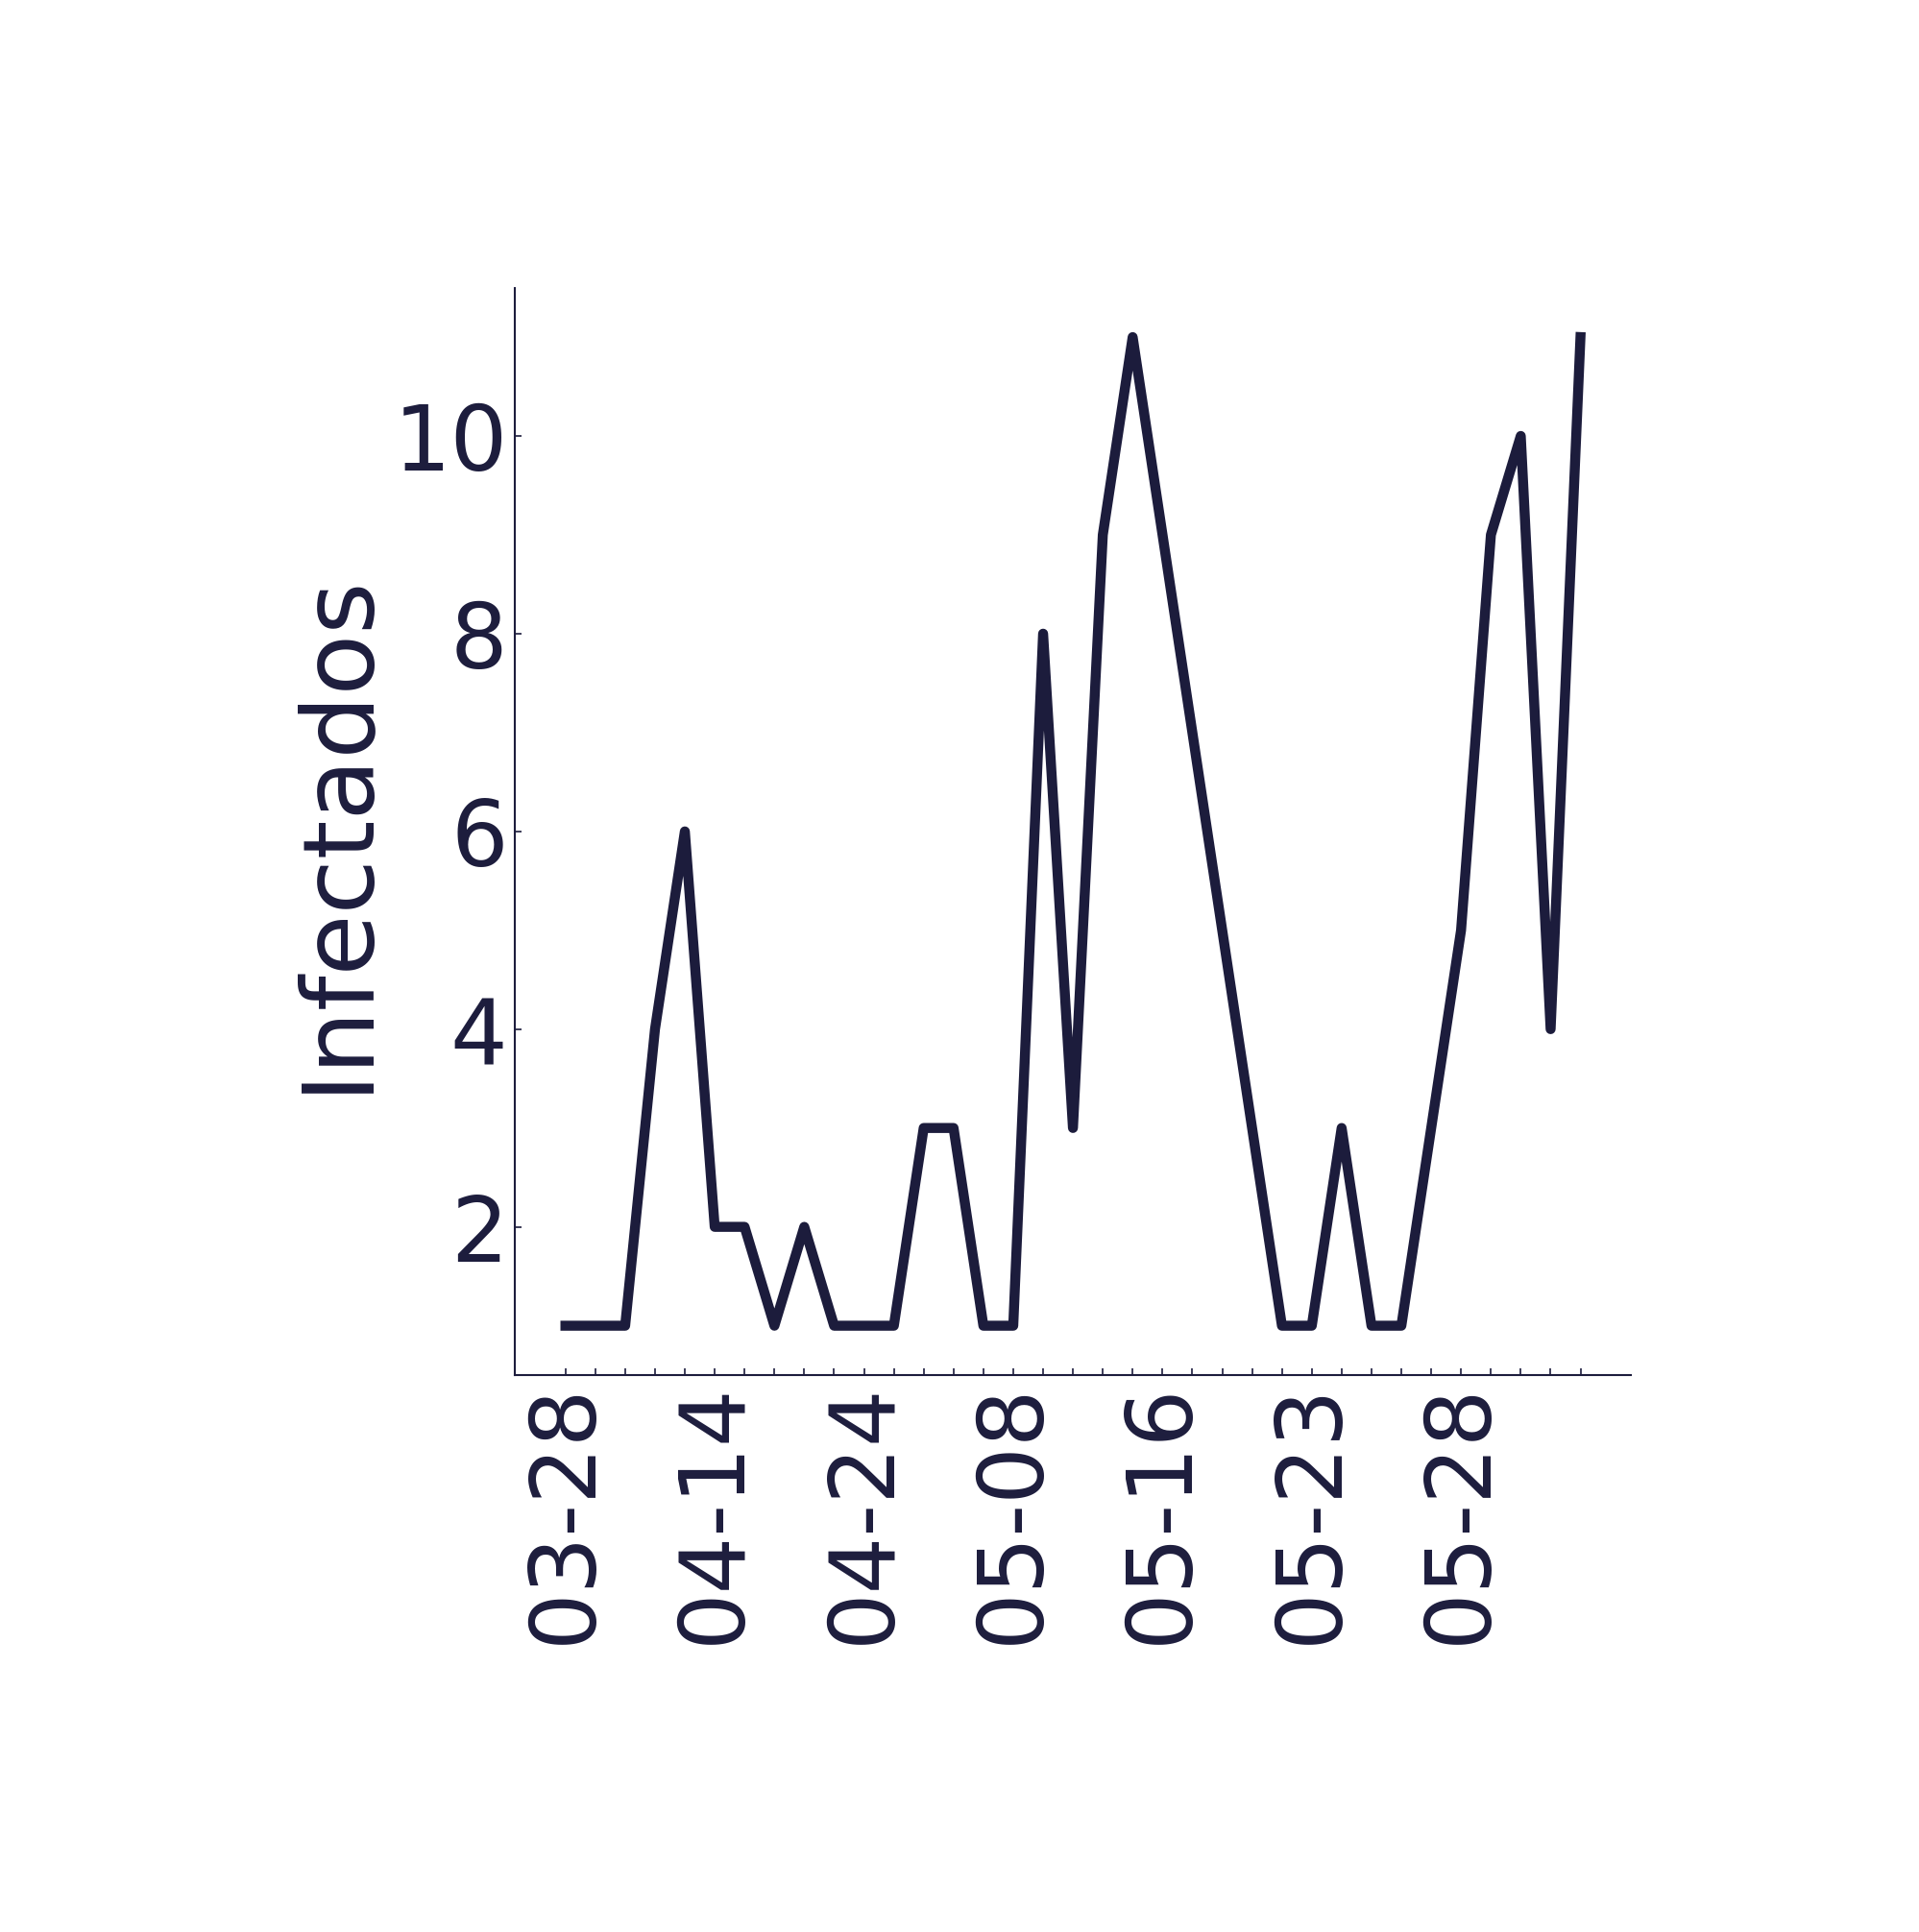

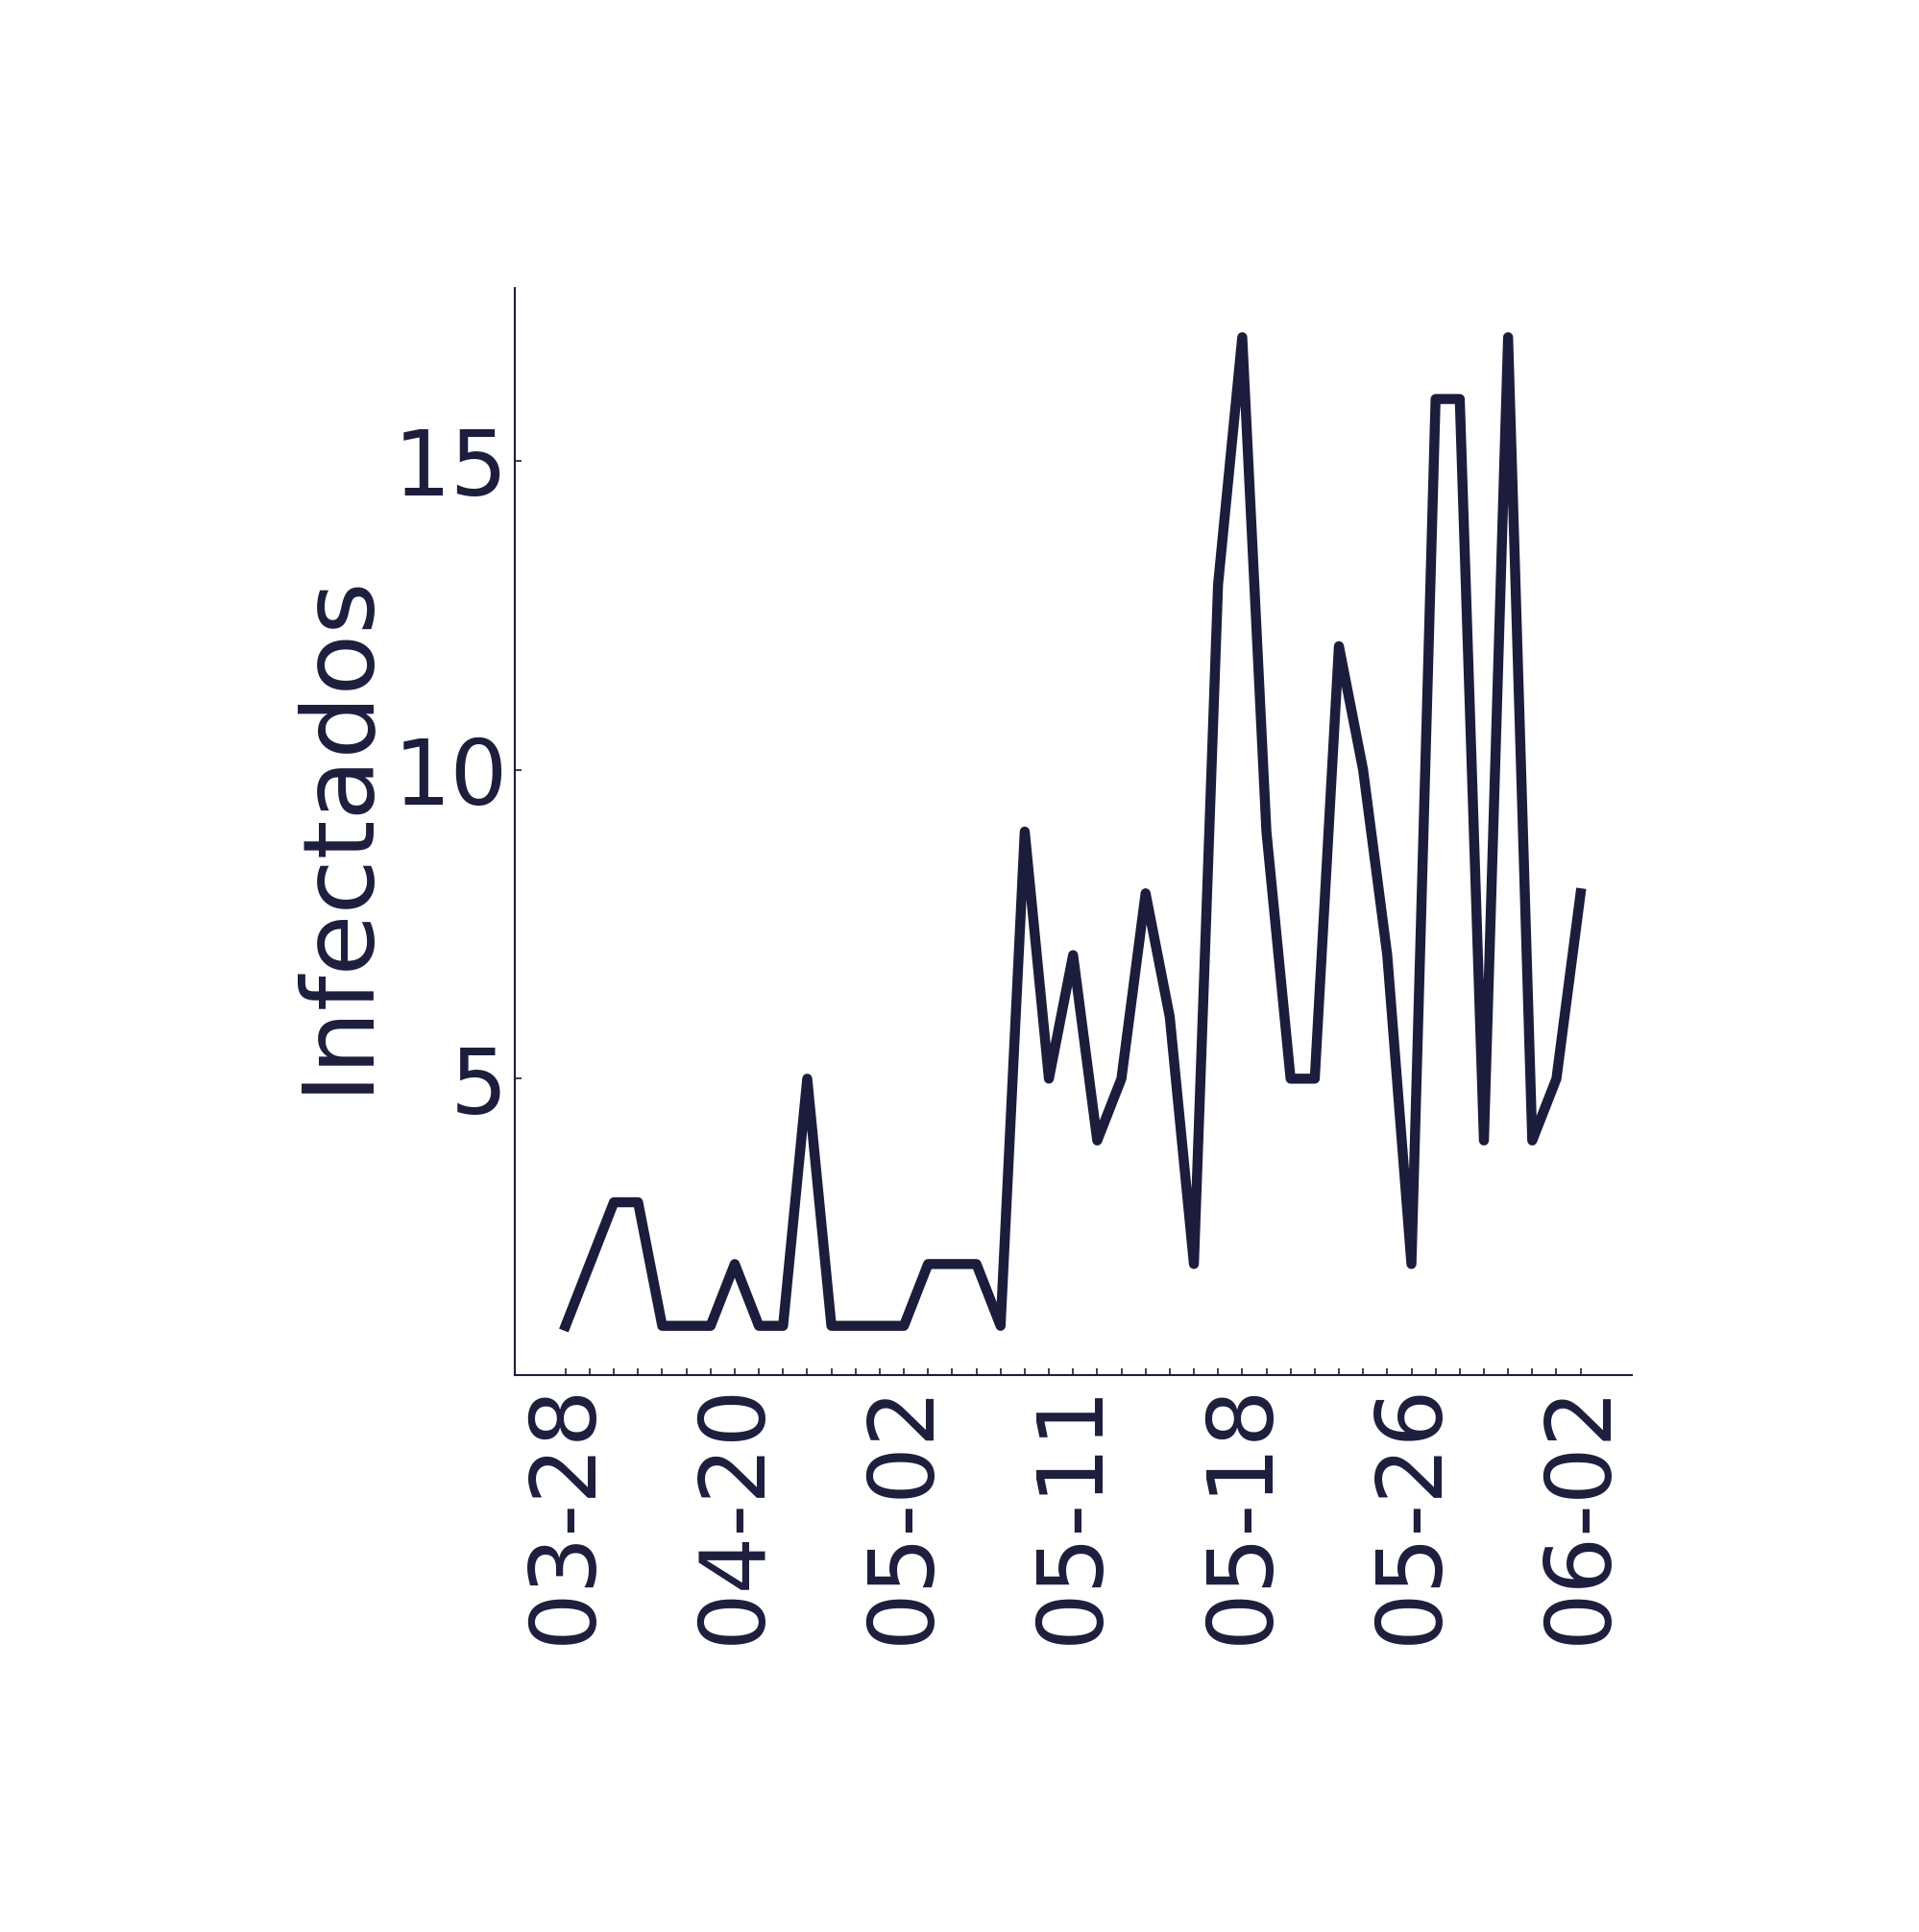

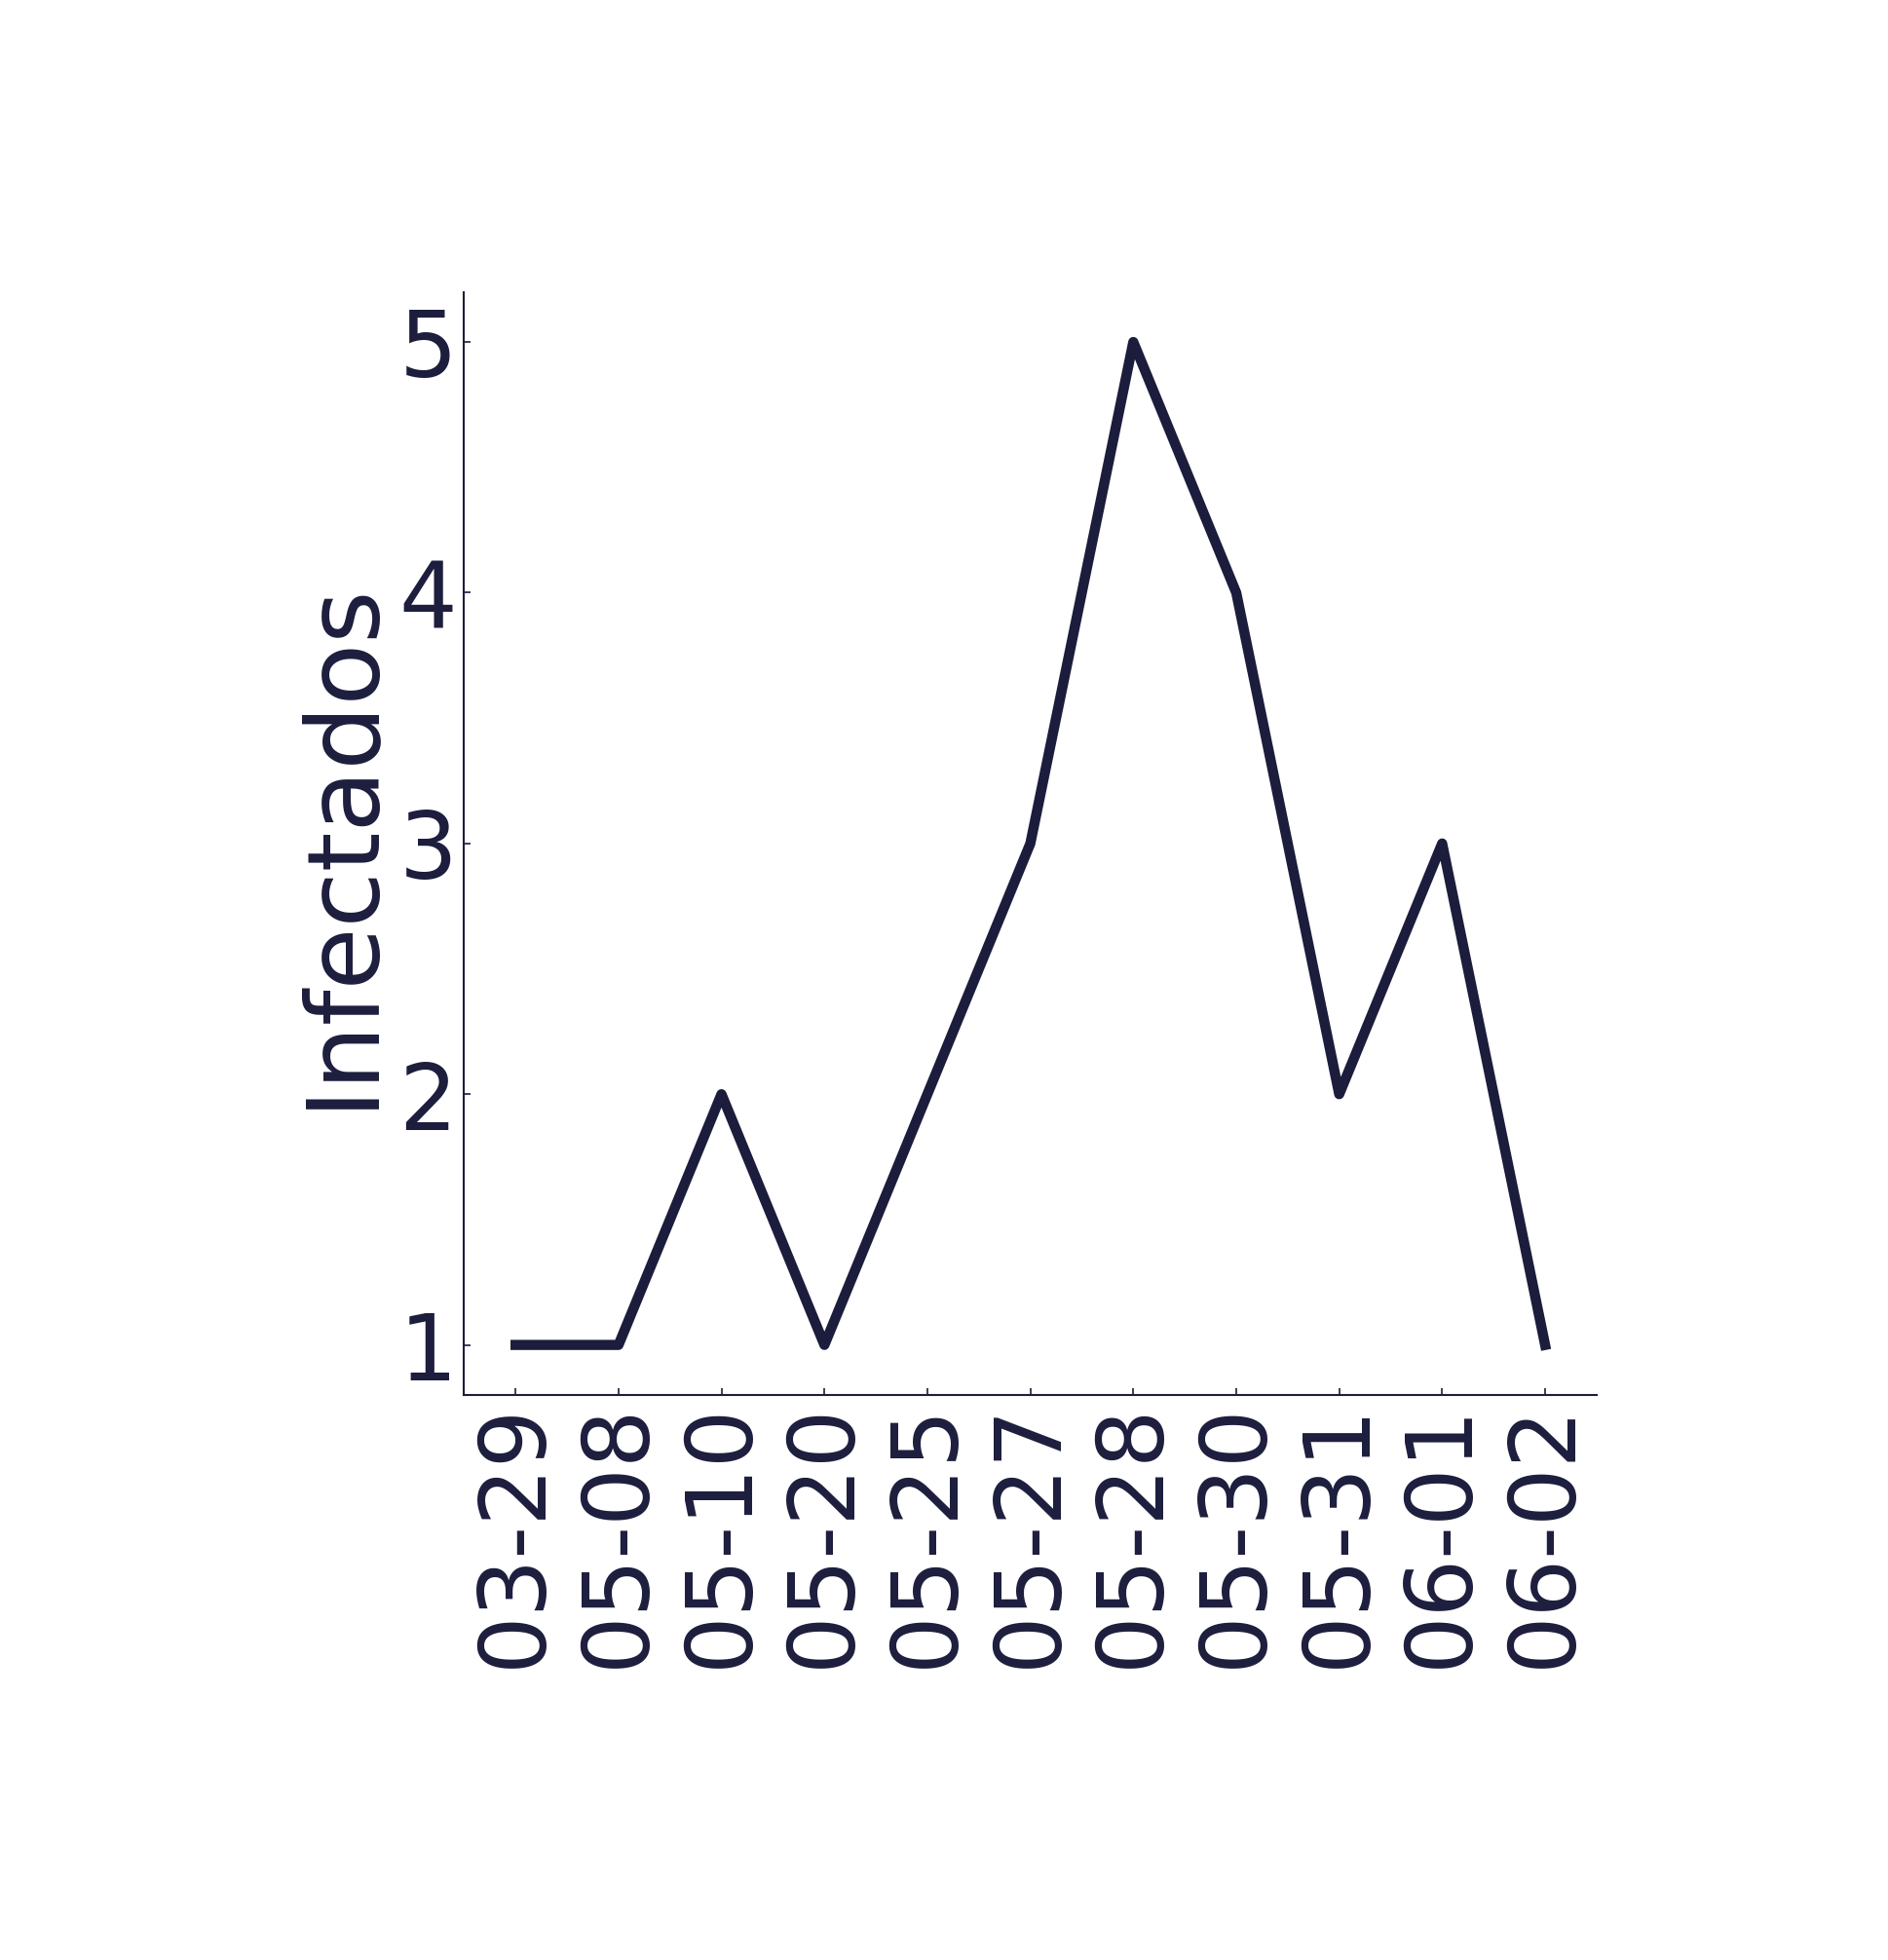

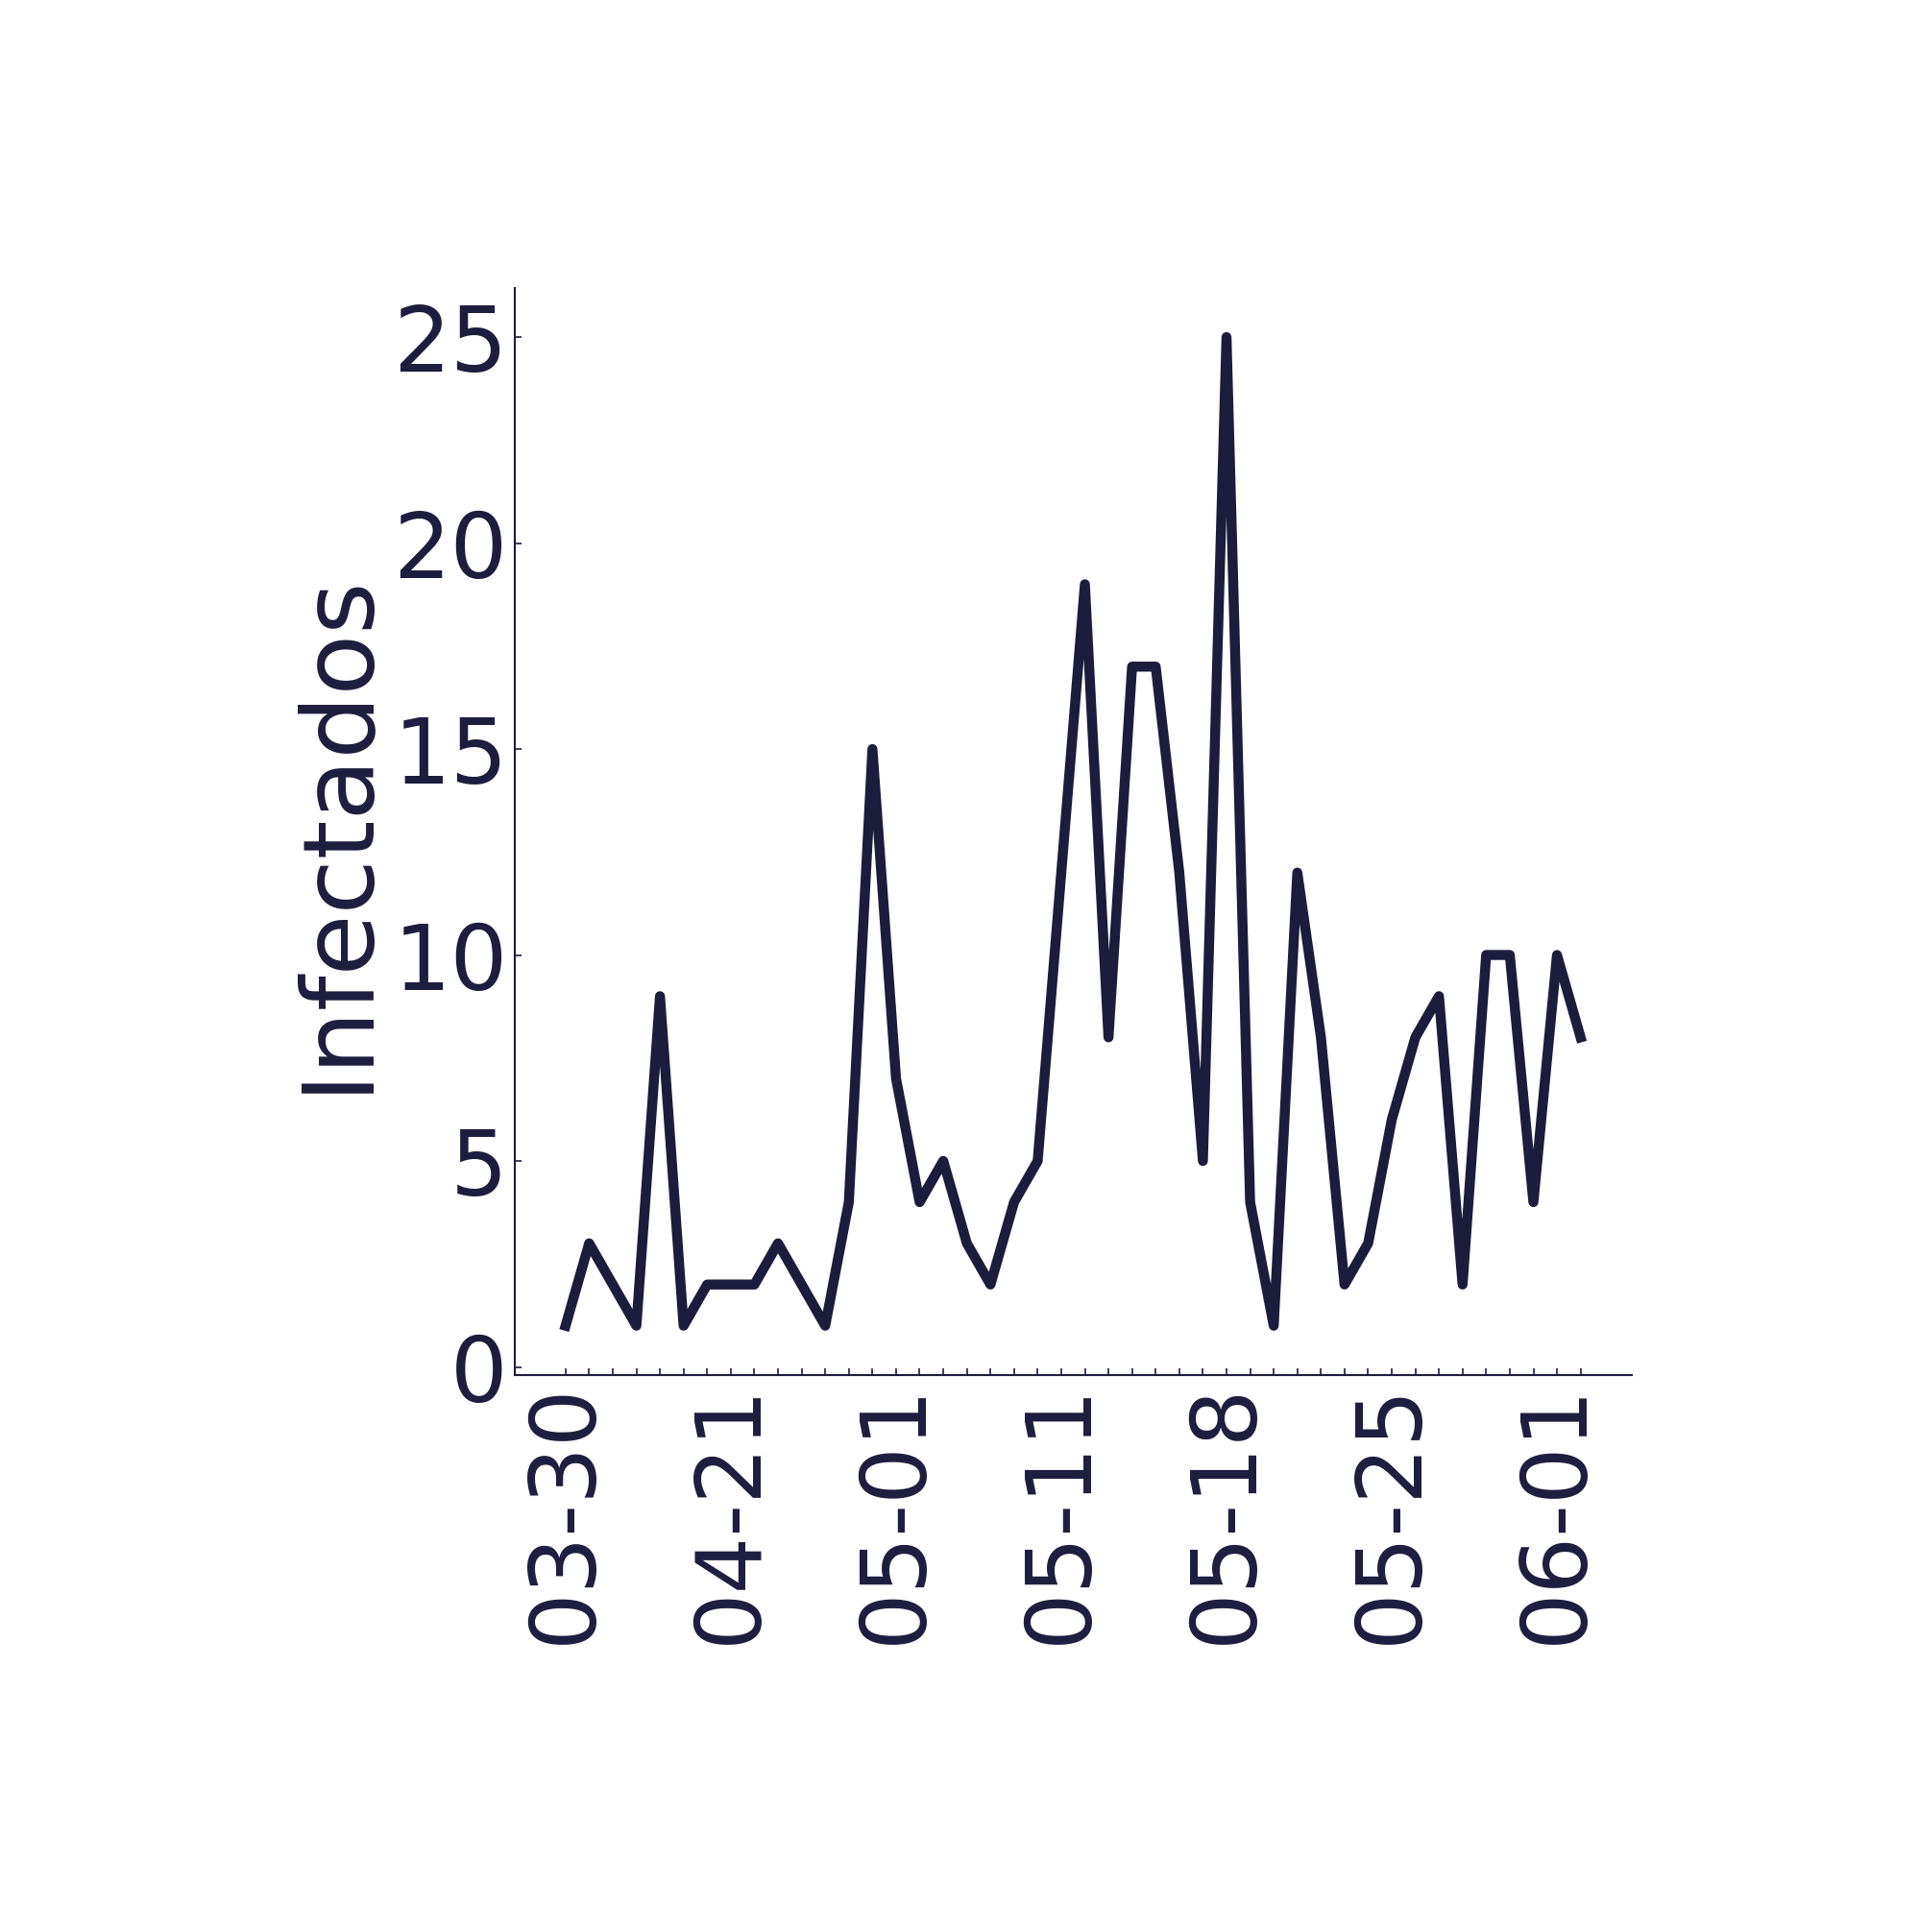

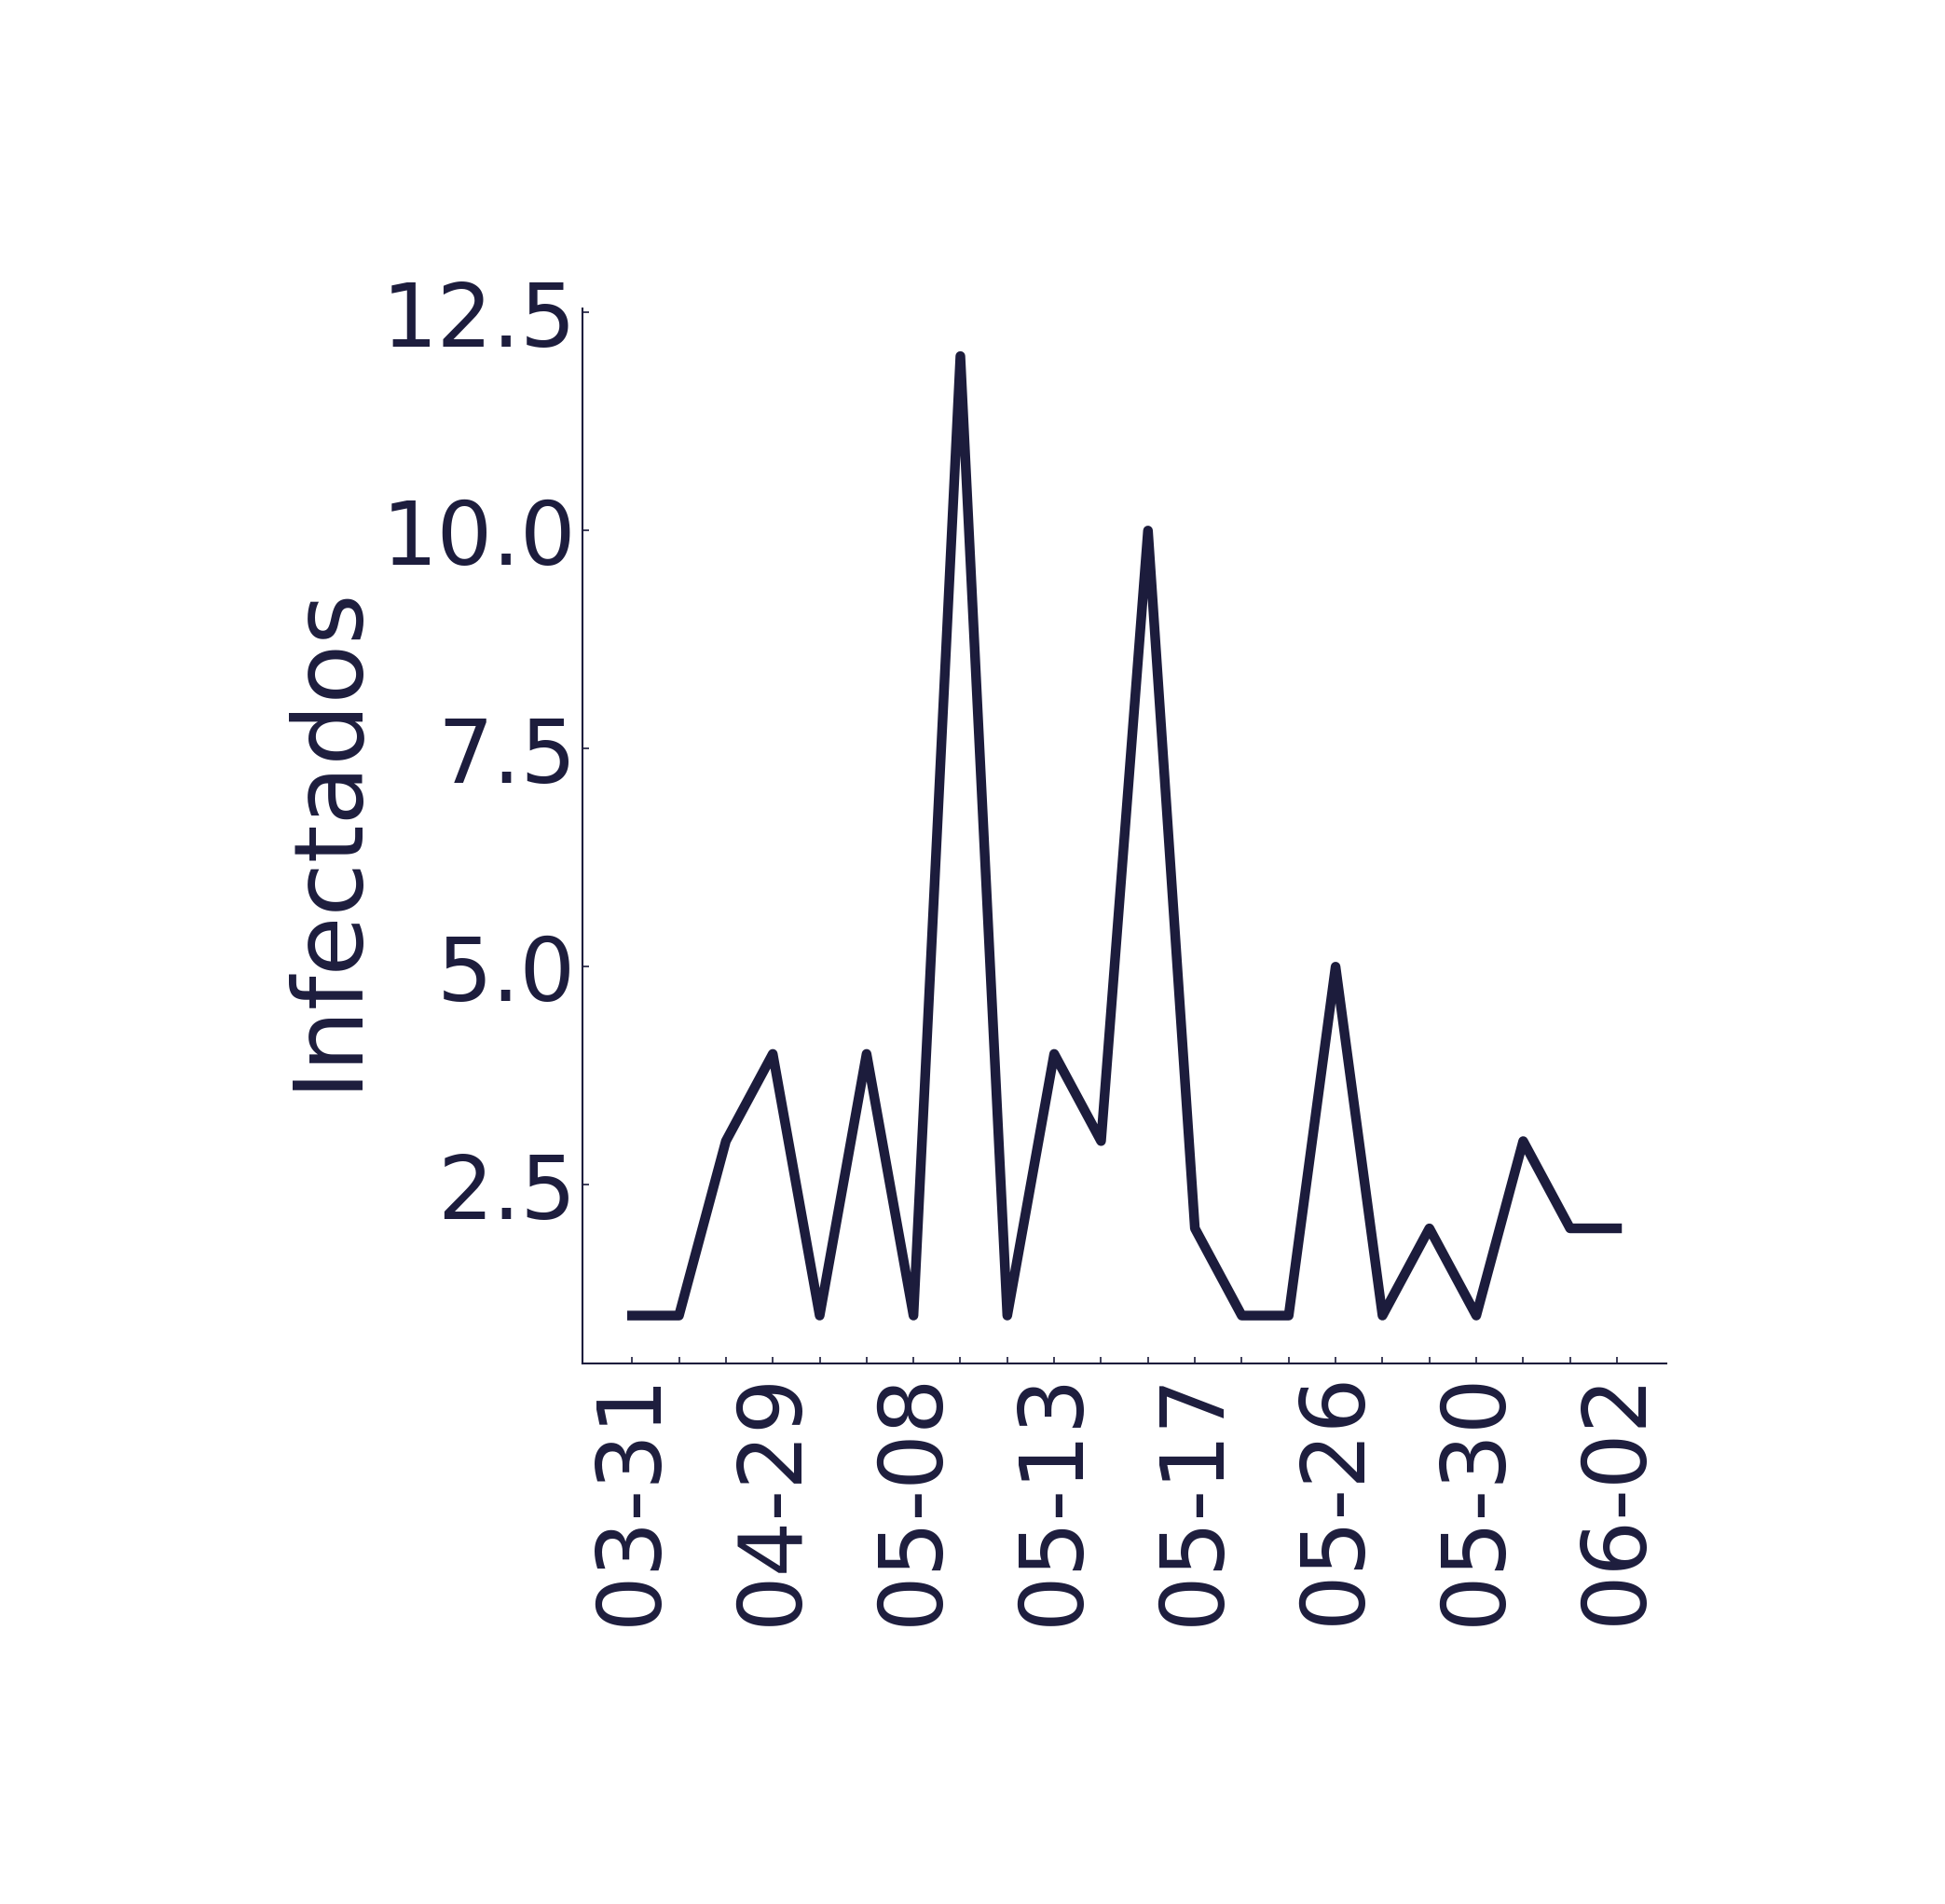

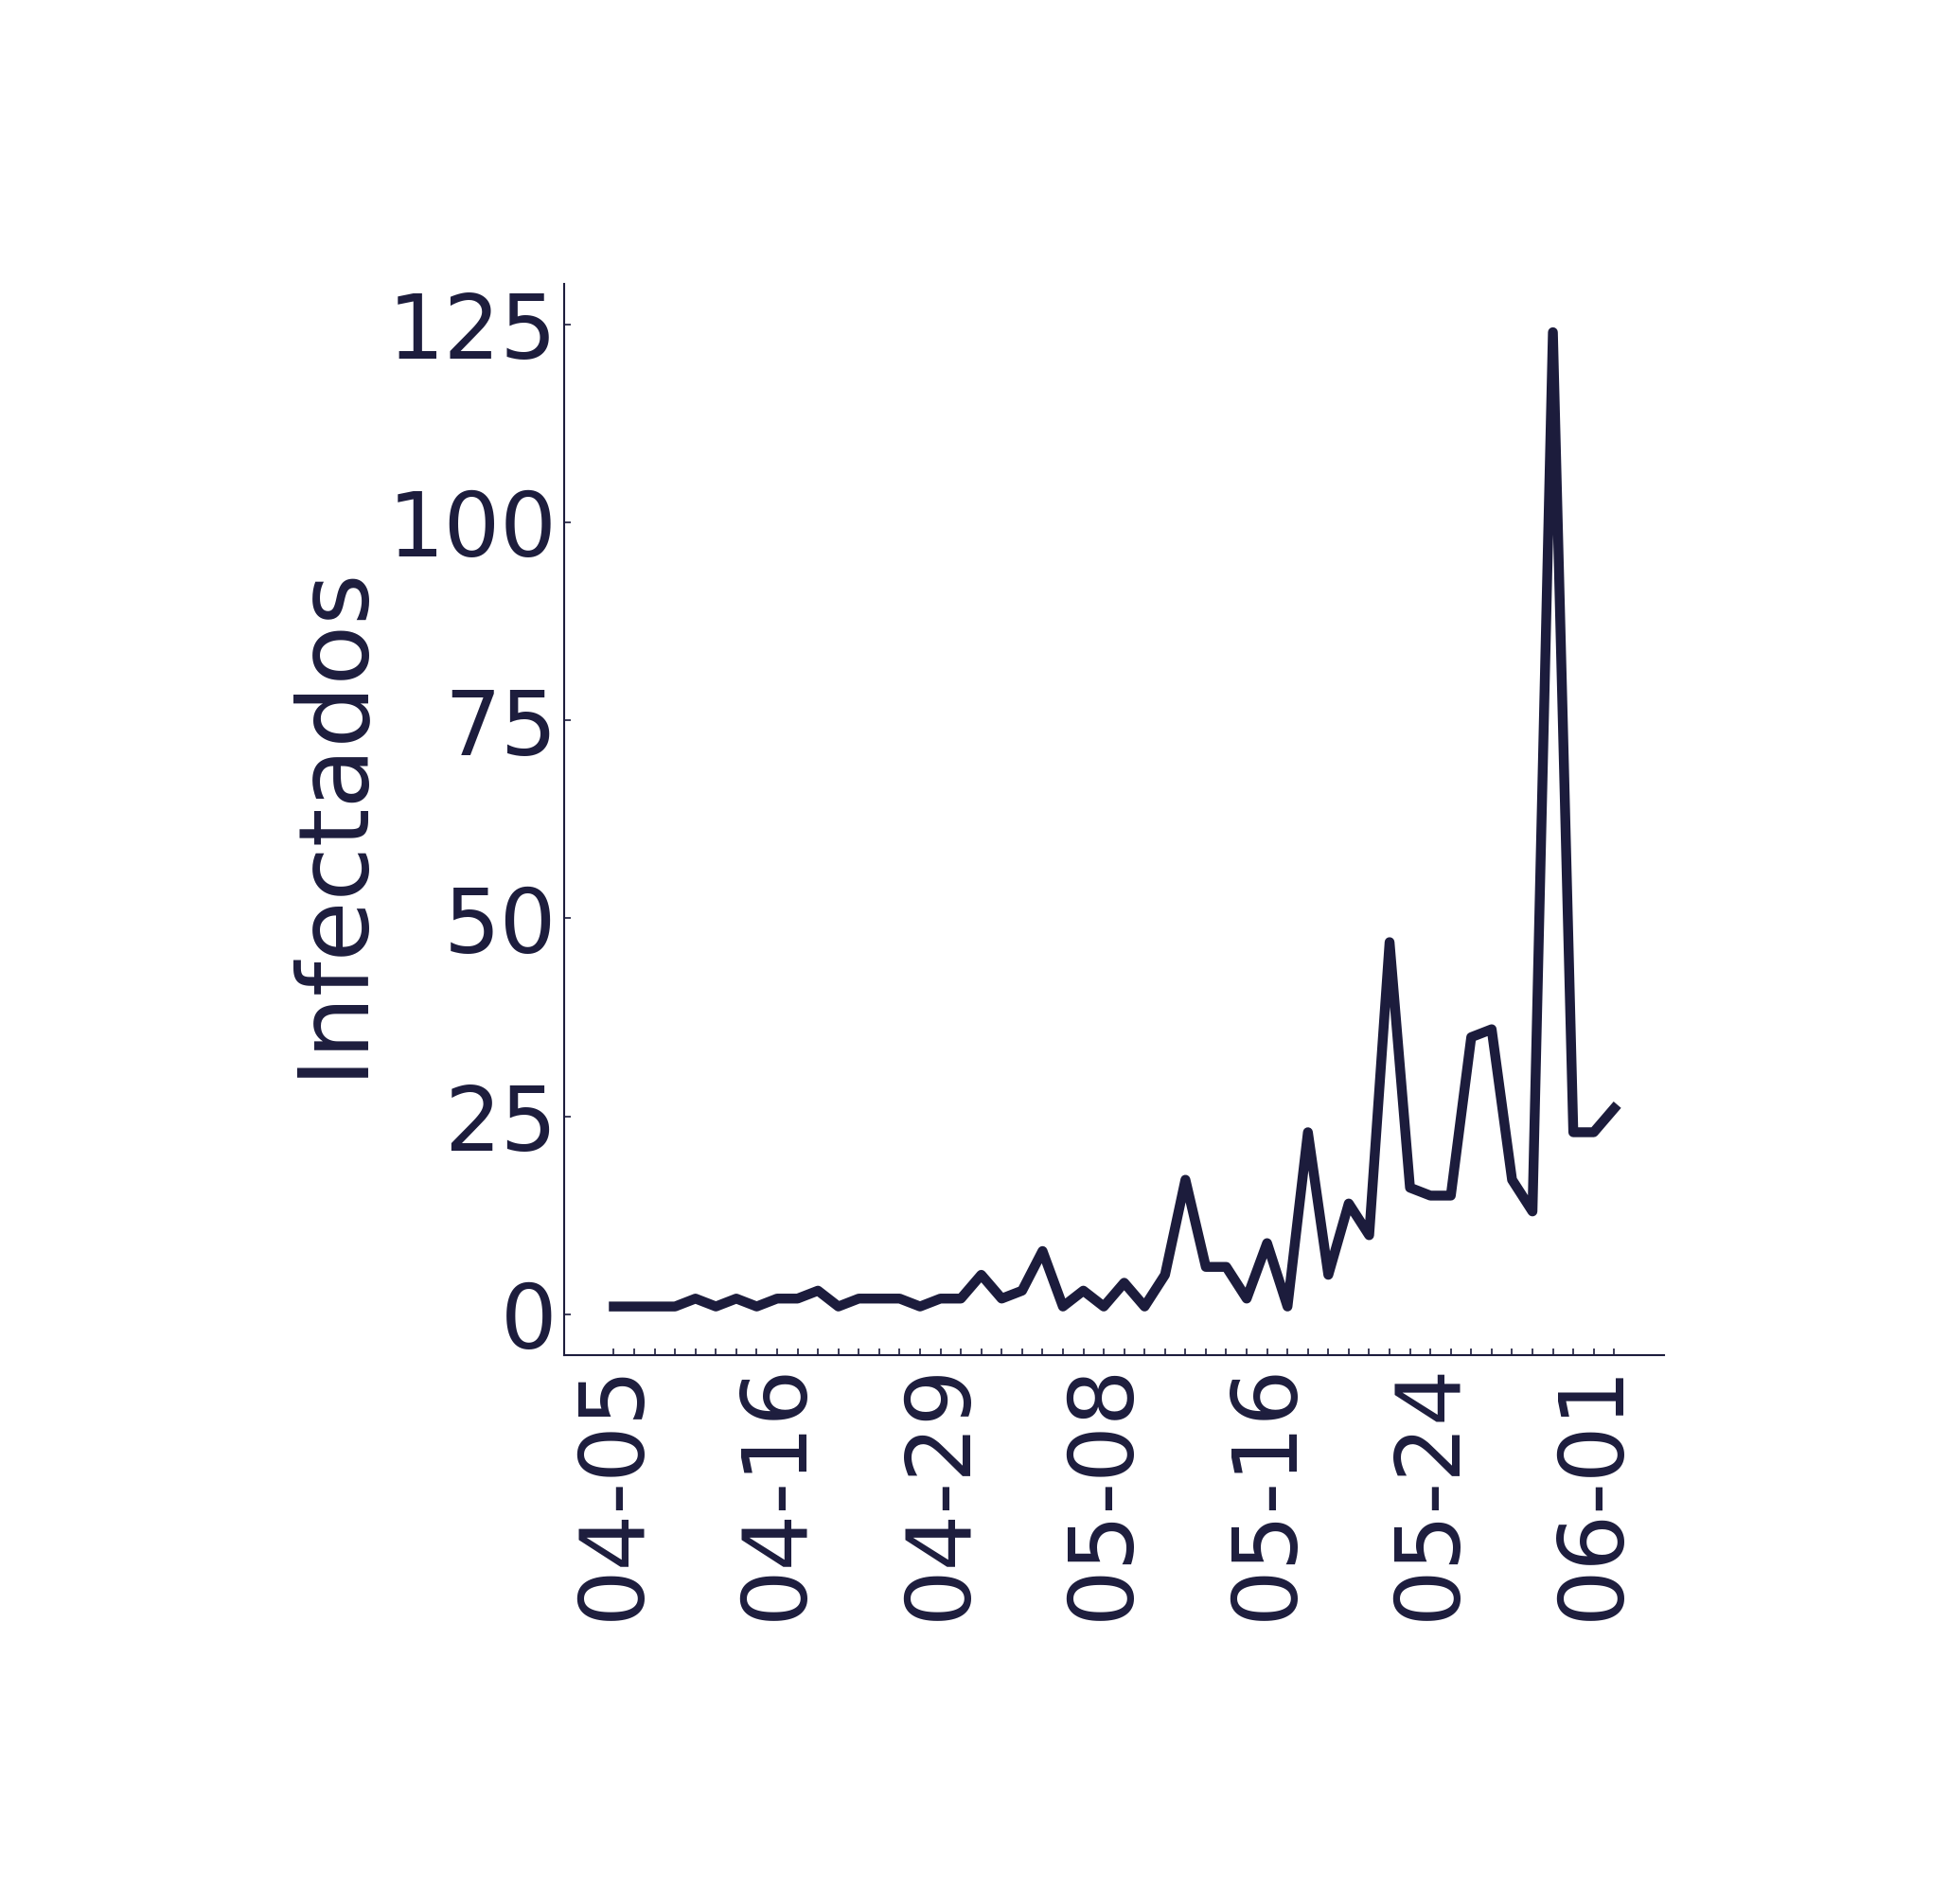

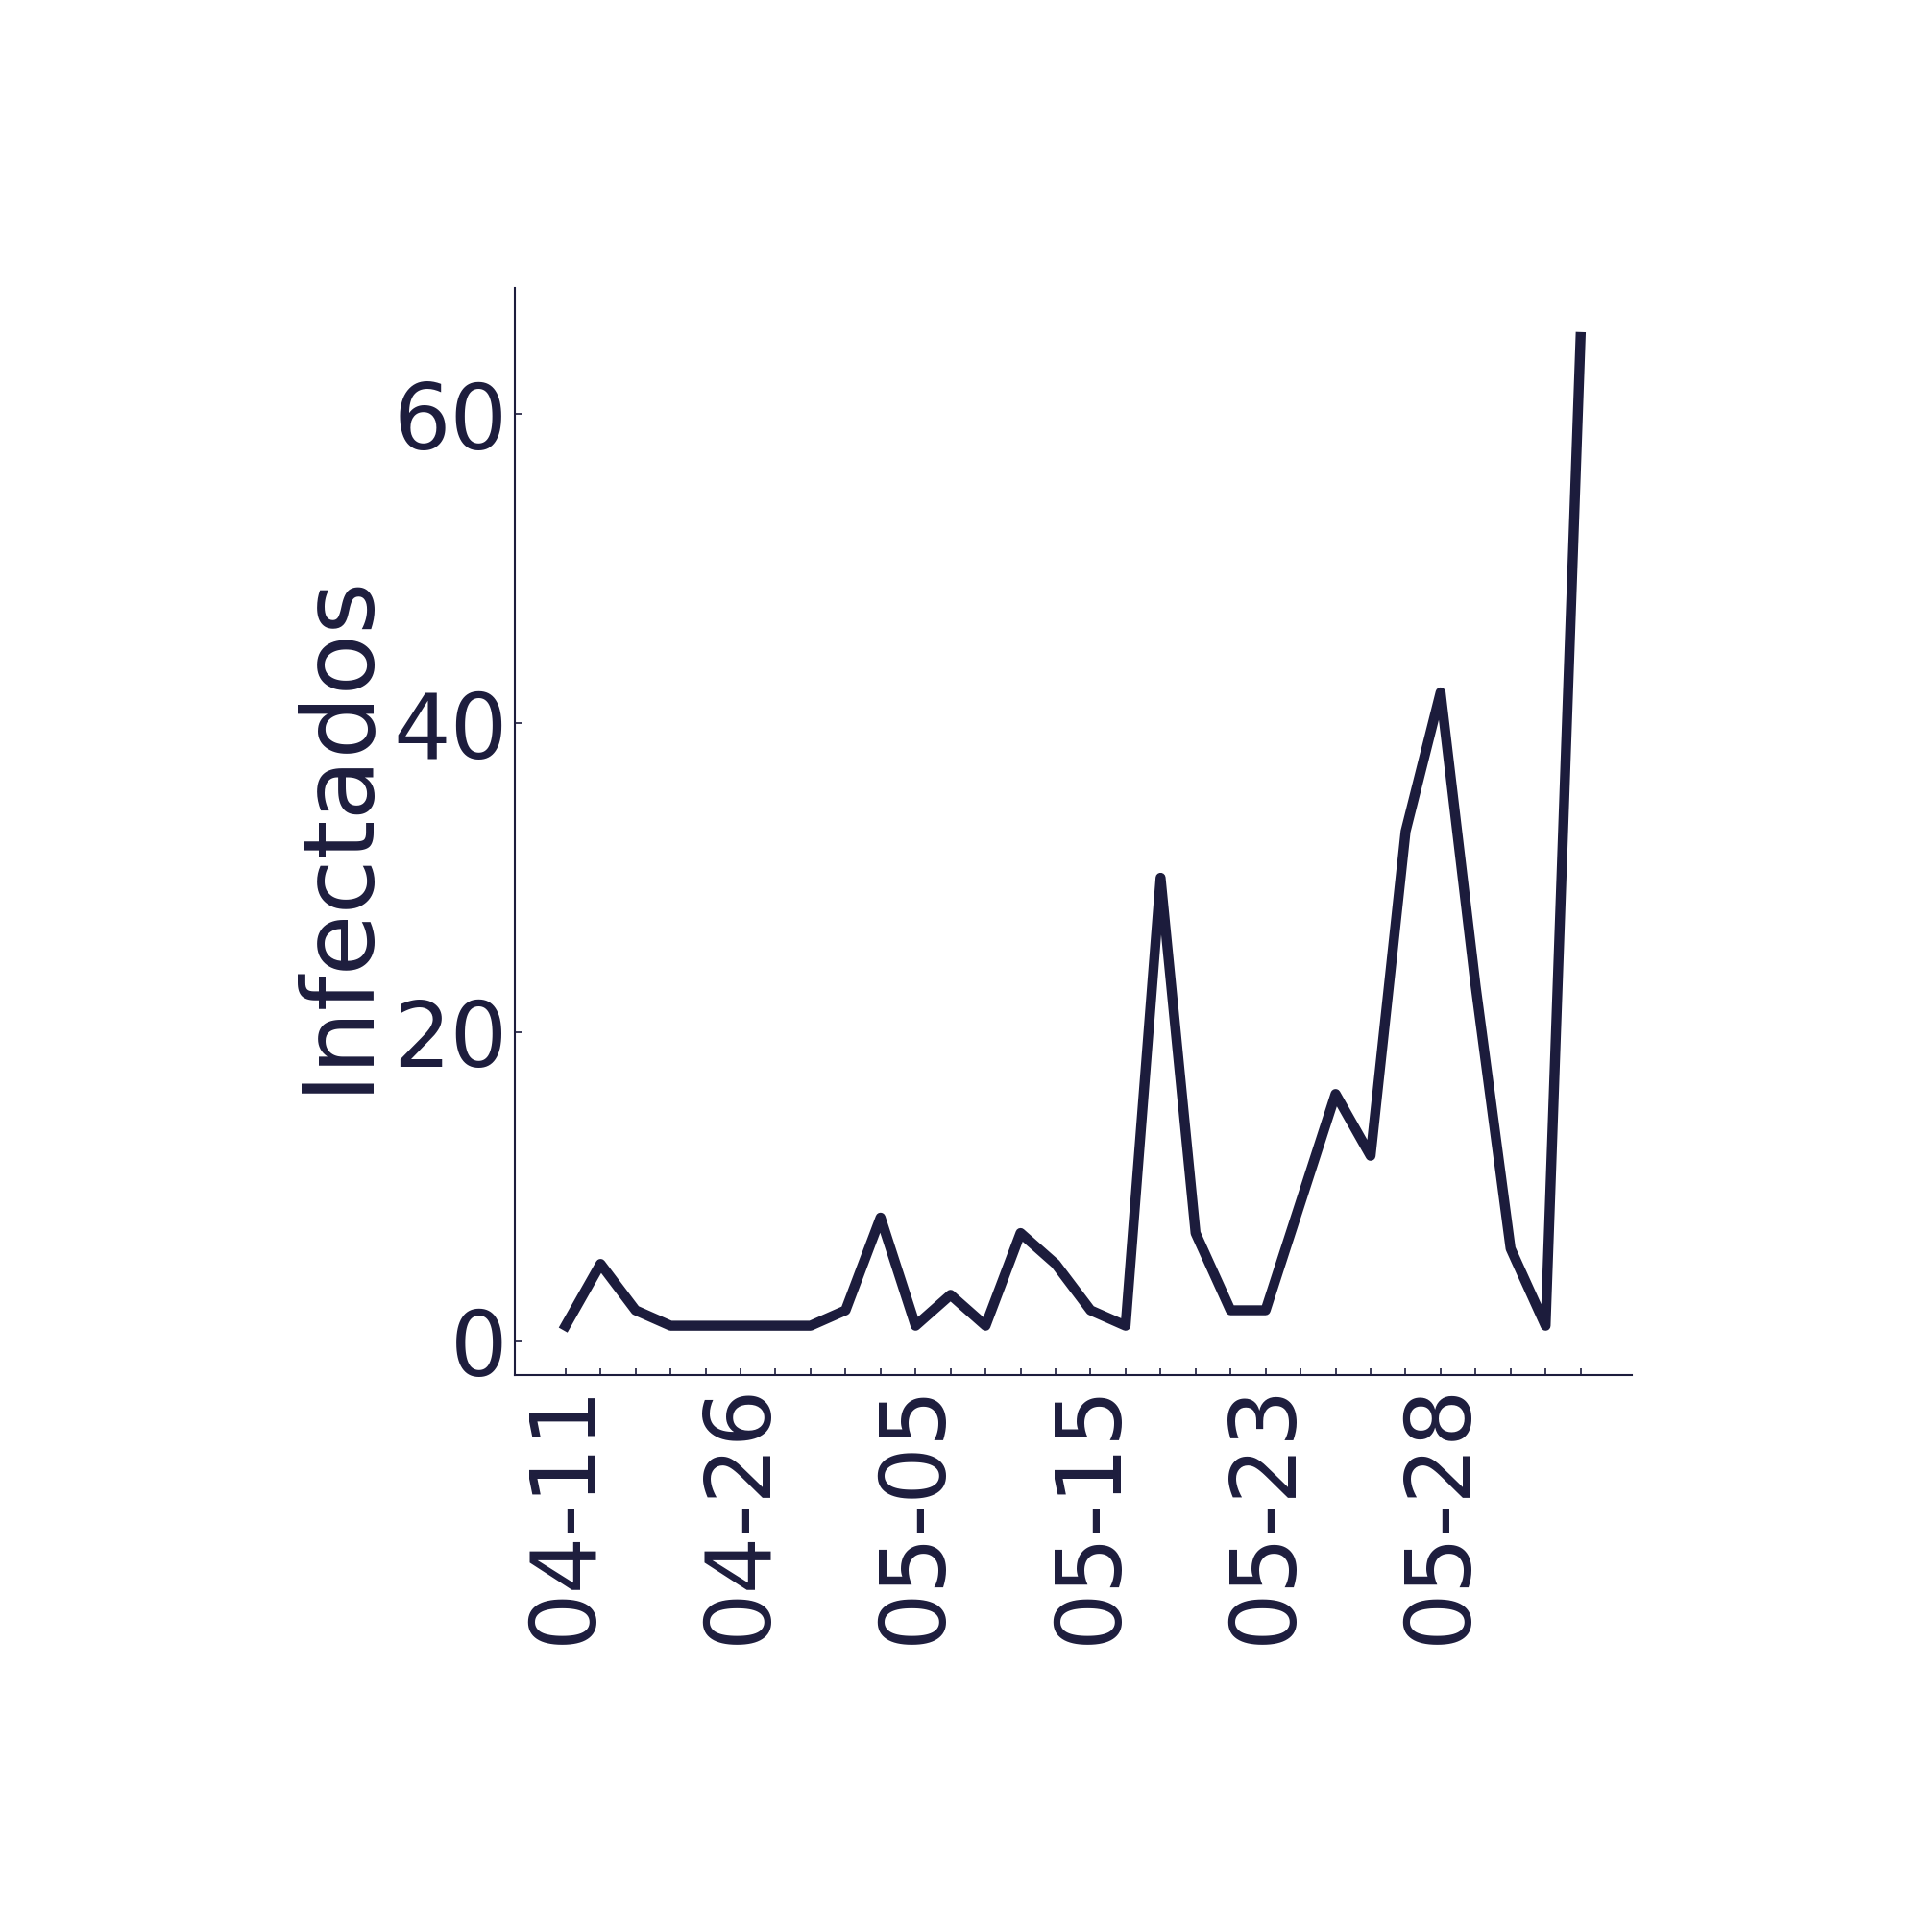

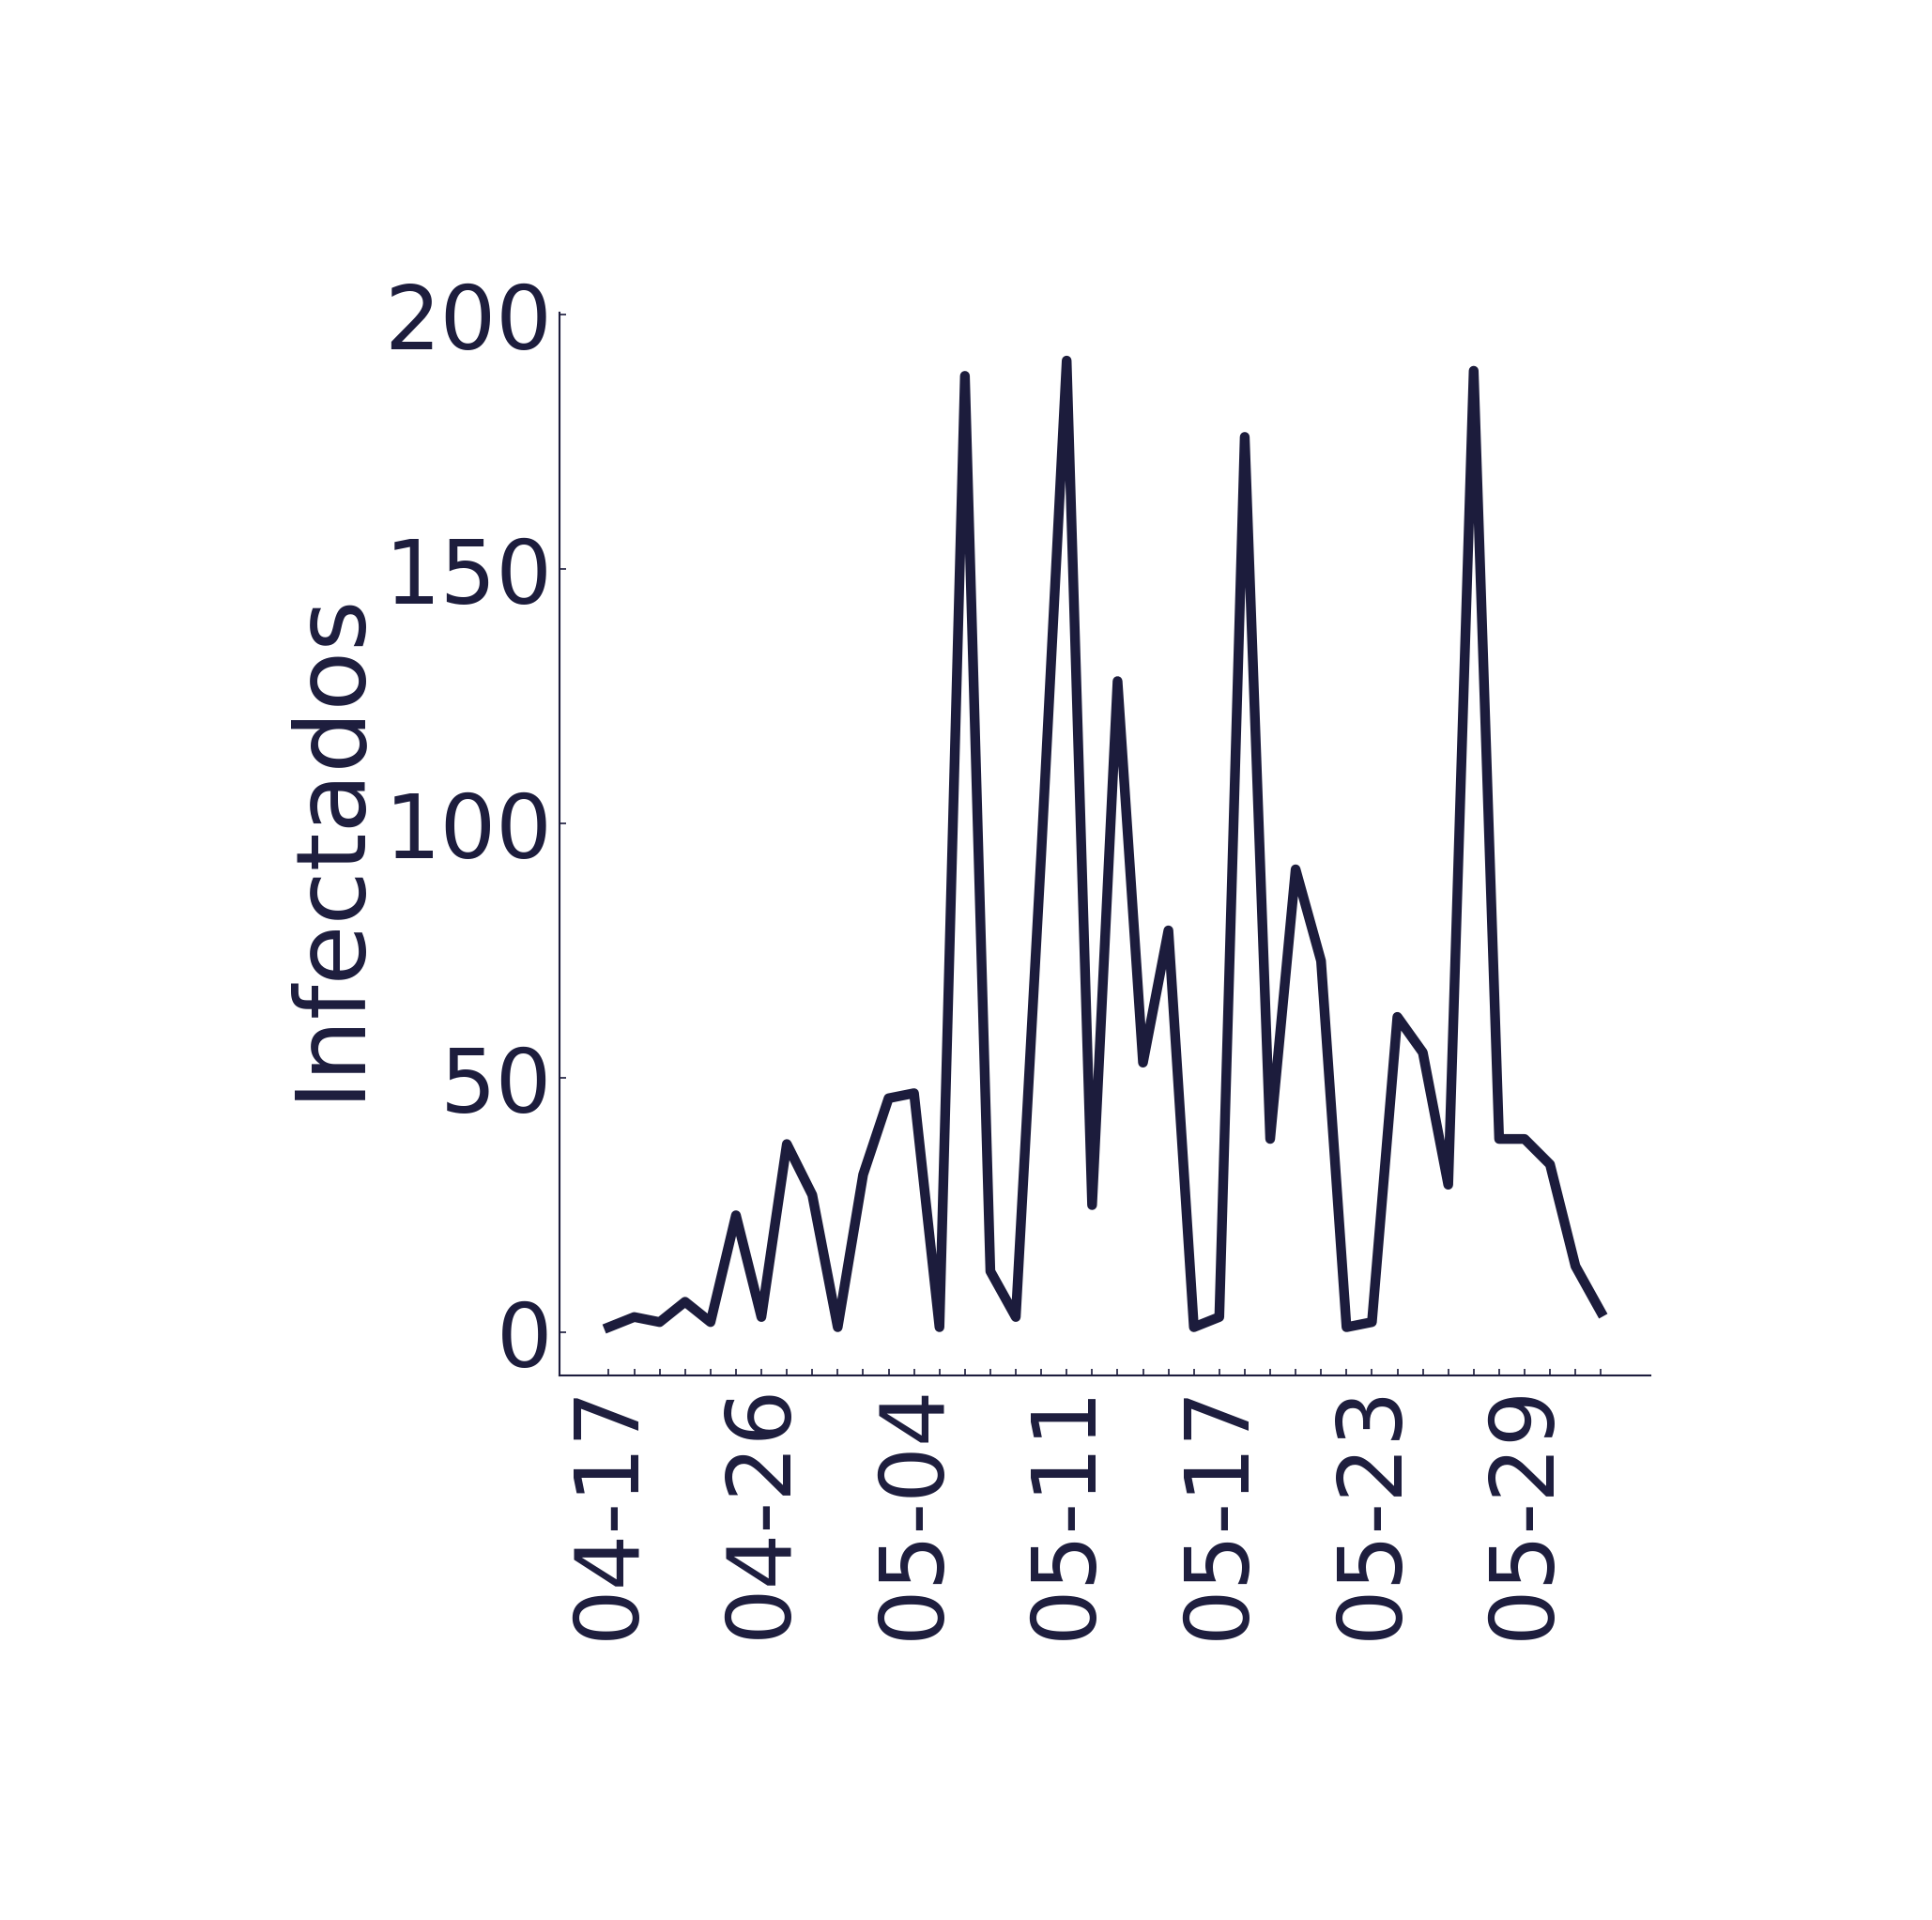

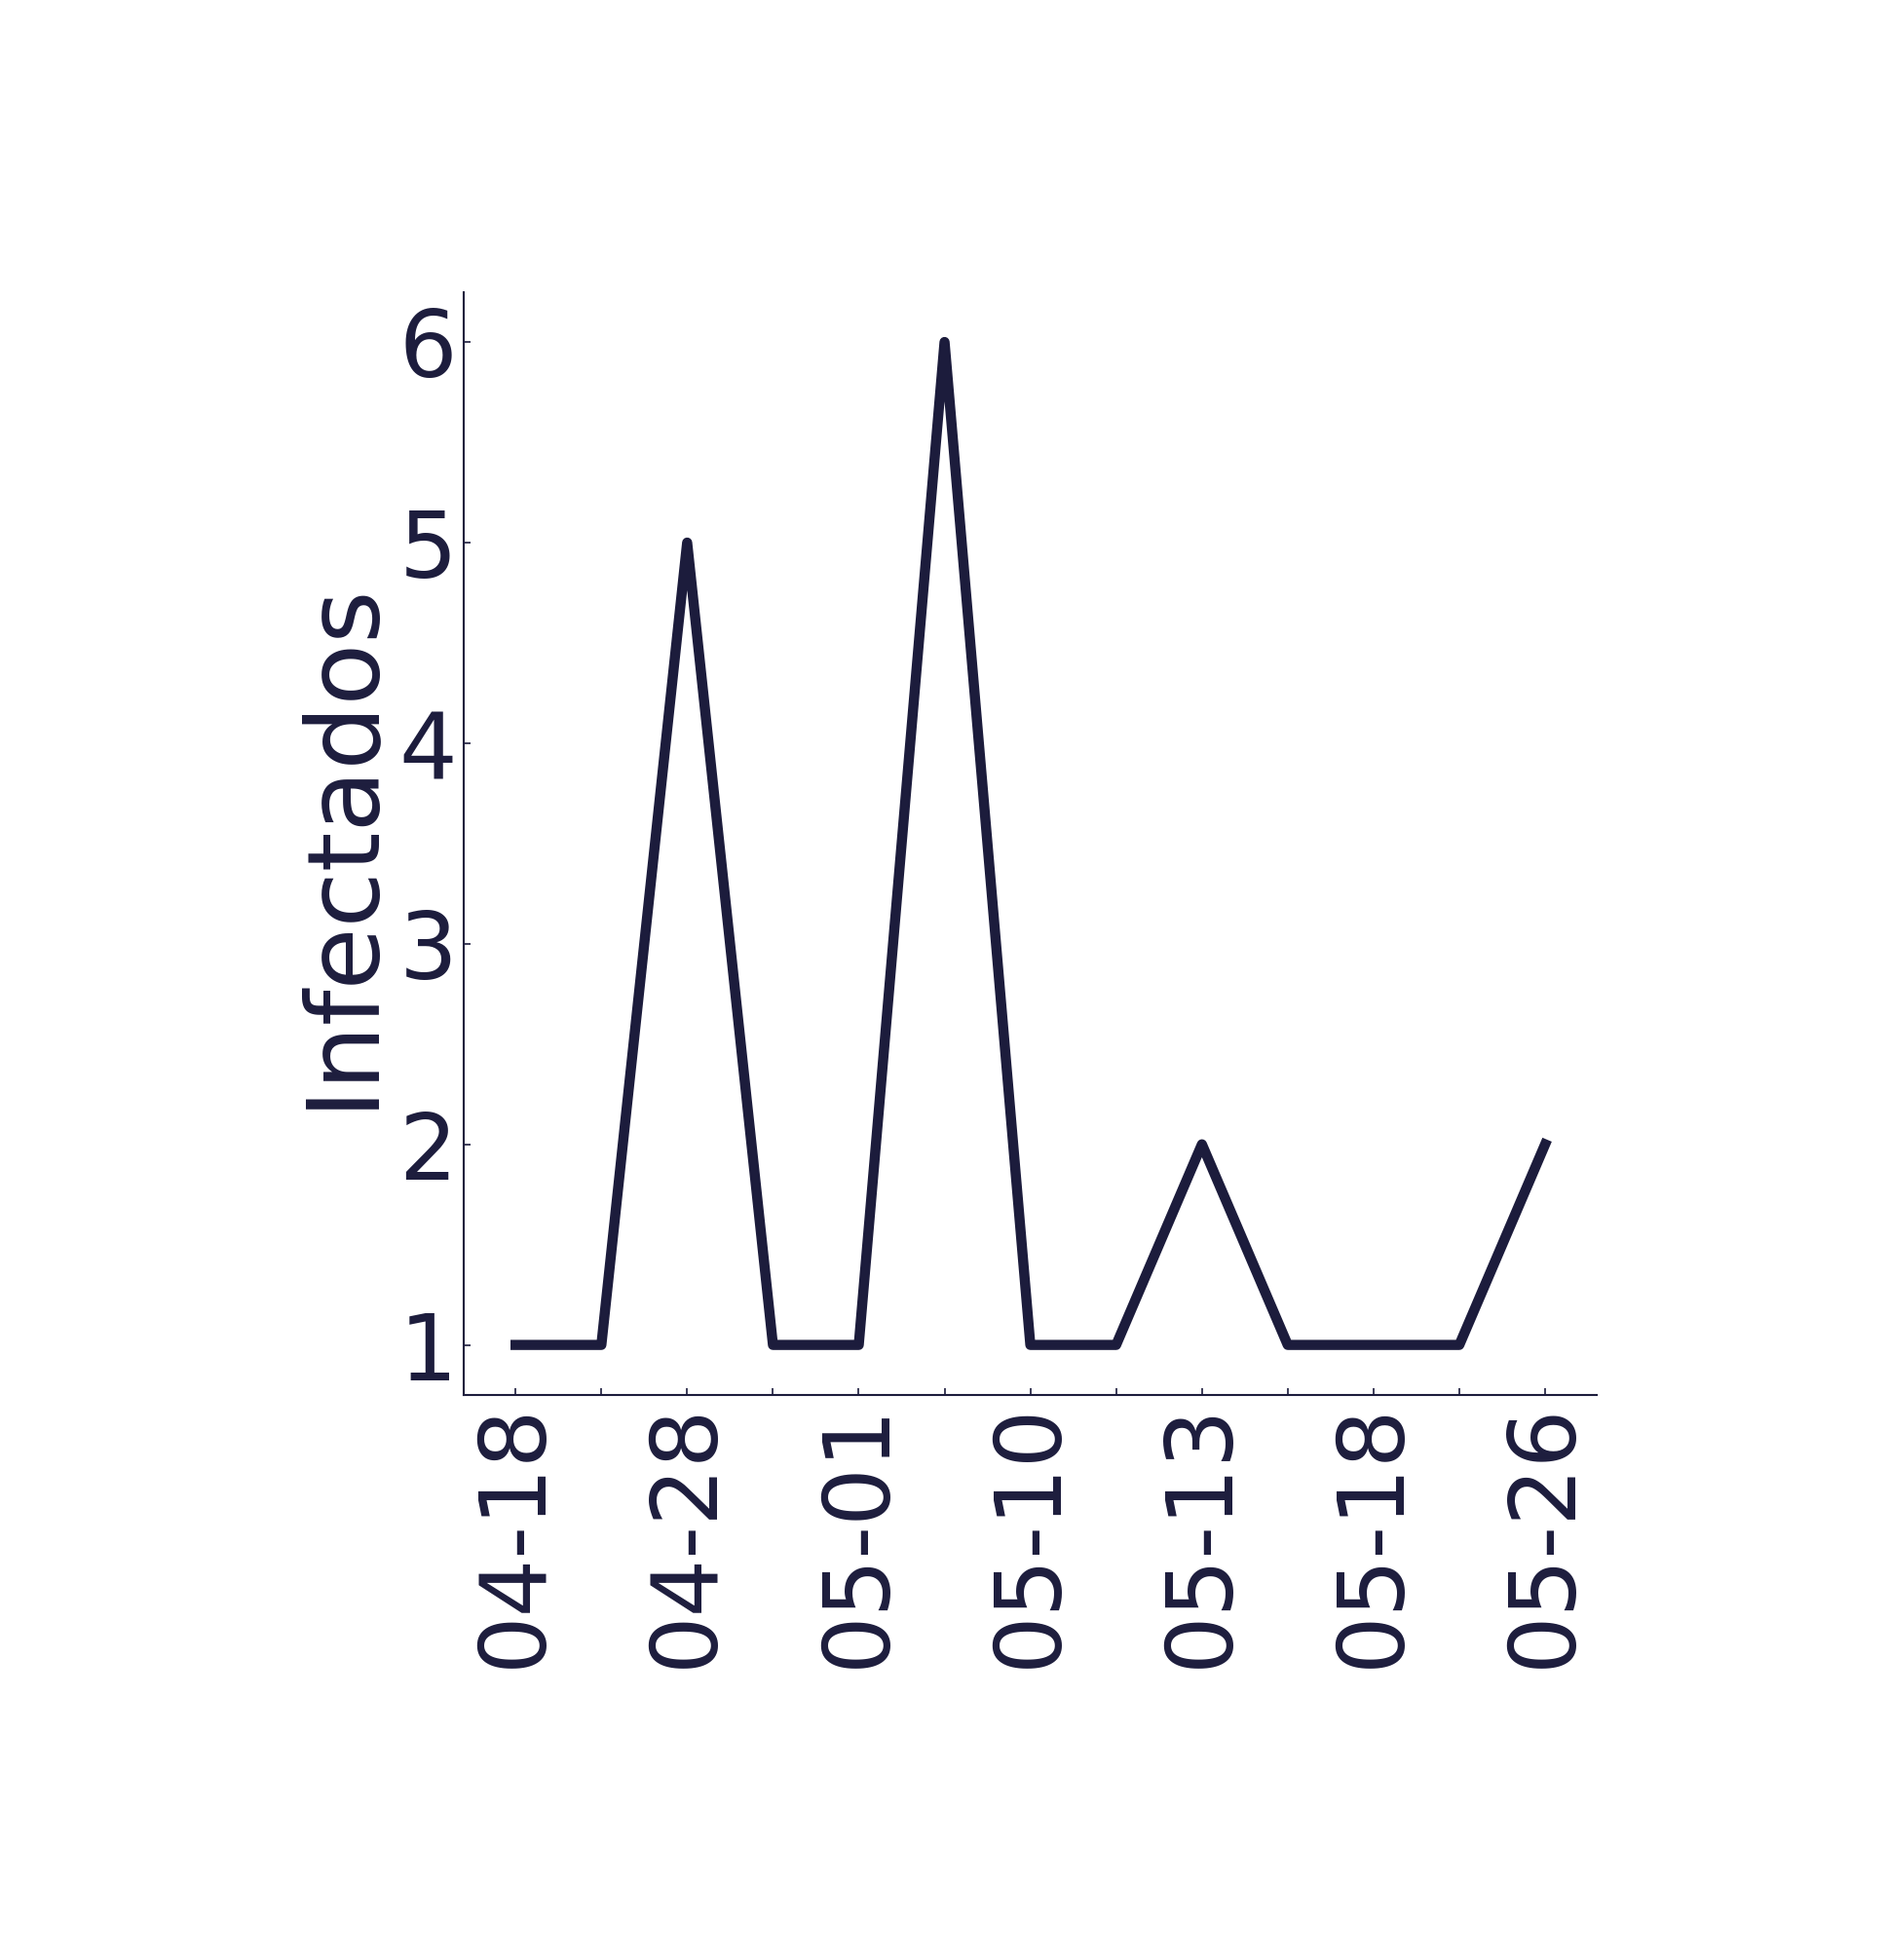

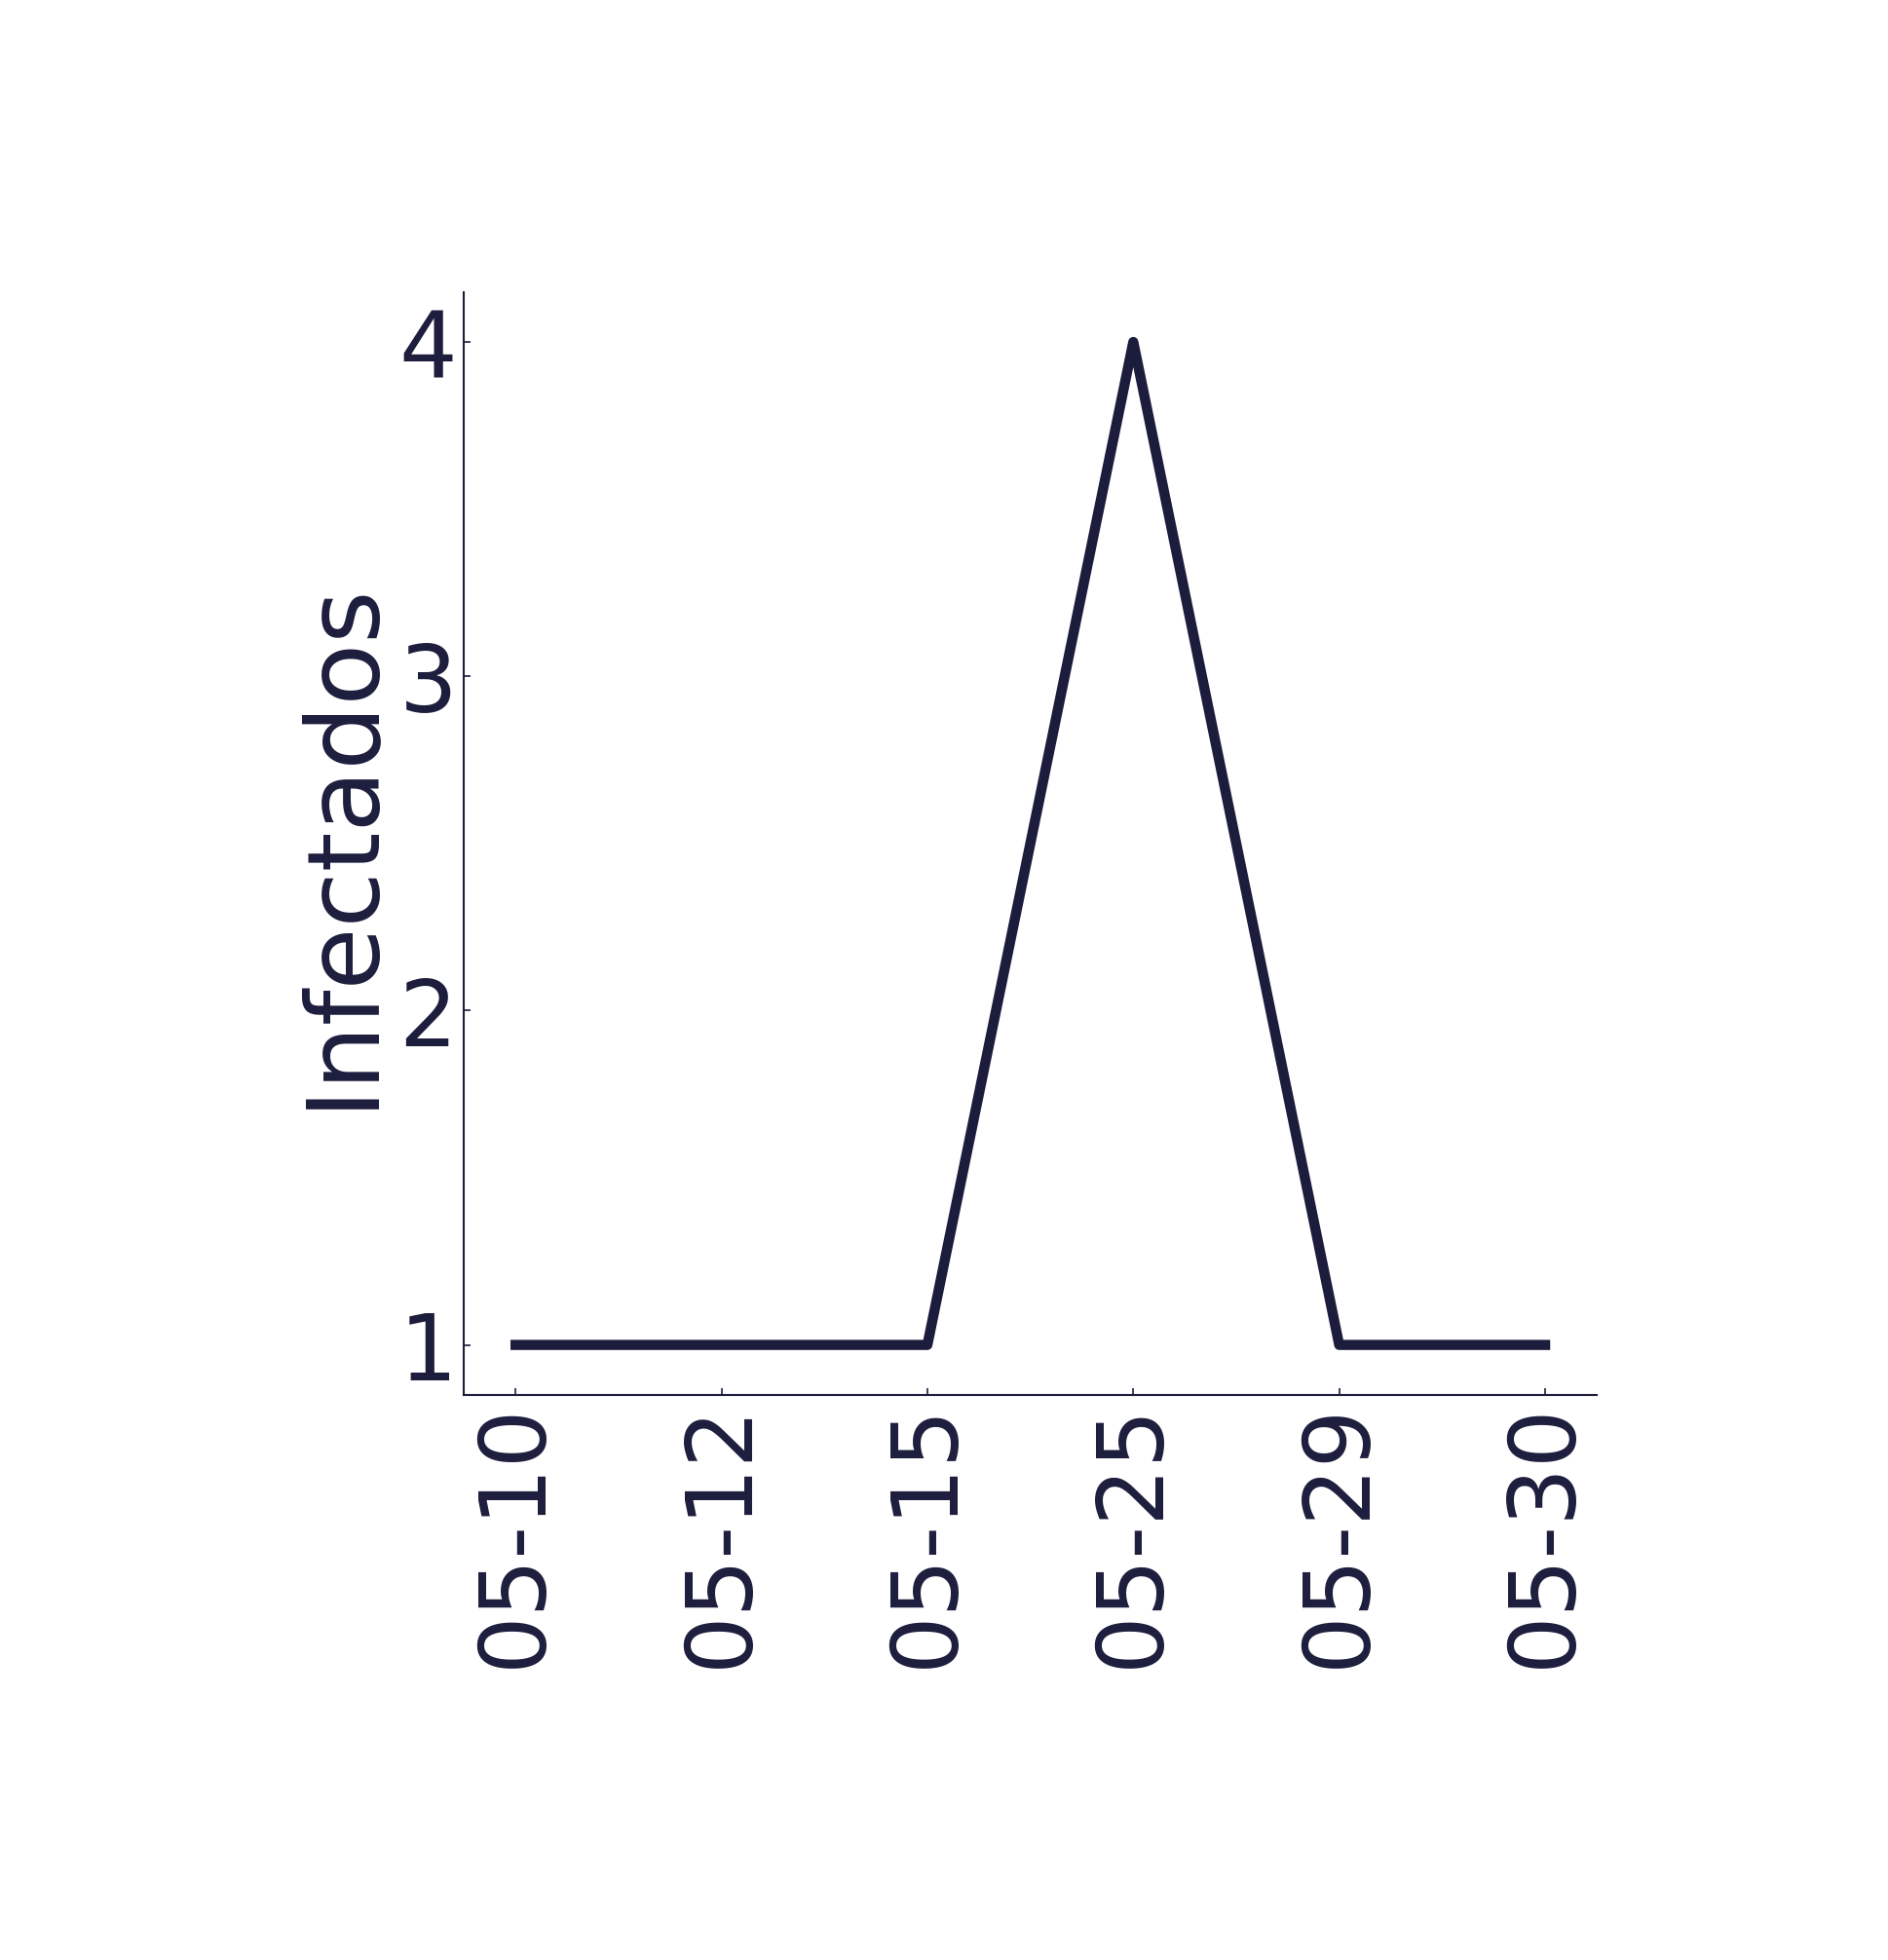

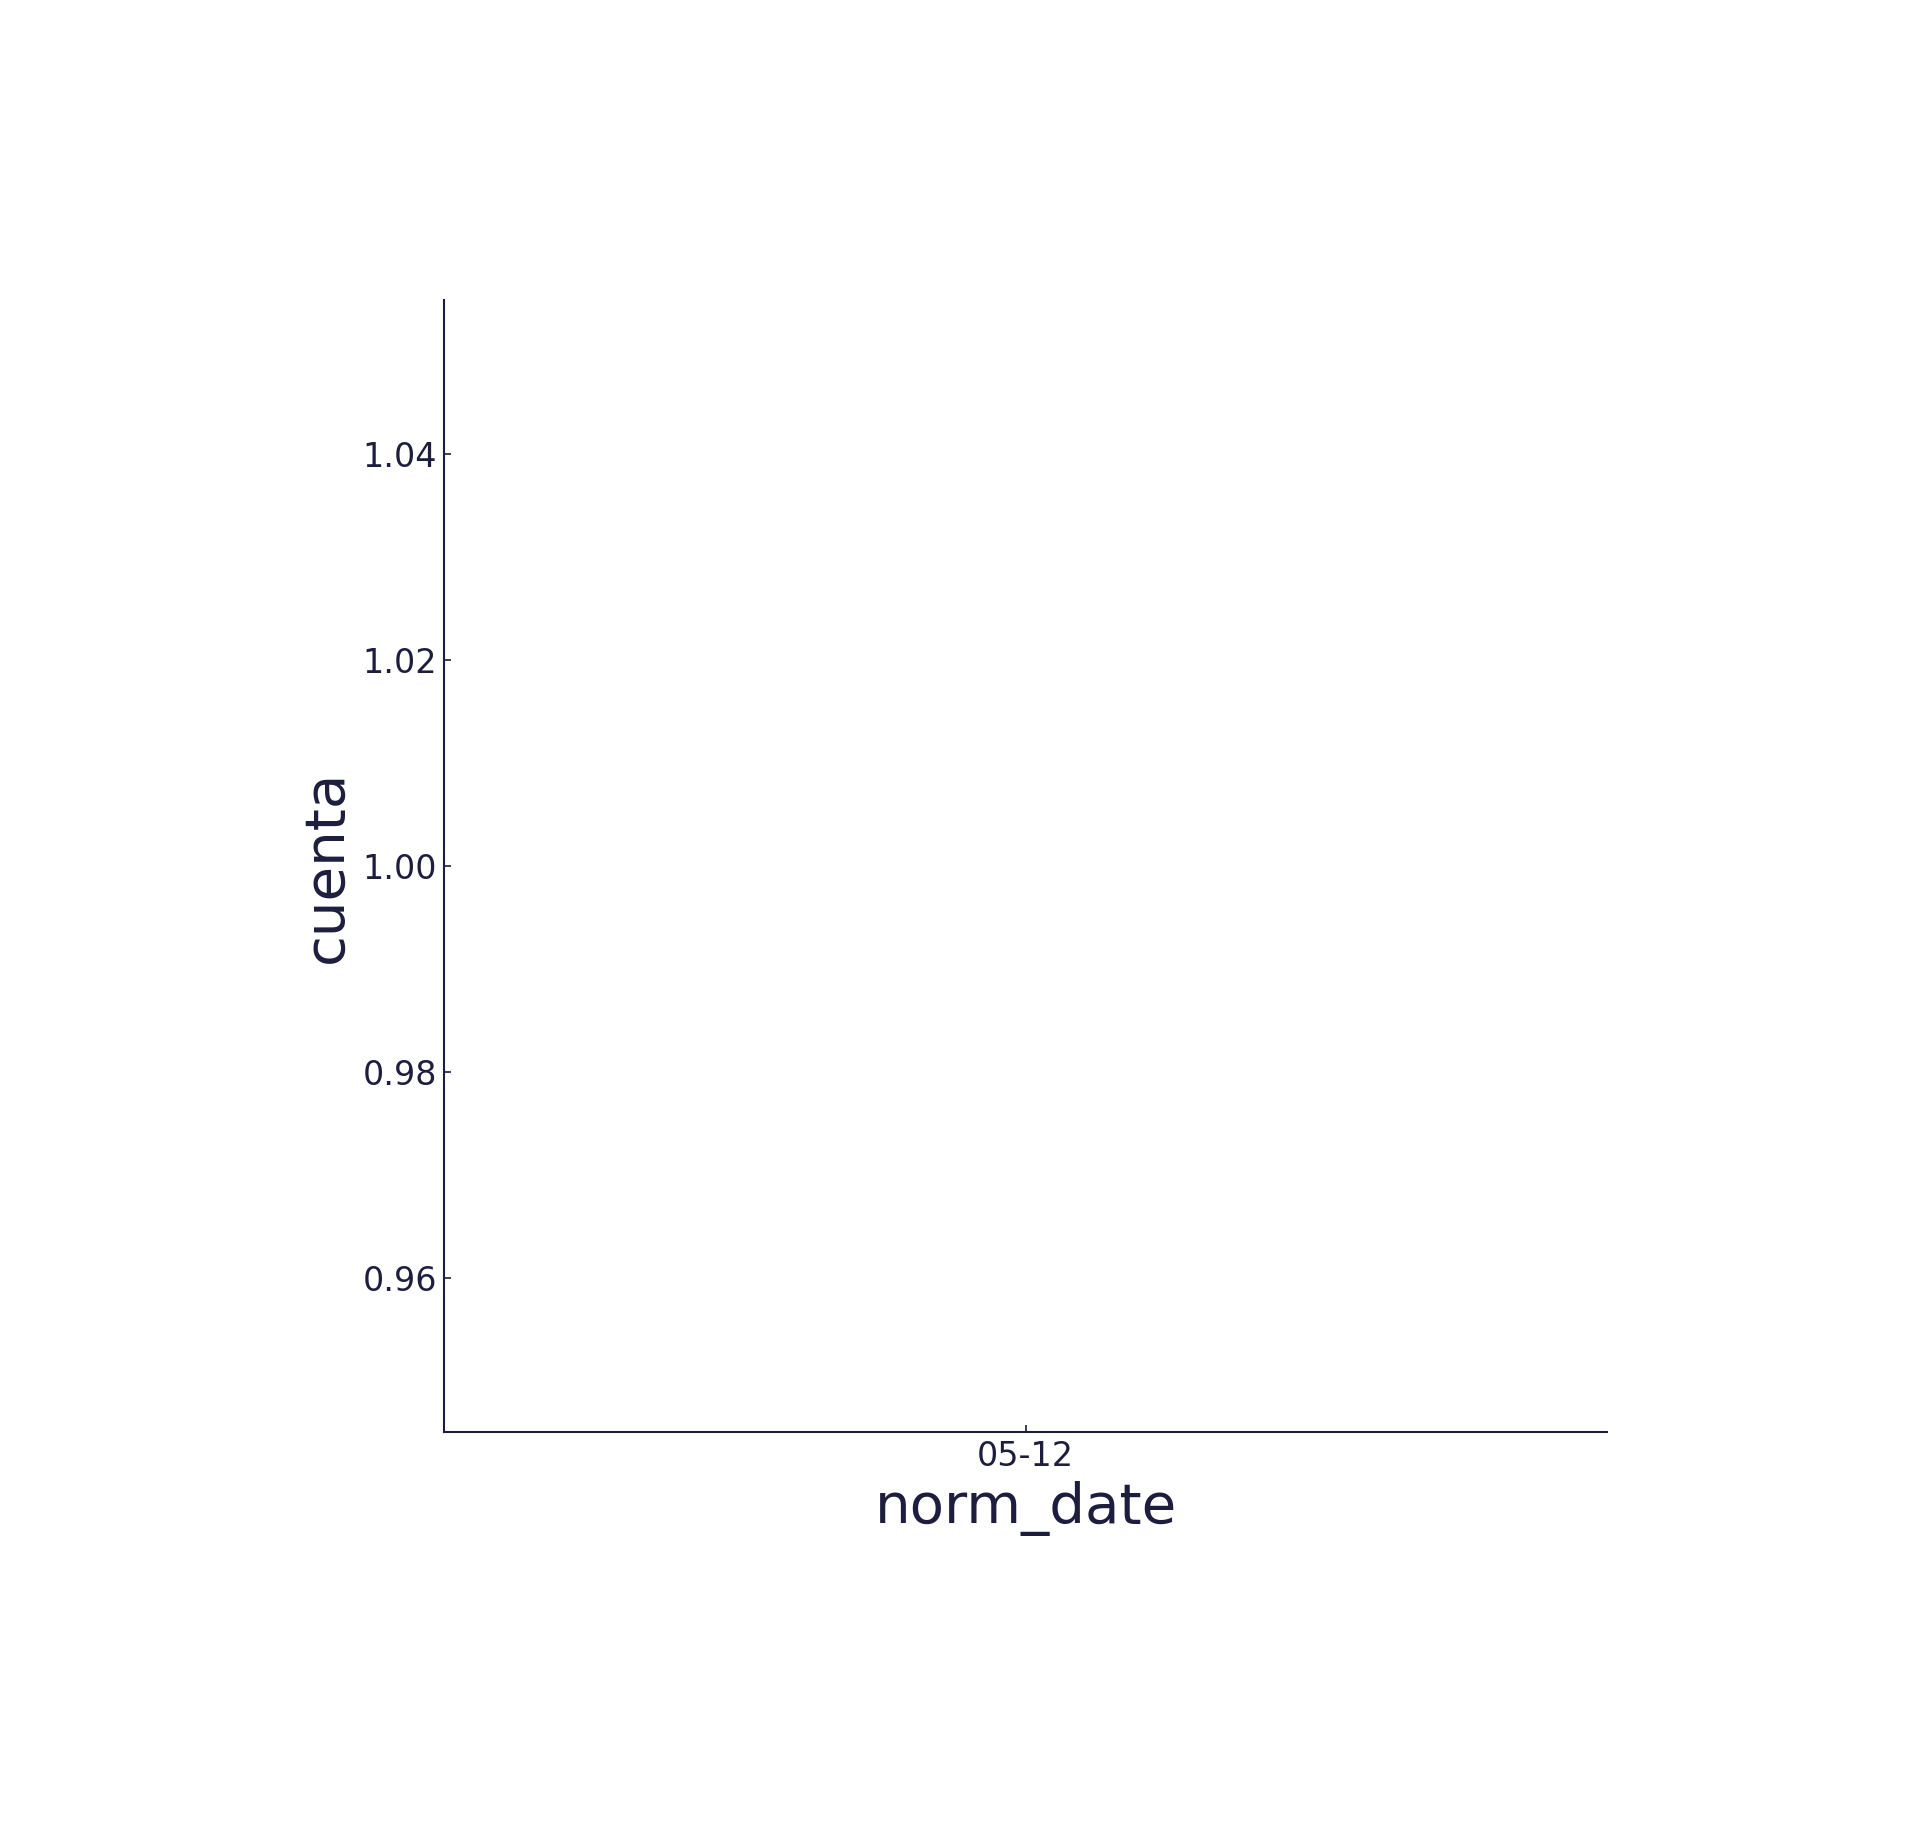

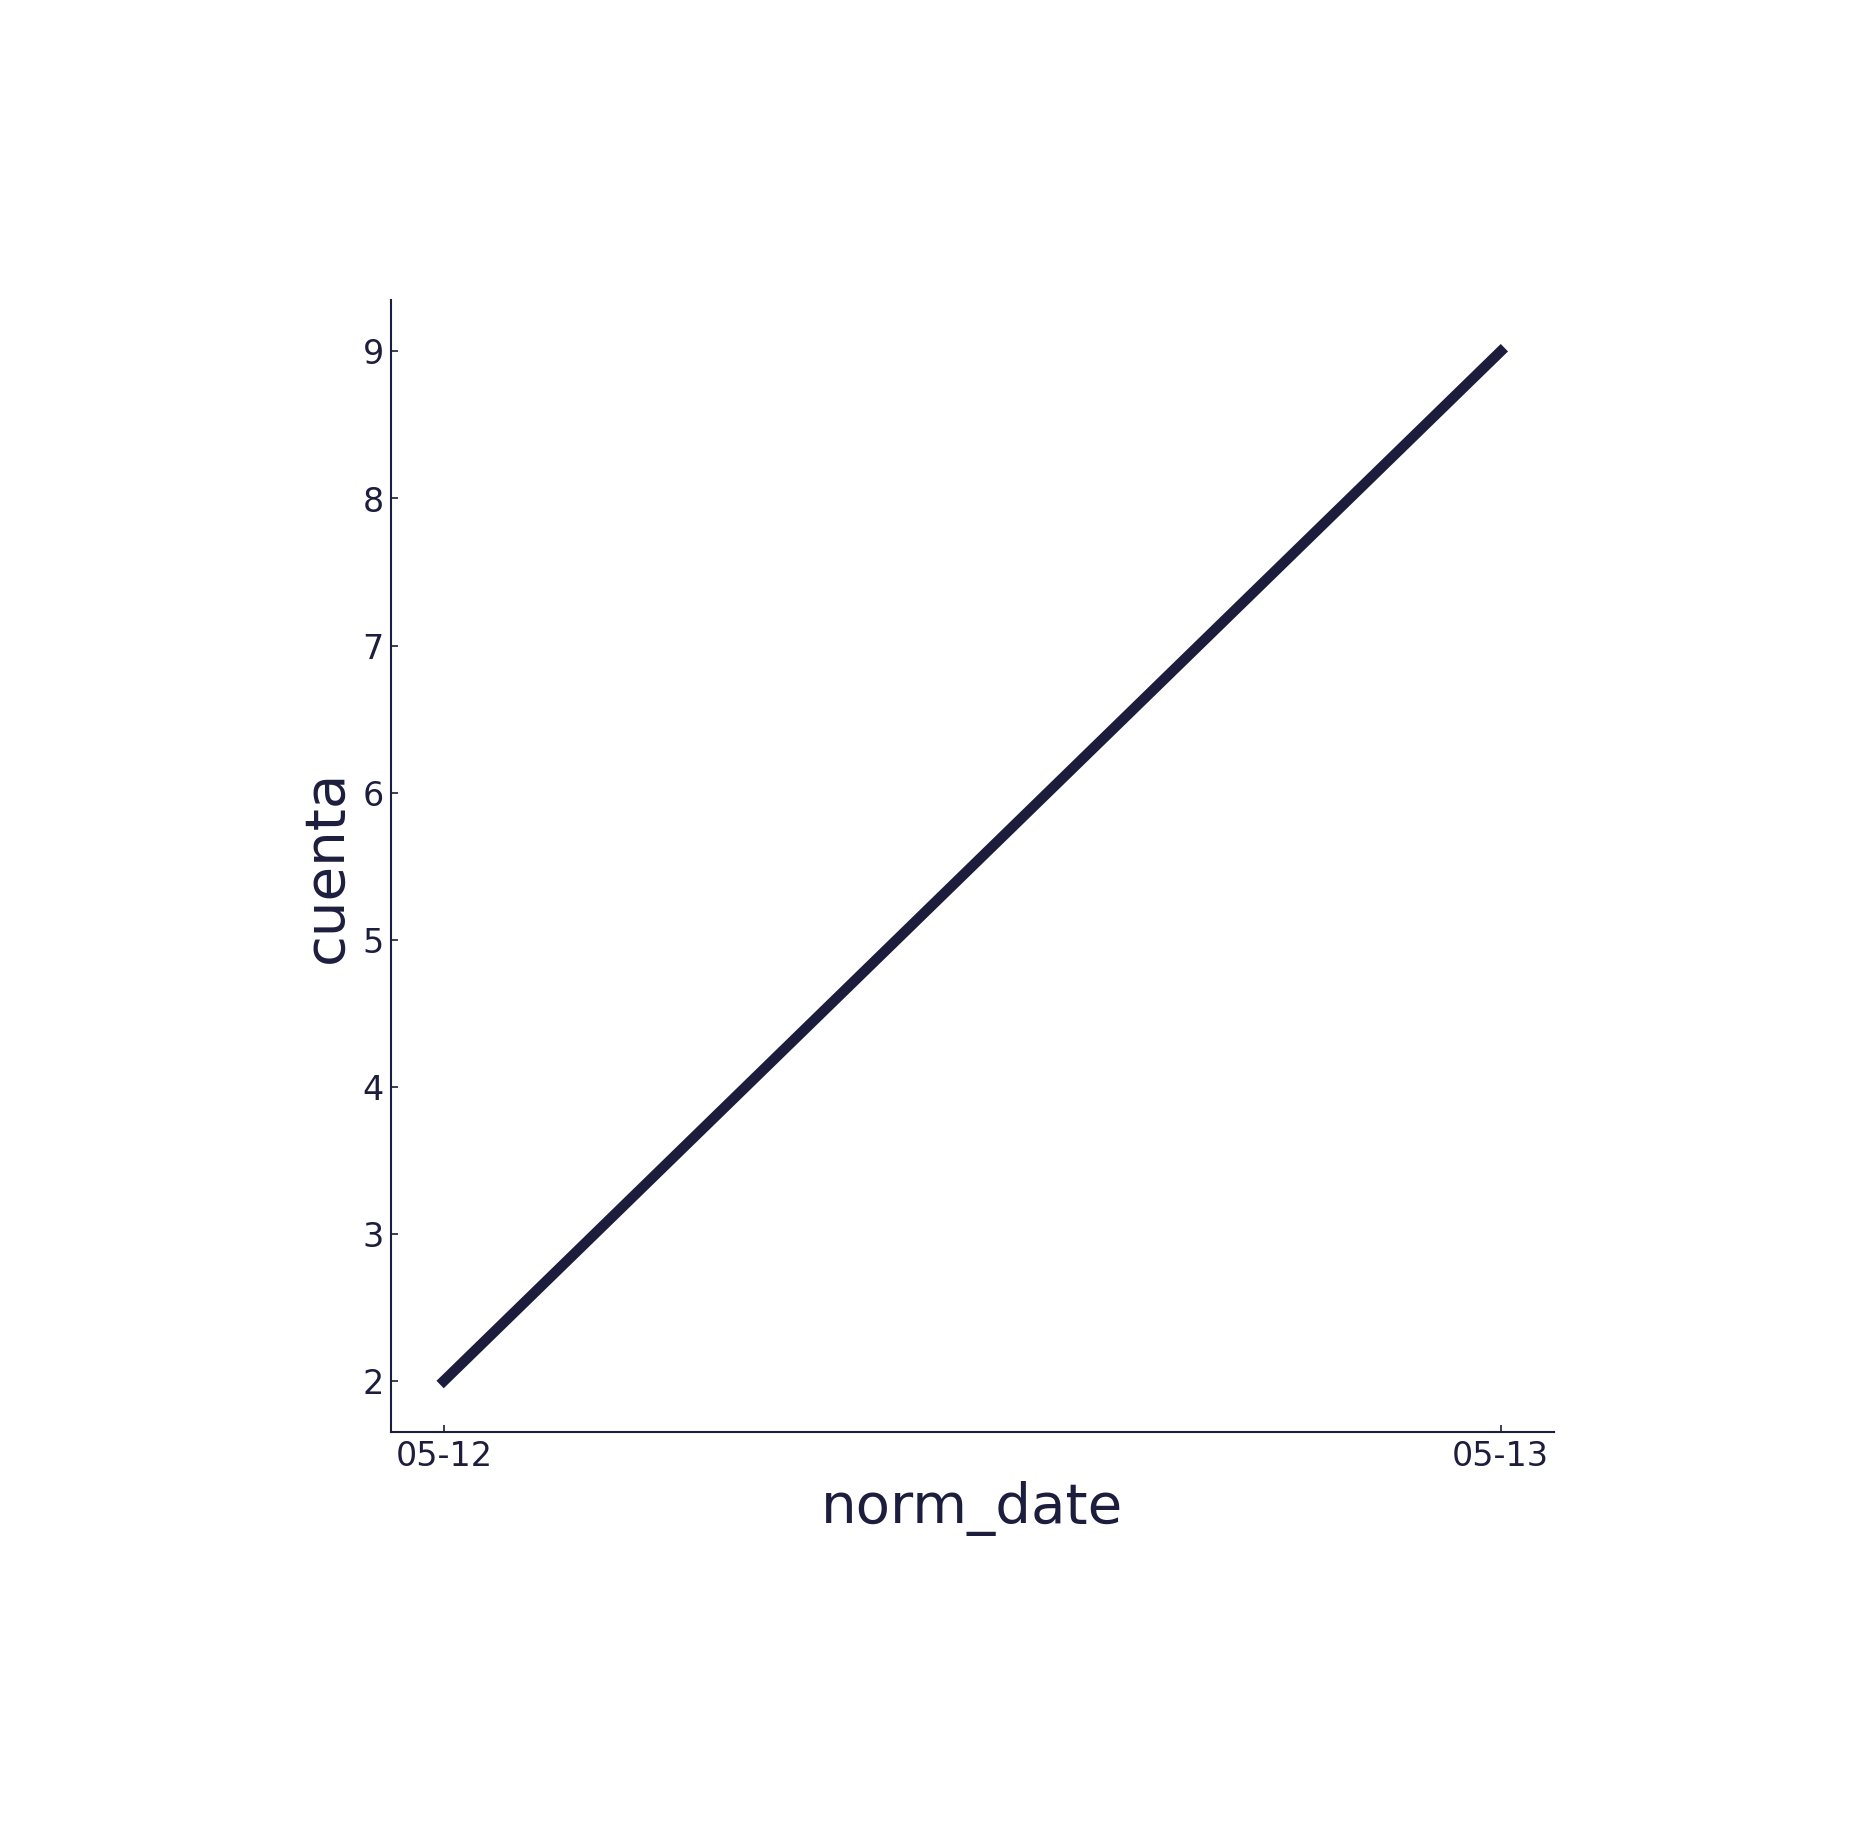

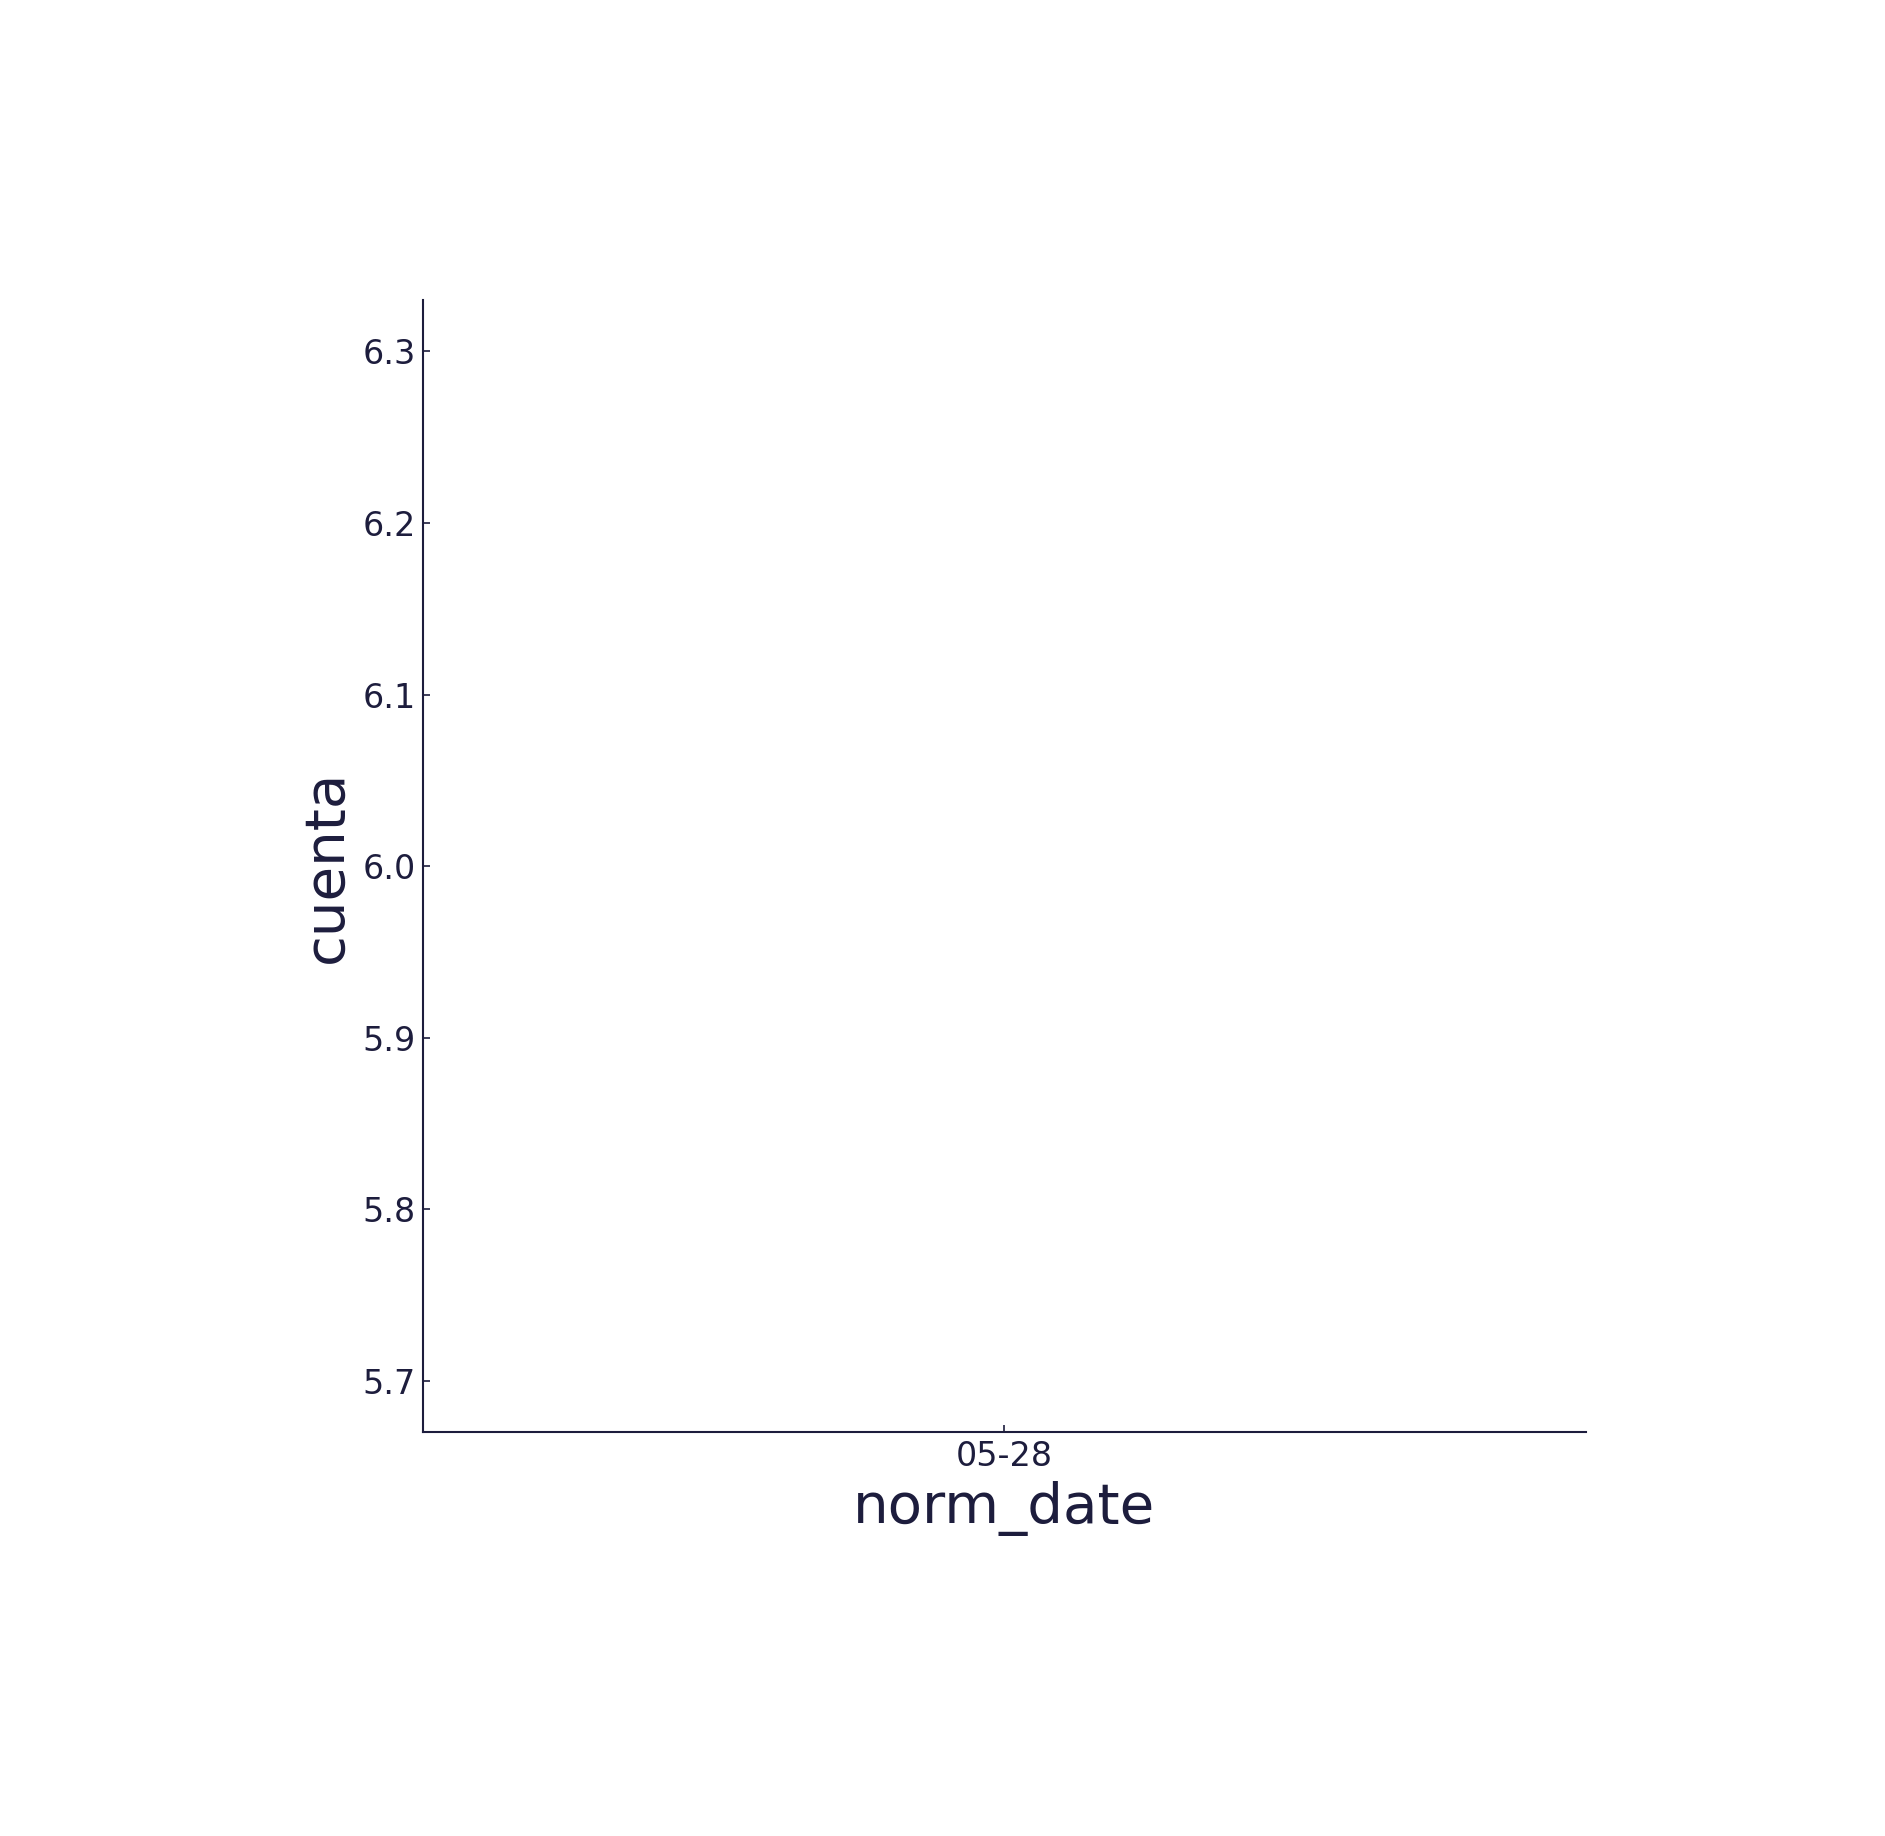

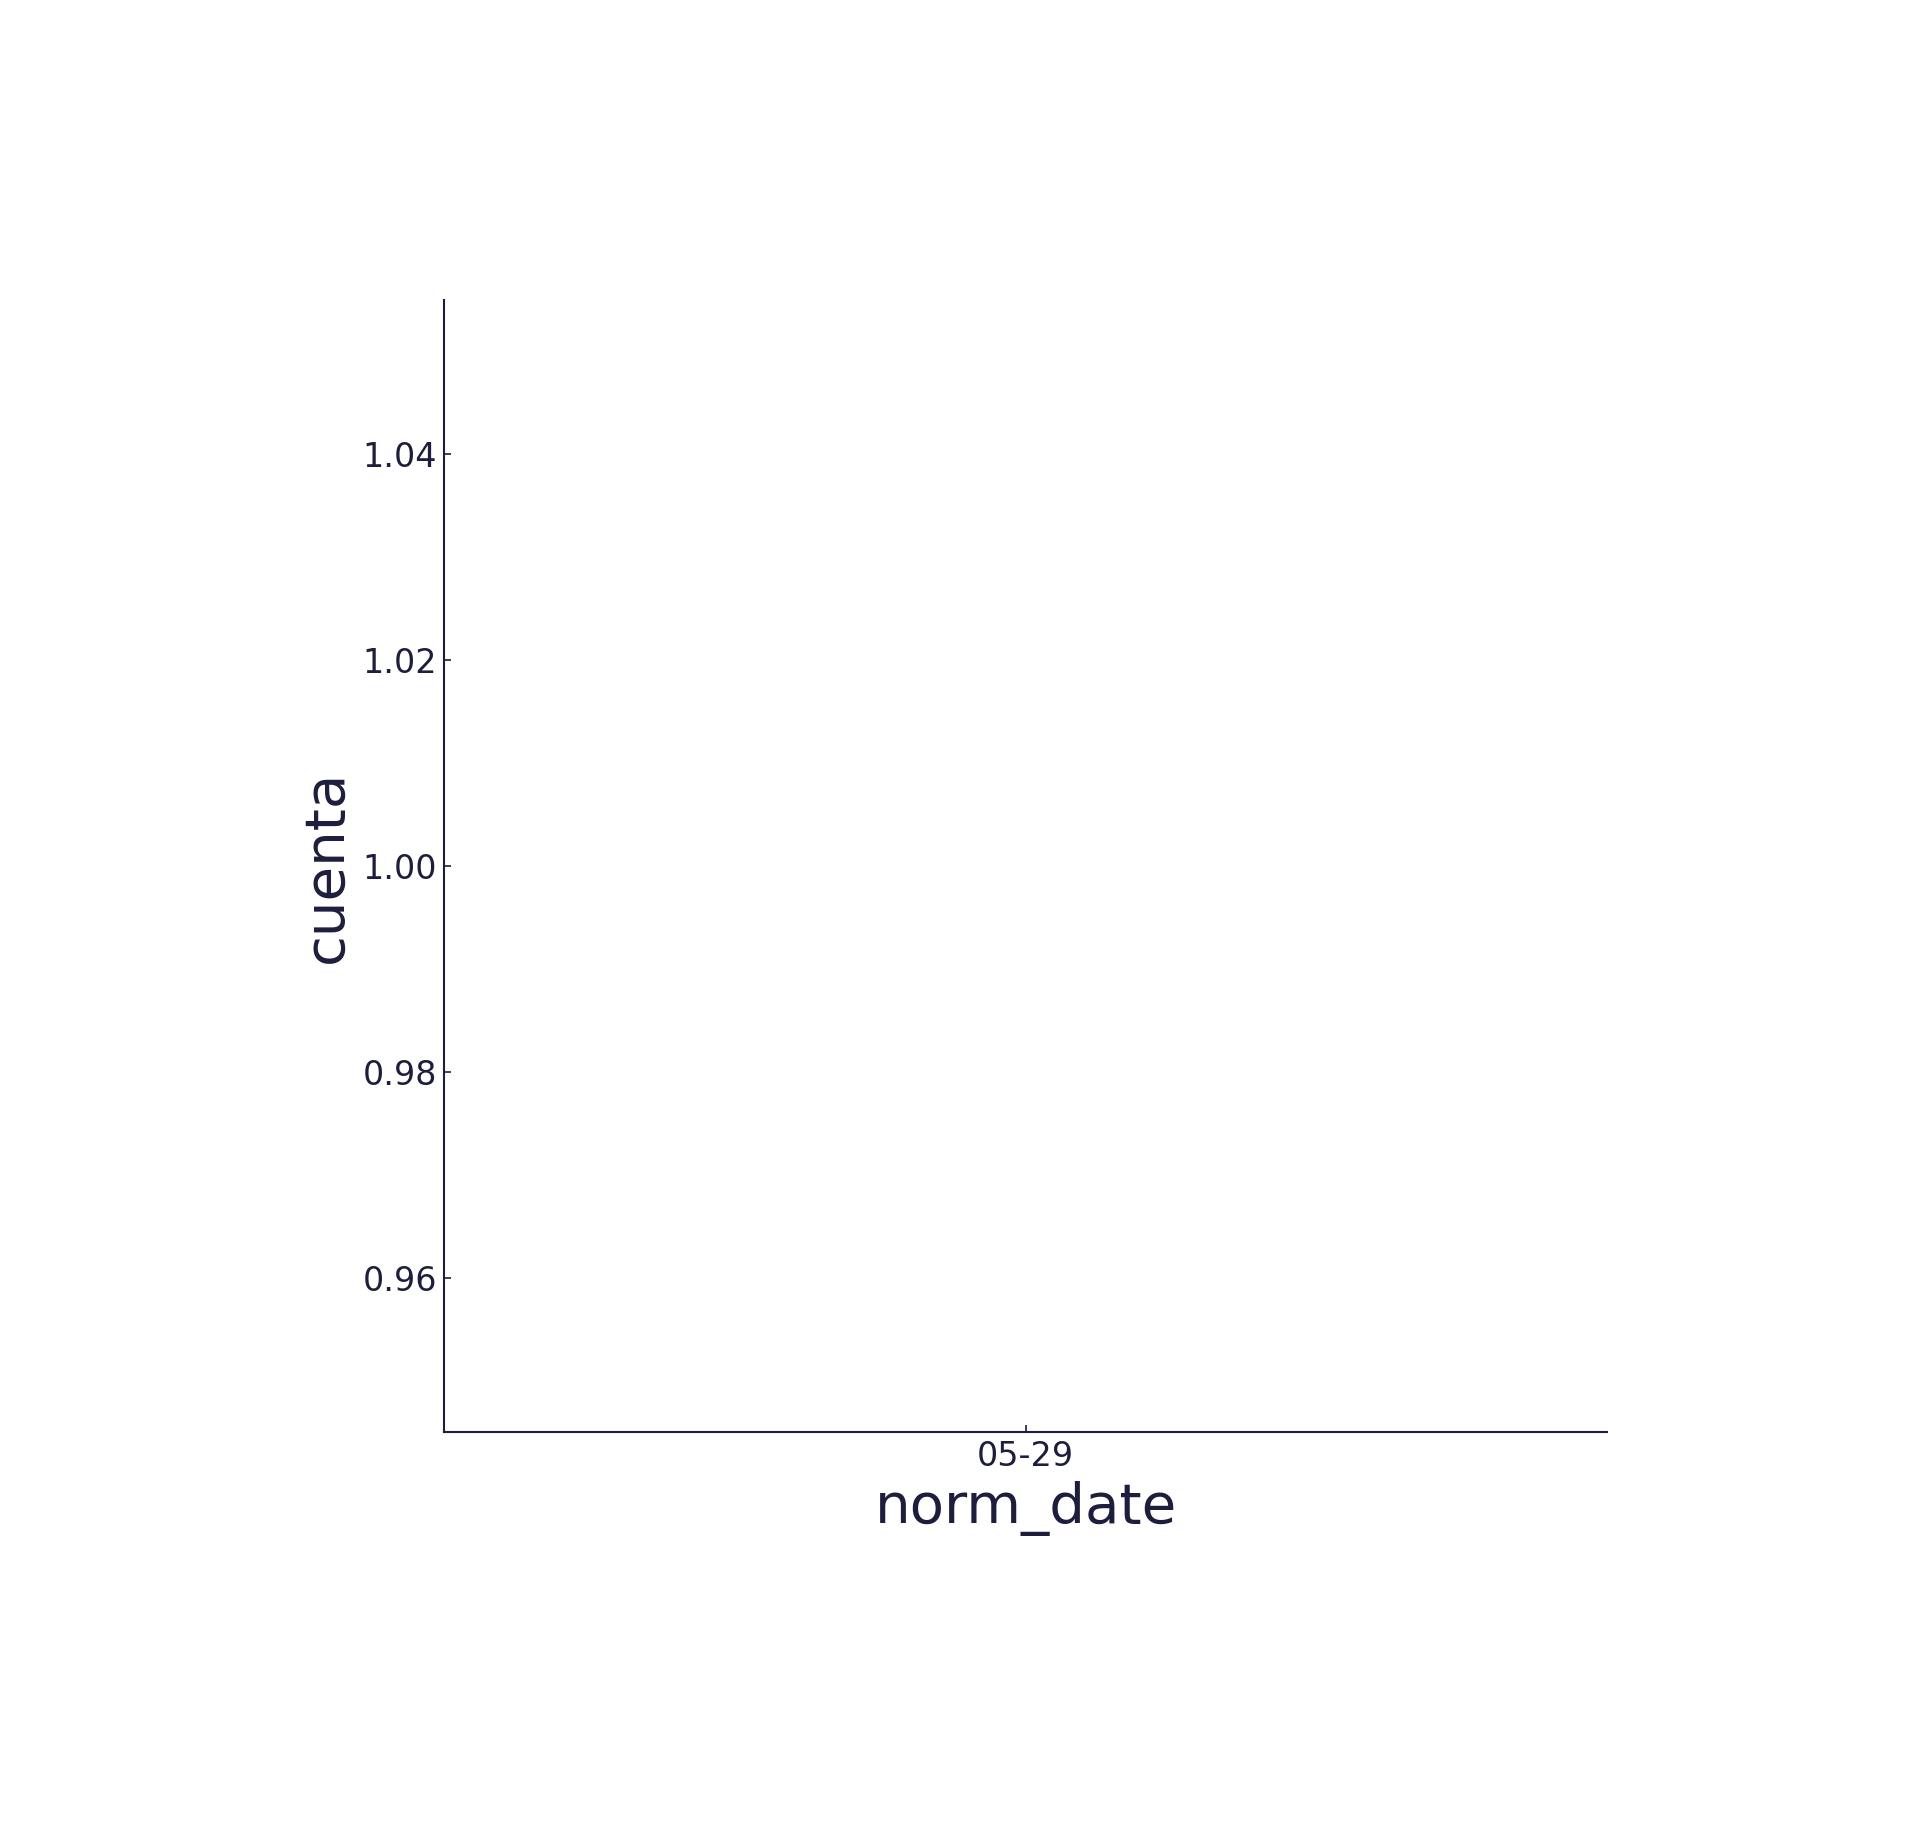

In [46]:
for depto in deptos:
    df_depto = df_col[df_col["departamento"] == depto]
    df_days = df_depto.groupby("fecha_diagnostico").size().to_frame("cuenta").reset_index()
    df_days["fecha_diagnostico"] = pd.to_datetime(df_days["fecha_diagnostico"], errors="coerce")
    df_days =df_days[df_days["fecha_diagnostico"].notnull()]
    df_days["norm_date"] = df_days["fecha_diagnostico"].dt.strftime('%m-%d')
    try:
        plot_depto(df_days, depto)

    except:
        pass
#     break
#     df_depto.groupby("")

# df_days